## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
content_df_raw = pd.read_pickle('../data/final_feature_df.pkl')
#content_df_raw = pd.read_csv('content_df_features_topic.csv', index_col=0)
content_df_raw.tail()

id  electoral_term  session first_name  \
969852  1094071              20      201     thomas   
969853  1094072              20      201     bärbel   
969854  1094073              20      201   wilfried   
969855  1094074              20      201     bärbel   
969856  1094075              20      201       dirk   

                                             document_url   last_name  \
969852  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       lutze   
969853  https://dip21.bundestag.de/dip21/btp/20/20201.pdf         bas   
969854  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     oellers   
969855  https://dip21.bundestag.de/dip21/btp/20/20201.pdf         bas   
969856  https://dip21.bundestag.de/dip21/btp/20/20201.pdf  heidenblut   

        faction_id           position_short position_long  politician_id  ...  \
969852           7     Member of Parliament          None       11004103  ...   
969853          -1  Presidium of Parliament   Präsidentin       11004006  ...   
969854           5     Member of Parliament          None       11004365  ...   
969855          -1  Presidium of Parliament   Präsidentin       11004006  ...   
969856          25     Member of Parliament          None       11004295  ...   

       speech_length   age    gender     tenure                topic  \
969852          3476  55.0  männlich  14.734247  Arbeit: Mindestlohn   
969853           172  56.0  weiblich  14.830137             No Topic   
969854          4699  49.0  männlich  10.690411        Sozialpolitik   
969855            79  56.0  weiblich  14.830137             No Topic   
969856          4979  63.0  männlich  10.742466  Arbeit: Mindestlohn   

        main_category  sub_category            Stadt Former Country  \
969852           Work   Mindestlohn      Elsterwerda     former GDR   
969853       no topic          None              NaN            NaN   
969854  Social Policy          None  Mönchengladbach     former BRD   
969855       no topic          None              NaN            NaN   
969856           Work   Mindestlohn            Essen     former BRD   

        City Classification  
969852           Small City  
969853                  NaN  
969854           Large City  
969855                  NaN  
969856           Large City  

[5 rows x 26 columns]

In [3]:
contributions_raw = pd.read_pickle('../00_update/contributions_extended.pkl')
contributions_raw

id             type first_name last_name  faction_id  speech_id  \
0          0           Lachen                               -1       4545   
1          1  Personen-Einruf               hütter          15       4545   
0          2            Zuruf                               22        494   
1          3            Zuruf                               -1        496   
2          4  Personen-Einruf              blücher          15        497   
..       ...              ...        ...       ...         ...        ...   
693  2885735           Lachen      silke   launert           5    1094075   
694  2885736          Beifall                               25    1094075   
695  2885737          Beifall                               15    1094075   
696  2885738          Beifall                                4    1094075   
697  2885739  Personen-Einruf   dorothee       bär           5    1094075   

     text_position  politician_id  \
0                7             -1   
1                2       11000979   
0                3             -1   
1                0             -1   
2                0       11000202   
..             ...            ...   
693             24       11004336   
694             25             -1   
695             25             -1   
696             25             -1   
697             25       11003586   

                                               content  
0                                                links  
1                                                Nein!  
0                                                § 51!  
1                                                links  
2                                              Jawohl!  
..                                                 ...  
693                                                     
694                                                     
695                                                     
696                                                     
697  Basta! Basta! Basta! Das hat jetzt alle da dra...  

[2885740 rows x 9 columns]

In [4]:
contributions_extended_raw = pd.read_pickle('../00_update/contributions_extended.pkl')
contributions_extended_raw.head()

contributions_extended_raw.shape


(2885740, 9)

In [5]:
politicians_raw = pd.read_csv('../00_update/politicians.csv')
politicians_raw.head()

ui  electoral_term  faction_id first_name last_name birth_place  \
0  11000001               5           5    Manfred   Abelein   Stuttgart   
1  11000001               6           5    Manfred   Abelein   Stuttgart   
2  11000001               7           5    Manfred   Abelein   Stuttgart   
3  11000001               8           5    Manfred   Abelein   Stuttgart   
4  11000001               9           5    Manfred   Abelein   Stuttgart   

  birth_country  birth_date  death_date    gender  \
0   Deutschland  20.10.1930  17.01.2008  männlich   
1   Deutschland  20.10.1930  17.01.2008  männlich   
2   Deutschland  20.10.1930  17.01.2008  männlich   
3   Deutschland  20.10.1930  17.01.2008  männlich   
4   Deutschland  20.10.1930  17.01.2008  männlich   

                                          profession constituency aristocracy  \
0  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
1  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
2  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
3  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
4  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   

  academic_title institution_type  \
0      Prof. Dr.  Fraktion/Gruppe   
1      Prof. Dr.  Fraktion/Gruppe   
2      Prof. Dr.  Fraktion/Gruppe   
3      Prof. Dr.  Fraktion/Gruppe   
4      Prof. Dr.  Fraktion/Gruppe   

                                    institution_name  
0  Fraktion der Christlich Demokratischen Union/C...  
1  Fraktion der Christlich Demokratischen Union/C...  
2  Fraktion der Christlich Demokratischen Union/C...  
3  Fraktion der Christlich Demokratischen Union/C...  
4  Fraktion der Christlich Demokratischen Union/C...

In [6]:
factions_raw = pd.read_pickle('../00_update/factions.pkl')
factions_raw.head()

id           abbreviation                          faction_name
0   0                    AfD  Fraktion Alternative für Deutschland
1   2                     BP                 Fraktion Bayernpartei
2   4  Bündnis 90/Die Grünen        Fraktion BÜNDNIS 90/DIE GRÜNEN
3   7             DIE LINKE.                   Fraktion DIE LINKE.
4   9                 DP/DPB                Fraktion DP/DPB (Gast)

In [7]:
cities_raw = pd.read_excel('../German_cities.xlsx', )
cities_raw.head()

Stadt
0             Berlin
1            Hamburg
2            München
3               Köln
4  Frankfurt am Main

## 2. Categorization of Structure

This section categorizes the content of German parliamentary speeches and agenda points into structured categories based on keywords. The categorization process enables focused analysis by grouping similar agenda items and topics, allowing for easier identification of patterns in debates, statements, and procedural items.

### 2.1 Cateogization based on Agenda Poinnts

In [8]:
'''# download all unique top_title to examine in excel
unique_top_title = content_df['top_title'].unique()
unique_top_title = pd.DataFrame(unique_top_title)
unique_top_title.to_excel('03_final/unique_top_title.xlsx')
# get all unique top_title'''

"# download all unique top_title to examine in excel\nunique_top_title = content_df['top_title'].unique()\nunique_top_title = pd.DataFrame(unique_top_title)\nunique_top_title.to_excel('03_final/unique_top_title.xlsx')\n# get all unique top_title"

Prepare data to easy processing

In [9]:
#filter for electoral terms 18, 29, 20
content_subset = content_df_raw[content_df_raw['electoral_term'].isin([17, 18, 19, 20])]
content_subset

# change all nan values to ''
content_subset = content_subset.fillna('')
content_subset['date'] = pd.to_datetime(content_subset['date'])

In [10]:
# Show all lines where top_title is not classified
len(content_subset[content_subset['top_title'] == ''])

28156

Altohugh, there are still some undefined agenda points, we will continue the analysis and later fill them with "Other"

The categorization here uses predefined dictionaries to classify agenda points based on keywords in the top_title field. Each unique agenda item (or top_title) is matched to a category, such as "Organizational," "Debate," or "Government Statement." The function classify_top_title first checks for matches in the primary dictionary (keyword_categories) and then searches a secondary dictionary (keyword_categories_2) if no match is found. If no keyword is matched, it defaults to "Other." Agenda items are classified into broader main_category values based on the sub_category from the previous step. This higher-level categorization organizes data into overarching types like "Debate," "Statement," or "Questioning," which helps streamline the structural analysis.

In [11]:
# Dictionary to categorize texts based on keywords
keyword_categories = {
    "Wahl": "Organizational",
    "Festlegung": "Organizational",
    "Beschlussfassung": "Organizational",
    "Amtsübernahme": "Organizational",
    "Eidesleistung": "Organizational",
    "Ausschussüberweisung": "Organizational",

    "Regierungserklärung": "Government Statement",
    "Abgabe einer Erklärung": "Statement",
    "Erklärung durch den Bundeskanzler": "Statement",
    "Erklärung durch die Bundeskanzlerin": "Statement",
    "Unterrichtung durch die Bundesregierung": "Government Briefing",
    "Unterrichtung durch die Bundesregie-rung": "Government Briefing",
    "Erklärung nach § 31 GO": "Statement under § 31 Rules",
    "Erklärungen nach § 31 GO": "Statement under § 31 Rules",

    "Aktuelle Stunde": "Aktuelle Stunde",
    "Debatte": "Debate",
    "Große Anfrage": "Major Inquiry",

    "Befragung": "Questioning",
    "Fragestunde": "Questioning",

    "Beschlussempfehlung": "Recommendation for Resolution",

    "Bericht des Petitionsausschusses": "Report",
    "Bericht des Rechtsausschusses": "Report",
}

keyword_categories_2 = {
    "Bericht": "Report",
    "Antrag": "Request",
    "Beratung": "Debate",
    "Unterrichtung durch": "Briefing",
}


# Function to classify based on primary and secondary categories
def classify_top_title(text):
    # Limit to the first 100 characters
    text_snippet = text[:100].lower()
    
    # First attempt to classify with primary keyword categories
    for keyword, category in keyword_categories.items():
        if keyword.lower() in text_snippet:
            return category
    
    # If no match is found, attempt to classify with secondary keyword categories
    for keyword, category in keyword_categories_2.items():
        if keyword.lower() in text_snippet:
            return category

    # Default if no keywords are matched
    return "Other"

# Apply classification to the 'top_title' column
content_subset['sub_category'] = content_subset['top_title'].apply(classify_top_title)

Download data as Excel to cross-check

In [12]:
'''#download excel with unique top title and category other
content_subset_other = content_subset[content_subset['sub_category']=="Other"]
# filter for unique top_title
content_subset_other = content_subset_other.drop_duplicates(subset=['top_title'])
content_subset_other.to_excel('content_subset_other.xlsx')'''

'#download excel with unique top title and category other\ncontent_subset_other = content_subset[content_subset[\'sub_category\']=="Other"]\n# filter for unique top_title\ncontent_subset_other = content_subset_other.drop_duplicates(subset=[\'top_title\'])\ncontent_subset_other.to_excel(\'content_subset_other.xlsx\')'

In [13]:
# classify the sub_category into main_category
main_categories = {
    "Organizational": "Organizational",
    "Government Statement": "Statement",
    "Statement": "Statement",
    "Government Briefing": "Debate",
    "Statement under § 31 Rules": "Debate",
    "Aktuelle Stunde": "Debate",
    "Debate": "Debate",
    "Major Inquiry": "Debate",
    "Questioning": "Questioning",
    "Recommendation for Resolution": "Debate",
    "Report": "Debate",
    "Request": "Debate",
    "Debate": "Debate",
    "Briefing": "Debate",
    "Other": "Other",
}

# Function to classify based on primary and secondary categories
def classify_main_category(text):
    return main_categories[text]

# Apply classification to the 'sub_category' column
content_subset['main_category'] = content_subset['sub_category'].apply(classify_main_category)

In [14]:
# count main categories
content_subset['main_category'].value_counts()


Debate            141210
Questioning        47994
Other              38287
Organizational      6744
Statement           6646
Name: main_category, dtype: int64

Download a sample to verify

In [15]:
# get a sample of 10 complete sessions to verify
'''content_subset['session'].unique()
content_subset['session'].value_counts()
sample_sessions = content_subset['session'].sample(10, random_state=42)
sample_sessions

# download sample sessions
content_df_sample = content_subset[content_subset['session'].isin(sample_sessions)]
content_df_sample.to_excel('content_df_sample.xlsx')
'''

"content_subset['session'].unique()\ncontent_subset['session'].value_counts()\nsample_sessions = content_subset['session'].sample(10, random_state=42)\nsample_sessions\n\n# download sample sessions\ncontent_df_sample = content_subset[content_subset['session'].isin(sample_sessions)]\ncontent_df_sample.to_excel('content_df_sample.xlsx')\n"

### 2.2 Categorization based on content

This section categorizes content in the debates by analyzing text within each speech. Rather than focusing solely on agenda points (titles or predefined topics), this approach uses keyword matching to determine the type of content based on the speech content itself. By doing so, the classification is rooted in the actual discourse, making it more adaptable to capture diverse forms of interactions within parliamentary speeches. The logic has been developed by manually analyzing data and trying uot different approaches

#### 2.2.1 Keyword-based content classification

The extract_content_category function classifies speeches by looking for specific keywords related to categories like "Debate," "Questioning," or "Organizational." This approach involves scanning the speech content for words that indicate the type of interaction, such as phrases for introductions, statements, or questions.

In [16]:
new_tagesorgnungspunkt_length_threshold = 250


# Identify first entries in each session
first_entries = content_subset.groupby(['electoral_term', 'session']).head(1).index

# Create a new_tagesordnungspunkt column with different length conditions for first and other entries
content_subset['new_tagesordnungspunkt'] = (
    content_subset.index.isin(first_entries) |  # True for first entry of each session
    (
        (content_subset['position_short'] == 'Presidium of Parliament') &
        content_subset['speech_content'].str.contains(r'Tagesordnungspunkt|Zusatzpunkt|Tagesordnung|Tages- ordnungspunkt|Tagesord- nungspunkt') &
        (content_subset['speech_length'] > new_tagesorgnungspunkt_length_threshold)
    )
)

# Create a dictionary with types of Tagesordnungspunkt
tagesordnungspunkte_keywords = {
    "Statement": ["Regierungserklärung", "Erklärung der Bundesregierung"],
    "Questioning": ["Befragung der Bundesregierung", "Regierungsbefragung","Fragestunde", 
                    "Fragen an die Regierung", "Fragerunde", "Beantwortung", "Frage zu dem Themenbereich", 
                    "Fragen zu dem Themenbereich", "Nächste Frage", "nächste Frage", "Fragen zum Thema", 
                    "Fragen zum Thema", "Fragen zu dem Bericht"],
    "Debate": ["Debatte", "Aussprache", "Beratung", "debattieren", "Aussprache.", "Redeliste", 
               "Redner", "Rednerin", "Redebeitrag", "Rede", "Aktuelle Stunde", "Aktuellen Stunde", 
               "persönliche Erklärung", "Persönliche Erklärung", "Unterrichtung durch die Bundesregierung", 
               "Bericht der Bundesregierung", "Regierungsbericht"],
    "Organizational": ["Wahl des Präsidenten", "Wahl des Vizepräsidenten", "Wahl des Schriftführers", 
                       "Wahl des Stellvertretenden Schriftführers", "Wahl des Alterspräsidenten", 
                       "Wahl der Bundneskanzlerin", "Wahl de Bundeskanzlers", "Wahl eines Stellvertreters", 
                       "Wahl des Stellvertreters", "Wahl der Vizepräsidenten", "Wahl eines Vizepräsidenten", 
                       "Amtseinführung", "Vereidigung", "Amtsübernahme", "Übernahme des Amtes", "Eid", 
                       "Eidesleistung", "Geschäftsordnung", "Geschäftsordnungsdebatte", "Geschäftsordnungsantrag", 
                       "Geschäftsordnungsanträge", "Geschäftsordnungsanträgen"]
}

# Function to extract the type of Tagesordnungspunkt
def extract_content_category(row):
    latest_type = np.nan  # Initialize with NaN
    latest_position = -1  # Initialize to track the position

    if row['new_tagesordnungspunkt']:
        latest_type = 'Other'  # Set default to 'Other' if new_tagesordnungspunkt is True
        speech_content = row['speech_content']

        # Iterate over the dictionary of types and keywords
        for content_category, keywords in tagesordnungspunkte_keywords.items():
            for keyword in keywords:
                # Use regex to find the keyword, ignoring punctuation and case sensitivity
                pattern = r'\b' + re.escape(keyword) + r'[\b.,;:!?]*'
                matches = list(re.finditer(pattern, speech_content, re.IGNORECASE))  # Find all matches

                # If there are matches, update the latest position
                if matches:
                    last_match = matches[-1]  # Get the last occurrence of the match
                    position = last_match.start()  # Get the start position of the last match
                    if position > latest_position:  # Update only if the current position is later
                        latest_position = position
                        latest_type = content_category  # Store the latest type

    return latest_type

# Apply the function to the DataFrame
content_subset['content_category'] = content_subset.apply(extract_content_category, axis=1)


# Define keywords for detecting end of Regierungsbefragung
# Define regex patterns for detecting end of Regierungsbefragung, allowing punctuation after the phrase
end_regierungsbefragung_patterns = [
    # Original end patterns
    r"(?i)\bEnde\s*der\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*schließe\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bBefragung\s*der\s*Bundesregierung\s*ist\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bDie\s*Regierungsbefragung\s*ist\s*nun\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bDie\s*Fragestunde\s*ist\s*nun\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*erkläre\s*die\s*Fragestunde\s*für\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Befragung\b[\s.,;:!?]*",


    # Specific patterns for next speaker announcements
    r"(?i)\bNächster\s*Redner\b[\s:.,;!?-]*",
    r"(?i)\bNächste\s*Rednerin\b[\s:.,;!?-]*",

    # Additional transition patterns
    r"(?i)\bIch\s*eröffne\s*die\s*Debatte\b[\s.,;:!?]*",
    r"(?i)\bDer\s*nächste\s*Tagesordnungspunkt\b[\s.,;:!?]*",
    r"(?i)\bDas\s*Wort\s*zu\s*einer\s*Kurzintervention\b[\s.,;:!?]*",
]

begin_regierungsbefragung_patterns = [
    r"(?i)\bIch\s*eröffne\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bBeginne\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bEröffnung\s*der\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*eröffne\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bBeginne\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Befragung\s*des\s*Bundeskanzlers\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Befragung\s*der\s*Bundeskanzlerin\b[\s.,;:!?]*",
    r"(?i)\bBefragung\s*beginnen\b[\s.,;:!?]*",
]

# Function to reclassify "Debatte" after extract_content_category
def reclassify_regierungsbefragung(df):
    for i in range(1, len(df)):  # Start from 1 to have a previous row to check
        # 1. Check for End of Regierungsbefragung to reclassify as "Debatte"
        if (
            df.iloc[i - 1]['content_category'] == 'Questioning' and
            df.iloc[i]['position_short'] == 'Presidium of Parliament'
        ):
            if any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in end_regierungsbefragung_patterns):
                df.at[df.index[i], 'content_category'] = 'Debate'
        
        # 2. Check for Beginning of Regierungsbefragung to classify as "Regierungsbefragung"
        elif (
            df.iloc[i]['position_short'] == 'Presidium of Parliament' and
            any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in begin_regierungsbefragung_patterns)
        ):
            df.at[df.index[i], 'content_category'] = 'Questioning'
    
    return df

# Apply the function to reclassify rows as "Debatte" if the conditions are met
content_subset = reclassify_regierungsbefragung(content_subset)



# Function to mark the last as "Sitzungsende"
def assign_sitzungsanfang_und_ende(df):
    # Group by electoral term and session to identify the first and last rows in each session
    last_entries = df.groupby(['electoral_term', 'session']).tail(1).index

    # Mark the last entry in each session as "Sitzungsende" regardless of its current type
    df.loc[last_entries, 'content_category'] = 'Sitzungsende'
    
    return df

# Apply the function to mark the first and last rows
content_subset = assign_sitzungsanfang_und_ende(content_subset)

#### 2.2.2 Re-classification of questioning

Following the initial content classification, reclassification rules are applied to differentiate between questioning and debating segments. The reclassify_regierungsbefragung function adjusts entries initially labeled as "Questioning" based on the position of the previous row and specific patterns (like the end of a question session). This ensures that discourse structures unique to questioning are accurately captured.

In [17]:
# Function to reclassify "Debatte" after extract_content_category
def reclassify_regierungsbefragung(df):
    for i in range(1, len(df)):  # Start from 1 to have a previous row to check
        # 1. Check for End of Regierungsbefragung to reclassify as "Debatte"
        if (
            df.iloc[i - 1]['content_category'] == 'Questioning' and
            df.iloc[i]['position_short'] == 'Presidium of Parliament'
        ):
            # Ensure speech_content is a string before applying regex
            if isinstance(df.iloc[i]['speech_content'], str):
                if any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in end_regierungsbefragung_patterns):
                    df.at[df.index[i], 'content_category'] = 'Debate'
        
        # 2. Check for Beginning of Regierungsbefragung to classify as "Regierungsbefragung"
        elif (
            df.iloc[i]['position_short'] == 'Presidium of Parliament' and
            isinstance(df.iloc[i]['speech_content'], str) and
            any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in begin_regierungsbefragung_patterns)
        ):
            df.at[df.index[i], 'content_category'] = 'Questioning'
    
    return df

# Apply the function to reclassify rows as "Debatte" if the conditions are met
content_subset = reclassify_regierungsbefragung(content_subset)


#### 2.2.3 Final Adjustments

Assigning "Sitzungsende" and Forward-Filling Categories

To ensure data continuity, the final entry in each session is labeled "Sitzungsende," marking it as the session’s conclusion. This step, along with forward-filling, addresses any gaps in categorization caused by sequential changes or undefined categories.

In [18]:
# Shift the speech_content column to get the next row's content for comparison
content_subset['next_speech_content'] = content_subset['speech_content'].shift(-1)

# Function to classify "Other" entries based on the next row's content
def classify_other(row):
    if (
        row['new_tagesordnungspunkt'] and
        row['position_short'] != 'Presidium of Parliament' and
        row['content_category'] == 'Other'
    ):
        if pd.notna(row['next_speech_content']):
            # Check for "Frage" in the next row's speech content
            if 'Frage' in row['next_speech_content']:
                return 'Questioning'
            # Check for "Rede", "Redner", or "Rednerin" in the next row's speech content
            elif any(word in row['next_speech_content'] for word in ['Rede', 'Redner', 'Rednerin']):
                return 'Debate'
    # Return the existing type if no conditions are met
    return row['content_category']

# Apply the function to the DataFrame
content_subset['content_category'] = content_subset.apply(classify_other, axis=1)

# Drop the auxiliary next_speech_content column
content_subset = content_subset.drop(columns=['next_speech_content'])

In [19]:
# Changes all content_category "Sitzungsende" with the content_category before
content_subset['content_category'] = content_subset['content_category'].replace('Sitzungsende', np.nan)
 
# Fill missing entries with the previous value
content_subset['content_category'] = content_subset['content_category'].ffill()

# delete all unneccessary columns
content_subset.head()

id  electoral_term  session first_name  \
728976  729470              17        1      heinz   
728977  729471              17        1     volker   
728978  729472              17        1      heinz   
728979  729473              17        1      heinz   
728980  729474              17        1    norbert   

                                             document_url    last_name  \
728976  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
728977  https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
728978  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
728979  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
728980  https://dip21.bundestag.de/dip21/btp/17/17001.pdf      lammert   

        faction_id           position_short    position_long  politician_id  \
728976           5  Presidium of Parliament  alterspräsident       11001849   
728977           5     Member of Parliament                        11001074   
728978           5  Presidium of Parliament  alterspräsident       11001849   
728979           5  Presidium of Parliament  alterspräsident       11001849   
728980           5     Member of Parliament                        11001274   

        ...    gender     tenure topic   main_category    sub_category  \
728976  ...  männlich  32.389041                 Other           Other   
728977  ...  männlich  18.616438        Organizational  Organizational   
728978  ...  männlich  32.389041        Organizational  Organizational   
728979  ...  männlich  32.389041        Organizational  Organizational   
728980  ...  männlich  28.627397        Organizational  Organizational   

                    Stadt  Former Country City Classification  \
728976  Frankfurt am Main      former BRD          Large City   
728977                                                          
728978  Frankfurt am Main      former BRD          Large City   
728979  Frankfurt am Main      former BRD          Large City   
728980             Bochum      former BRD          Large City   

       new_tagesordnungspunkt  content_category  
728976                   True    Organizational  
728977                  False    Organizational  
728978                  False    Organizational  
728979                  False    Organizational  
728980                  False    Organizational  

[5 rows x 28 columns]

## 3. Classification of Single Entries

This section classifies entries within debates, differentiating between various forms of contributions like speeches, short interventions, and procedural guidance. This classification provides more detailed insights into the structure of debates, allowing for an analysis of speaking patterns, interruptions, and interactions between speakers.

### 3.1 Classification of Debate Items

This part identifies and classifies specific debate elements such as speeches, short interventions, and procedural guidance within the debate sessions. Key steps include filtering for debate sessions, marking transitions (e.g., session openings), and detecting speech intros, short interventions, and conclusions based on predefined keywords.

In [20]:
# Step 1: Filter for relevant sessions
debate_content_subset = content_subset[(content_subset['main_category'] == 'Debate') | (content_subset['main_category'] == 'Other')]

# Step 2: Create columns for previous and next speaker positions
debate_content_subset['previous_position'] = debate_content_subset['position_short'].shift()
debate_content_subset['next_position'] = debate_content_subset['position_short'].shift(-1)

# Step 3: Mark the opening of each session
debate_content_subset['opening'] = debate_content_subset['session'] != debate_content_subset['session'].shift(1)

# Step 4: Define lists for identifying speech intros, short interventions, beginnings, and endings
guidance_before_speech = ['das Wort', 'Das Wort', 'spricht', 'Sprecherin', 'Sprecher', 'Redner', 'Rednerin', 'das Wort', 'Rede ']
guidance_before_short_intervention = ['Kurzintervention', 'Kurzinterventionen']
speech_beginnings = [
    'Ich danke Ihnen', 'Damen und Herren', 'Präsident', 'Präsidentin',
    'Sehr geehrte Damen und Herren', 'Sehr geehrter Herr Präsident',
    'Sehr geehrte Frau Präsidentin', 'Meine Damen und Herren', 'Guten Morgen', 'Kollegen', 'Kolleginnen'
]
speech_ending_phrases = ['Dank']

# Step 5: Identify speech intros and short interventions
debate_content_subset['speech_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_speech)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament')
)
debate_content_subset['row_before_speech_intro'] = debate_content_subset['speech_intro'].shift(1)

debate_content_subset['short_intervention_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_short_intervention)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament')
    & (debate_content_subset['speech_length'] < 200)
    & (~debate_content_subset['speech_content'].str.contains(r'\?'))
)
debate_content_subset['row_before_short_intervention_intro'] = debate_content_subset['short_intervention_intro'].shift(1)

# Step 6: Detect the beginning and end of speeches
debate_content_subset['speech_beginning'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_beginnings))
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)
debate_content_subset['speech_ending'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_ending_phrases))
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)

# Step 7: Classify each row as "Speech" or "Short Intervention"
def classify_entry(row):
    short_intervention_conditions = [
        row['speech_length'] > 200,
        row['row_before_short_intervention_intro']
    ]
    speech_conditions = [
        row['speech_length'] > 2500,
        row['speech_beginning'],
        row['row_before_speech_intro'],
        row['next_position'] == 'Presidium of Parliament'
    ]
    
    if sum(short_intervention_conditions) >= 2:
        return "Short Intervention"
    elif sum(speech_conditions) >= 3:
        return "Speech"
    elif row['speech_length'] > 3500 and isinstance(row['position_short'], str) and 'Presidium of Parliament' not in row['position_short']:
        return "Speech"
    else:
        return ""

debate_content_subset['entry_classification_0'] = debate_content_subset.apply(classify_entry, axis=1)

# Step 8: Initialize a column for "Speech Beginning" and a variable to track the last politician who spoke
debate_content_subset['Speech_Beginning_Final'] = False

# Initialize a variable to keep track of the last speaker with a "Speech" classification
last_speaker_id = None

# Iterate over the DataFrame rows to mark "Speech Beginning" based on the last different "Speech" speaker
for index, row in debate_content_subset.iterrows():
    if row['entry_classification_0'] == 'Speech':  # Only consider rows classified as "Speech"
        if row['politician_id'] != last_speaker_id:  # Check if the current speaker is different from the last speaker with a "Speech" classification
            debate_content_subset.at[index, 'Speech_Beginning_Final'] = True  # Mark as "Speech Beginning"
            last_speaker_id = row['politician_id']  # Update the last speaker to the current politician_id

# Step 9: Create "speech_politician" and "speech_politician_faction" columns based on "Speech_Beginning_Final"
# Forward-fill based on "Speech Beginning" being True
debate_content_subset['speech_politician'] = debate_content_subset['politician_id'].where(debate_content_subset['Speech_Beginning_Final']).ffill()
debate_content_subset['speech_politician_faction'] = debate_content_subset['faction'].where(debate_content_subset['Speech_Beginning_Final']).ffill()

# Step 10: Finalize entry classification with various categories using "Speech_Beginning_Final" instead of "Speech_Beginning"
def classify_final_entry(row):
    if row['short_intervention_intro']:
        return "Short Intervention Intro"
    elif row['speech_intro']:
        return "Speech Intro"
    elif row['speech_length'] > 200 and row['row_before_short_intervention_intro']:
        return "Short Intervention"
    elif row['Speech_Beginning_Final']:
        return "Speech Beginning"
    elif row['position_short'] == 'Presidium of Parliament':
        return "Guidance"
    elif row['politician_id'] == row['speech_politician']:
        return "Speech Contribution or Answer"
    elif row['politician_id'] != row['speech_politician']:
        return "Question or Comment"
    else:
        return "Other"

debate_content_subset['entry_classification'] = debate_content_subset.apply(classify_final_entry, axis=1)


debate_content_subset.tail()

id  electoral_term  session first_name  \
969852  1094071              20      201     thomas   
969853  1094072              20      201     bärbel   
969854  1094073              20      201   wilfried   
969855  1094074              20      201     bärbel   
969856  1094075              20      201       dirk   

                                             document_url   last_name  \
969852  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       lutze   
969853  https://dip21.bundestag.de/dip21/btp/20/20201.pdf         bas   
969854  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     oellers   
969855  https://dip21.bundestag.de/dip21/btp/20/20201.pdf         bas   
969856  https://dip21.bundestag.de/dip21/btp/20/20201.pdf  heidenblut   

        faction_id           position_short position_long  politician_id  ...  \
969852           7     Member of Parliament                     11004103  ...   
969853          -1  Presidium of Parliament   Präsidentin       11004006  ...   
969854           5     Member of Parliament                     11004365  ...   
969855          -1  Presidium of Parliament   Präsidentin       11004006  ...   
969856          25     Member of Parliament                     11004295  ...   

       row_before_speech_intro short_intervention_intro  \
969852                    True                    False   
969853                   False                    False   
969854                    True                    False   
969855                   False                    False   
969856                    True                    False   

       row_before_short_intervention_intro speech_beginning speech_ending  \
969852                               False             True          True   
969853                               False            False         False   
969854                               False             True         False   
969855                               False            False         False   
969856                               False             True          True   

        entry_classification_0  Speech_Beginning_Final speech_politician  \
969852                  Speech                    True        11004103.0   
969853                                           False        11004103.0   
969854                  Speech                    True        11004365.0   
969855                                           False        11004365.0   
969856                  Speech                    True        11004295.0   

       speech_politician_faction  entry_classification  
969852                DIE LINKE.      Speech Beginning  
969853                DIE LINKE.          Speech Intro  
969854                   CDU/CSU      Speech Beginning  
969855                   CDU/CSU          Speech Intro  
969856                       SPD      Speech Beginning  

[5 rows x 42 columns]

In [21]:
# download debate_content_subset as excel
#debate_content_subset.to_excel('debate_content_subset.xlsx')

### 3.2 Classification of Questioning

This segment categorizes interactions that involve questioning, marking exchanges between the parliament and government. Such classification further differentiates regular speeches from direct questions or interventions, allowing insights into parliamentary questioning behavior.

In [22]:
# Step 1: Filter for Questioning sessions
questioning_content_subset = content_subset[content_subset['main_category'] == 'Questioning'].copy()

# Step 2: Define the default classification for presidium
questioning_content_subset['entry_classification'] = questioning_content_subset.apply(
    lambda row: "Guidance" if row['position_short'] == 'Presidium of Parliament' else "", axis=1)

# Step 3: Calculate total speech lengths by speaker within each session and electoral term
# Group to get total lengths per speaker in each session and electoral term
speaker_total_lengths = questioning_content_subset.groupby(['session', 'electoral_term', 'politician_id'])['speech_length'].sum().reset_index()

# Merge total lengths back while preserving the original order using merge with 'left' join
questioning_content_subset = questioning_content_subset.merge(
    speaker_total_lengths,
    on=['session', 'electoral_term', 'politician_id'],
    how='left',
    suffixes=('', '_total')
)

# Step 4: Classify as "Response" for the speaker with the highest total speech length in each session and electoral term, 
# or for those over 5000 characters, only if they are not "Guidance"
# Get the maximum speaker length for each session and electoral term
max_speaker_per_session = speaker_total_lengths.loc[speaker_total_lengths.groupby(['session', 'electoral_term'])['speech_length'].idxmax()]

# Apply "Response" classification without changing the order, but only if the current classification is not "Guidance"
questioning_content_subset['entry_classification'] = questioning_content_subset.apply(
    lambda row: "Response" if (row['entry_classification'] != "Guidance" 
                               and ((row['politician_id'] in max_speaker_per_session['politician_id'].values) 
                                    or isinstance(row['position_long'], str) and 'minister' in row['position_long']))                            
                            else row['entry_classification'],
    axis=1
)

# Step 5: Default any remaining empty classifications to "Question or Comment"
questioning_content_subset['entry_classification'] = questioning_content_subset['entry_classification'].replace("", "Question or Comment")

questioning_content_subset.head()

id  electoral_term  session   first_name  \
0  729931              17        6  franz josef   
1  729932              17        6        petra   
2  729933              17        6       roland   
3  729934              17        6  franz josef   
4  729935              17        6        petra   

                                        document_url last_name  faction_id  \
0  https://dip21.bundestag.de/dip21/btp/17/17006.pdf      jung           5   
1  https://dip21.bundestag.de/dip21/btp/17/17006.pdf       pau           7   
2  https://dip21.bundestag.de/dip21/btp/17/17006.pdf     claus           7   
3  https://dip21.bundestag.de/dip21/btp/17/17006.pdf      jung           5   
4  https://dip21.bundestag.de/dip21/btp/17/17006.pdf       pau           7   

            position_short                           position_long  \
0                 Minister  bundesminister für arbeit und soziales   
1  Presidium of Parliament                         vizepräsidentin   
2     Member of Parliament                                           
3                 Minister  bundesminister für arbeit und soziales   
4  Presidium of Parliament                         vizepräsidentin   

   politician_id  ... topic main_category sub_category      Stadt  \
0       11003781  ...         Questioning  Questioning     Erbach   
1       11003206  ...         Questioning  Questioning     Berlin   
2       11003065  ...         Questioning  Questioning  Hettstedt   
3       11003781  ...         Questioning  Questioning     Erbach   
4       11003206  ...         Questioning  Questioning     Berlin   

  Former Country  City Classification  new_tagesordnungspunkt  \
0     former BRD           Small City                   False   
1     former BRD           Large City                   False   
2     former GDR           Small City                   False   
3     former BRD           Small City                   False   
4     former BRD           Large City                   False   

  content_category entry_classification  speech_length_total  
0      Questioning             Response                16658  
1      Questioning             Guidance                13019  
2      Questioning  Question or Comment                  633  
3      Questioning             Response                16658  
4      Questioning             Guidance                13019  

[5 rows x 30 columns]

### 3.3 Merge DFs

Merge the classification of questionings and debates back to the originanl content subset dataframe wo obtain one complete dataframe. Fill all unclassified entries as other

In [23]:
# Ensure each subset only contains the columns needed for the merge (id and Classification)
questioning_classification = questioning_content_subset[['id', 'entry_classification']]
debate_classification = debate_content_subset[['id', 'entry_classification', 'speech_politician', 'speech_politician_faction']]

# Concatenate the classification data from both subsets
combined_classification = pd.concat([questioning_classification, debate_classification])

# Merge the classifications back into the original content_subset on the 'id' column
content_subset_with_classification = content_subset.merge(
    combined_classification,
    on='id',
    how='left',
    suffixes=('', '_new')
)

# Display or analyze the resulting DataFrame with the added Classification column
content_subset_with_classification

# fill all nans in Classification with "Other"
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].fillna('Other')

# rename speech beginning and speech contribution to speech
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Speech Beginning', 'Speech')
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Speech Contribution or Answer', 'Speech')

# rename short intervention intro to short intervention
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Short Intervention Intro', 'Short Intervention')

# rename speech intro to Guidance
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Speech Intro', 'Guidance')

# rename short intervention to Guidance
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Short Intervention Intro', 'Guidance')

# drop column new_tagesordnungspunkt
content_subset_with_classification = content_subset_with_classification.drop(columns=['new_tagesordnungspunkt'])


content_subset_with_classification

id  electoral_term  session first_name  \
0        729470              17        1      heinz   
1        729471              17        1     volker   
2        729472              17        1      heinz   
3        729473              17        1      heinz   
4        729474              17        1    norbert   
...         ...             ...      ...        ...   
240876  1094071              20      201     thomas   
240877  1094072              20      201     bärbel   
240878  1094073              20      201   wilfried   
240879  1094074              20      201     bärbel   
240880  1094075              20      201       dirk   

                                             document_url    last_name  \
0       https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
1       https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
2       https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
3       https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
4       https://dip21.bundestag.de/dip21/btp/17/17001.pdf      lammert   
...                                                   ...          ...   
240876  https://dip21.bundestag.de/dip21/btp/20/20201.pdf        lutze   
240877  https://dip21.bundestag.de/dip21/btp/20/20201.pdf          bas   
240878  https://dip21.bundestag.de/dip21/btp/20/20201.pdf      oellers   
240879  https://dip21.bundestag.de/dip21/btp/20/20201.pdf          bas   
240880  https://dip21.bundestag.de/dip21/btp/20/20201.pdf   heidenblut   

        faction_id           position_short    position_long  politician_id  \
0                5  Presidium of Parliament  alterspräsident       11001849   
1                5     Member of Parliament                        11001074   
2                5  Presidium of Parliament  alterspräsident       11001849   
3                5  Presidium of Parliament  alterspräsident       11001849   
4                5     Member of Parliament                        11001274   
...            ...                      ...              ...            ...   
240876           7     Member of Parliament                        11004103   
240877          -1  Presidium of Parliament      Präsidentin       11004006   
240878           5     Member of Parliament                        11004365   
240879          -1  Presidium of Parliament      Präsidentin       11004006   
240880          25     Member of Parliament                        11004295   

        ...                topic   main_category     sub_category  \
0       ...                                Other            Other   
1       ...                       Organizational   Organizational   
2       ...                       Organizational   Organizational   
3       ...                       Organizational   Organizational   
4       ...                       Organizational   Organizational   
...     ...                  ...             ...              ...   
240876  ...  Arbeit: Mindestlohn          Debate  Aktuelle Stunde   
240877  ...             No Topic          Debate  Aktuelle Stunde   
240878  ...        Sozialpolitik          Debate  Aktuelle Stunde   
240879  ...             No Topic          Debate  Aktuelle Stunde   
240880  ...  Arbeit: Mindestlohn          Debate  Aktuelle Stunde   

                    Stadt Former Country  City Classification  \
0       Frankfurt am Main     former BRD           Large City   
1                                                               
2       Frankfurt am Main     former BRD           Large City   
3       Frankfurt am Main     former BRD           Large City   
4                  Bochum     former BRD           Large City   
...                   ...            ...                  ...   
240876        Elsterwerda     former GDR           Small City   
240877                                                          
240878    Mönchengladbach     former BRD           Large City   
240879                             

Downloads to verify correct classifications

In [24]:
'''# download sample of 6 sessionns to verify
content_subset_with_classification['session'].unique()
content_subset_with_classification['session'].value_counts()
sample_sessions = content_subset_with_classification['session'].sample(6, random_state=42)
sample_sessions

# download sample sessions
content_df_sample = content_subset_with_classification[content_subset_with_classification['session'].isin(sample_sessions)]
content_df_sample.to_excel('content_df_sample.xlsx')
'''

"# download sample of 6 sessionns to verify\ncontent_subset_with_classification['session'].unique()\ncontent_subset_with_classification['session'].value_counts()\nsample_sessions = content_subset_with_classification['session'].sample(6, random_state=42)\nsample_sessions\n\n# download sample sessions\ncontent_df_sample = content_subset_with_classification[content_subset_with_classification['session'].isin(sample_sessions)]\ncontent_df_sample.to_excel('content_df_sample.xlsx')\n"

In [25]:
'''# download a sample with questionings
questionings = content_subset_with_classification[content_subset_with_classification['main_category'] == 'Questioning']
questionings.to_excel('questionings.xlsx')
'''

"# download a sample with questionings\nquestionings = content_subset_with_classification[content_subset_with_classification['main_category'] == 'Questioning']\nquestionings.to_excel('questionings.xlsx')\n"

### 3.4 Comparison of Main_category and Content_Category

Compare how often the categories are the same

In [26]:
# compare main-category and content_category on how often they are the same
# Check how often 'main_category' and 'content_category' are the same considering that all "other" are debate

# Calculate the percentage of similarity between 'main_category' and 'content_category'
comp_category = content_subset.copy()
comp_category['content_category'] = comp_category['content_category'].replace('Other', 'Debate')
comp_category['main_category'] = comp_category['main_category'].replace('Other', 'Debate')
comparison_results = comp_category['main_category'] == comp_category['content_category']
similarity_percentage = comparison_results.mean() * 100  # Calculate the percentage of similarity

# Display the result as a percentage
print(f"The percentage of entries where 'main_category' matches 'content_category': {similarity_percentage:.2f}%")


# Identify rows where 'main_category' and 'content_category' differ
mismatches = comp_category[comp_category['main_category'] != comp_category['content_category']]

# Group by 'main_category' and 'content_category' to count mismatches per category
mismatch_summary = mismatches.groupby(['main_category', 'content_category']).size().reset_index(name='count')

# Sort the results to highlight the most frequent mismatches
mismatch_summary = mismatch_summary.sort_values(by='count', ascending=False)

# Display the mismatch summary
print(mismatch_summary)

The percentage of entries where 'main_category' matches 'content_category': 84.56%
     main_category content_category  count
6      Questioning           Debate  14752
3   Organizational           Debate   6239
1           Debate      Questioning   5355
9        Statement           Debate   3838
0           Debate   Organizational   3555
2           Debate        Statement   1821
7      Questioning   Organizational    700
8      Questioning        Statement    355
10       Statement      Questioning    307
5   Organizational        Statement    143
4   Organizational      Questioning    121


Analysing the two different classification methods, we decided to use the first method. As it seems to be more accurate

In [27]:
# Count the frequencies for main_category and content_category
main_category_counts = content_subset_with_classification['main_category'].value_counts().reset_index()
content_category_counts = content_subset_with_classification['content_category'].value_counts().reset_index()

# Rename columns for easy merging
main_category_counts.columns = ['category', 'main_category_count']
content_category_counts.columns = ['category', 'content_category_count']

# Merge the two counts on 'category' for side-by-side comparison
category_counts = pd.merge(main_category_counts, content_category_counts, on='category', how='outer').fillna(0)

# Plot the combined bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts.melt(id_vars='category', 
                                      value_vars=['main_category_count', 'content_category_count'], 
                                      var_name='Category Type', 
                                      value_name='Frequency'),
            x='category', y='Frequency', hue='Category Type', palette='viridis')

# Customize plot appearance
plt.title('Frequency Comparison of Main and Content Categories in Speech Content')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Category Type', labels=['Main Category', 'Content Category'])
plt.tight_layout()
plt.show()

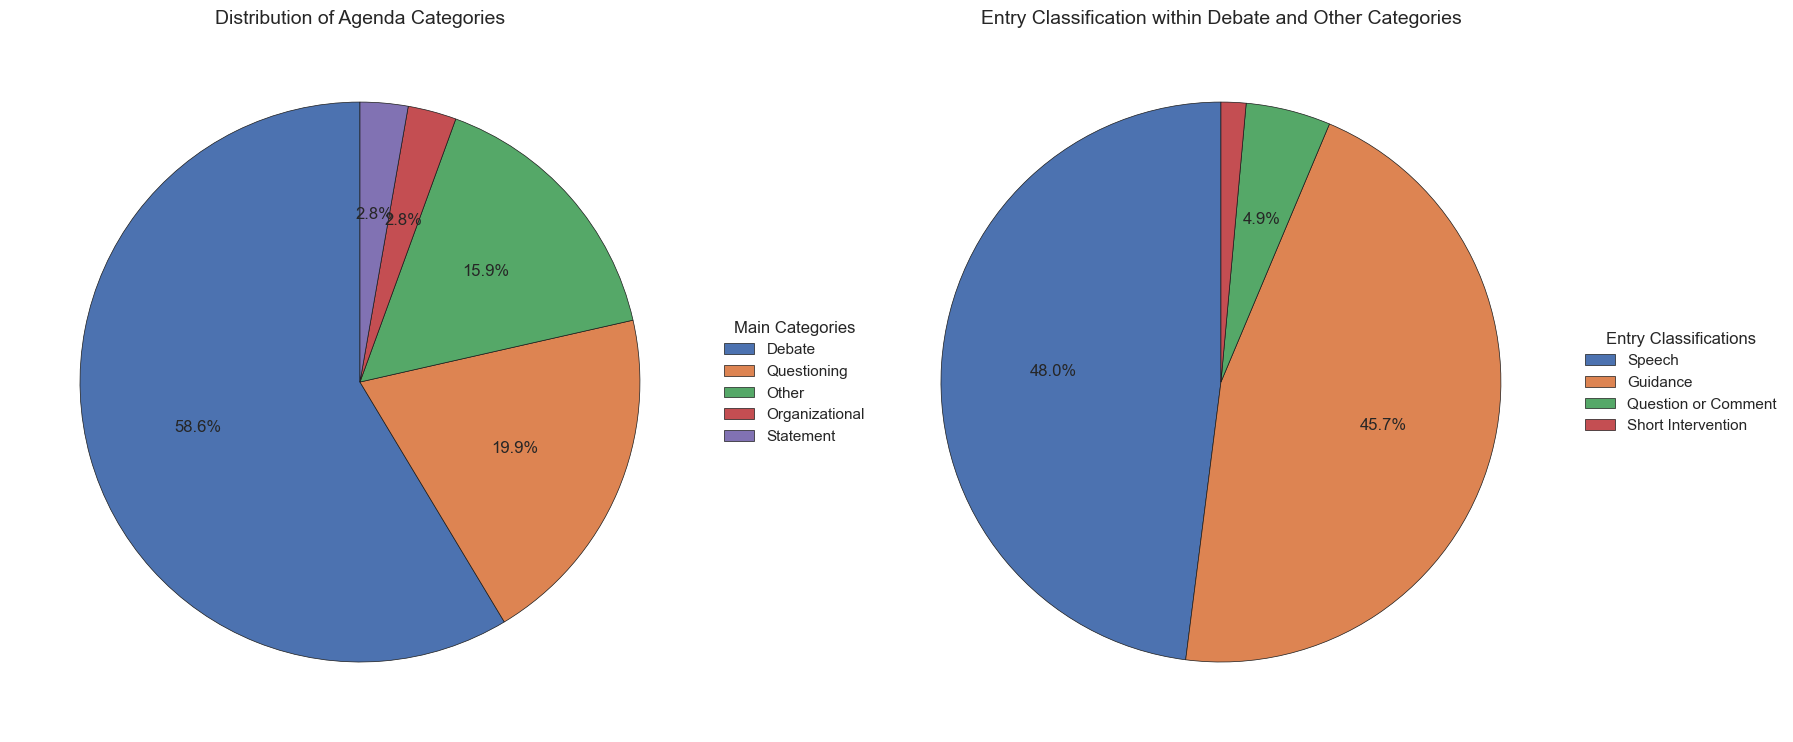

In [28]:
# Define a basic color palette for consistency
sns.set_theme(style="whitegrid")

# Create a figure with two subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define a function for percentage display with thresholds
def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# Pie chart for Main Categories
main_sizes = content_subset_with_classification['main_category'].value_counts()
axes[0].pie(
    main_sizes,
    labels=None,  # Use the legend instead of labels
    autopct=lambda pct: autopct_func(pct),
    startangle=90,
    wedgeprops=dict(edgecolor='k', linewidth=0.5)
)
axes[0].set_title('Distribution of Agenda Categories', fontsize=14)

# Legend for the first chart
axes[0].legend(
    main_sizes.index,
    title="Main Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Filter for Debate and Other main categories
debates = content_subset_with_classification[
    (content_subset_with_classification['main_category'] == 'Debate') | 
    (content_subset_with_classification['main_category'] == 'Other')
]

# Pie chart for Entry Classification within Debate and Other categories
entry_sizes = debates['entry_classification'].value_counts()
axes[1].pie(
    entry_sizes,
    labels=None,  # Use the legend instead of labels
    autopct=lambda pct: autopct_func(pct),
    startangle=90,
    wedgeprops=dict(edgecolor='k', linewidth=0.5)
)
axes[1].set_title('Entry Classification within Debate and Other Categories', fontsize=14)

# Legend for the second chart
axes[1].legend(
    entry_sizes.index,
    title="Entry Classifications",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Adjust layout for readability
plt.tight_layout()

# Save the plot as a PNG file for your thesis
plt.savefig('main_and_entry_classification_pie_charts_basic_colors.png', format='png', dpi=300)

# Display the plot
plt.show()

In [29]:
# add column month for further analysis
content_subset_with_classification['month_year'] = content_subset_with_classification['date'].dt.to_period('M')

In this section, contributions within parliamentary debates are classified based on the faction contributing and the type of contribution. This classification helps differentiate types of parliamentary contributions.

### 4.1 Allocation of contributions to parties

In this section, contributions are allocated to specific parties (factions) based on text content. The process involves mapping recognized party names and abbreviations to faction IDs, filtering contributions by faction, and identifying the presence and position of faction names within the text content. This ensures that each contribution is associated with a specific faction, which is essential for further analyses of inter-party discourse and reactions.

In [30]:
#make contributions dataframe with the last 100000 rows to ease computation time
contributions = contributions_raw.sort_values(by='speech_id').tail(100000)
# out of column content, check which faction is in there
# Step 1: Create a mapping of faction name/abbreviation to faction_id
faction_mapping = {row['abbreviation']: row['id'] for _, row in factions_raw.iterrows()}

# add Linken to mapping with number 7
faction_mapping['Linken'] = 7
faction_mapping['DIE Linke'] = 7
faction_mapping['GRÜNEN'] = 4
faction_mapping['CDU'] = 5
faction_mapping['F.D.P.'] = 15
faction_mapping['GRÜNE'] = 4
faction_mapping['BÜNDNISSES 90/DIE GRÜNEN'] = 4


# keep only rows in dictionary where faction id is 25, 5, 7
faction_mapping = {key: value for key, value in faction_mapping.items() if value in [25, 5, 7, 15, 0, 4,3, 20, 18]}
print(faction_mapping)


def extract_factions_with_positions(content):
    matched_factions = []
    positions = []
    for faction, faction_id in faction_mapping.items():
        # Use regex to ensure exact matching without duplicates
        for match in re.finditer(r'\b' + re.escape(faction) + r'\b', content, re.IGNORECASE):
            if faction_id not in matched_factions:  # Ensure uniqueness per faction_id
                matched_factions.append(faction_id)
                positions.append(match.start())  # Capture position
    return matched_factions, positions if matched_factions else ([], [])



# Step 4: Apply the function to the content of the last 40 rows
contributions[['faction_ids', 'faction_positions']] = contributions['content'].apply(
    lambda x: pd.Series(extract_factions_with_positions(x))
)

{'AfD': 0, 'Bündnis 90/Die Grünen': 4, 'DIE LINKE.': 7, 'CDU/CSU': 5, 'FDP': 15, 'SPD': 25, 'Fraktionslos': 18, 'BSW': 3, 'Gast': 20, 'Linken': 7, 'DIE Linke': 7, 'GRÜNEN': 4, 'CDU': 5, 'F.D.P.': 15, 'GRÜNE': 4, 'BÜNDNISSES 90/DIE GRÜNEN': 4}


### 4.2 Allocation of contribution types

This section categorizes contributions based on their content and textual cues. It first excludes contributions that are city names, as they do not contribute to meaningful discourse. Then, reaction types are categorized, with comments being labeled when the content includes an exclamation mark. This process refines the contributions dataset to include only relevant interactions, which is crucial for assessing reaction types and inter-party responses.

In [31]:
# Dictionary with the reaction types found in the data
reaction_types = {
    "Beifall": "Applause",
    "Zuruf": "Interjection",
    "Heiterkeit": "Cheerfulness",
    "Widerspruch": "Objection",
    "Lachen": "Laughter",
    "Unruhe": "Disturbance",
    "Zustimmung": "Agreement",
    "]:" : "Comment",
    "] :" : "Comment",
    "Abg.:": "Comment",
    "Zwischenfrage": "Question Request",
}

def extract_reactions_with_positions(content):
    matched_reactions = []
    positions = []
    for reaction, reaction_type in reaction_types.items():
        for match in re.finditer(re.escape(reaction), content, re.IGNORECASE):
            matched_reactions.append(reaction_type)
            positions.append(match.start())  # Capture the position of each match
    # Ensure two empty lists are returned if no reactions are found
    return (matched_reactions, positions) if matched_reactions else ([], [])

# Apply the function and expand the result into two separate columns
contributions[['reaction_types', 'reaction_positions']] = contributions['content'].apply(
    lambda x: pd.Series(extract_reactions_with_positions(x))
)
# Display the updated DataFrame
contributions


id             type first_name last_name  faction_id  speech_id  \
729  2856136  Personen-Einruf      frank   bsirske           4    1107044   
728  2856135          Beifall                               15    1107044   
727  2856134  Personen-Einruf    ottilie     klein           5    1107044   
726  2856133  Personen-Einruf    hermann     gröhe           5    1107044   
725  2856132            Zuruf                                5    1107044   
..       ...              ...        ...       ...         ...        ...   
387  2534619          Beifall                                4    1124128   
386  2534618          Beifall                               25    1124128   
403  2534635          Beifall                               15    1124128   
394  2534626          Beifall                               25    1124128   
404  2534636          Beifall                                4    1124128   

     text_position  politician_id                   content faction_ids  \
729              4       11005034    Das ist doch Blödsinn!          []   
728              3             -1                                    []   
727              2       11005106  Das fragen wir uns auch!          []   
726              2       11002666         Aha! Gute Frage!           []   
725              1             -1               Hört! Hört!          []   
..             ...            ...                       ...         ...   
387              0             -1                                    []   
386              0             -1                                    []   
403              6             -1                                    []   
394              3             -1                                    []   
404              6             -1                                    []   

    faction_positions reaction_types reaction_positions  
729          ([], [])             []                 []  
728          ([], [])             []                 []  
727          ([], [])             []                 []  
726          ([], [])             []                 []  
725          ([], [])             []                 []  
..                ...            ...                ...  
387          ([], [])             []                 []  
386          ([], [])             []                 []  
403          ([], [])             []                 []  
394          ([], [])             []                 []  
404          ([], [])             []                 []  

[100000 rows x 13 columns]

It is striking that a lot of "contributions" are just names of cites. We will need to filter them out as it mistakenly extracted as a contribution


In [32]:
# create list of cities
cities = cities_raw['Stadt'].tolist()

# check whether the contribution is just a city name
def contains_city_in_parentheses(content):
    for city in cities:
        if f"({city})" in content:
            return True
    return False

# Apply the function to the content column
contributions['city_mentions'] = contributions['content'].apply(contains_city_in_parentheses)

#show contributions where city mentions is true
contributions[contributions['city_mentions'] == True].sample(40)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
# Filter out all contributions that are just city names
contributions_without_cities = contributions[~(contributions['city_mentions'] & contributions['reaction_types'].apply(lambda x: x == []))]

contributions_without_cities

# Step 1: Check for rows where reaction could not get classified
empty_reactions_df = contributions_without_cities[
    (contributions_without_cities['reaction_types'].apply(lambda x: x == [])) &
    (contributions_without_cities['reaction_positions'].apply(lambda x: x == []))
]

empty_reactions_df

text_position                                            content  \
7               1  (Klaus Ernst [DIE LINKE], an die CDU/CSU gewan...   
11              7                                    (2 . Ausschuss)   
18              0                                                (f)   
17              1                                               (EU)   
15              3                                                (f)   
..            ...                                                ...   
4               0                                        (EUFOR RCA)   
3               1                                             (2013)   
1               3                                                (f)   
2               2                                             (2014)   
1               4                                             (2014)   

    speech_id faction_ids faction_positions reaction_types reaction_positions  \
7      812802      [5, 7]          [33, 14]             []                 []   
11     812826          []          ([], [])             []                 []   
18     812826          []          ([], [])             []                 []   
17     812826          []          ([], [])             []                 []   
15     812826          []          ([], [])             []                 []   
..        ...         ...               ...            ...                ...   
4      846665          []          ([], [])             []                 []   
3      846665          []          ([], [])             []                 []   
1      846665          []          ([], [])             []                 []   
2      846665          []          ([], [])             []                 []   
1      846682          []          ([], [])             []                 []   

    city_mentions  
7           False  
11          False  
18          False  
17          False  
15          False  
..            ...  
4           False  
3           False  
1           False  
2           False  
1           False  

[5743 rows x 8 columns]

By analyzing the remaining reactions that could not yet get classified, we find that there are some comments left. We will classify everythinng with an exclamaiton mark and no reaction type as comment

In [ ]:
# Function to classify as "Comment" if content contains "!" and reaction_types is empty
def classify_as_comment(row):
    if "!" in row['content'] and row['reaction_types'] == []:
        return ["Comment"]  # Classify as "Comment"
    return row['reaction_types']  # Keep the original list if condition not met

# Apply the function to the DataFrame
contributions_without_cities['reaction_types'] = contributions_without_cities.apply(classify_as_comment, axis=1)

# Display the updated DataFrame to check changes
contributions_without_cities

text_position                                            content  \
4               0                           (Beifall bei der LINKEN)   
0               1  (Dr . Petra Sitte [DIE LINKE]: Ach, das war es...   
1               0  (Albert Stegemann [CDU/CSU]: Ganz offensichtli...   
1               0  (Klaus Ernst [DIE LINKE]: Das ist ein anderes ...   
0               1  (Beifall bei der CDU/CSU - Bernhard Kaster [CD...   
..            ...                                                ...   
5               0  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
1               4                                             (2014)   
0               5  (Beifall bei der LINKEN - Henning Otte [CDU/ C...   
2               3   (Henning Otte [CDU/CSU]: Haben Sie auch gesagt!)   
0               0  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   

    speech_id faction_ids faction_positions                reaction_types  \
4      812792         [7]              [17]                    [Applause]   
0      812793         [7]              [19]                     [Comment]   
1      812793         [5]              [19]                     [Comment]   
1      812794         [7]              [14]                     [Comment]   
0      812794      [5, 7]         [17, 111]  [Applause, Comment, Comment]   
..        ...         ...               ...                           ...   
5      846682      [5, 7]          [50, 30]           [Applause, Comment]   
1      846682          []          ([], [])                            []   
0      846682      [7, 5]          [17, 40]           [Applause, Comment]   
2      846682         [5]              [15]                     [Comment]   
0      846684     [5, 25]          [17, 52]                    [Applause]   

   reaction_positions  city_mentions  
4                 [1]          False  
0                [28]          False  
1                [26]          False  
1                [23]          False  
0        [1, 51, 120]          False  
..                ...            ...  
5             [1, 57]          False  
1                  []          False  
0             [1, 48]          False  
2                [22]          False  
0                 [1]          False  

[95075 rows x 8 columns]

Clean data and filter out all remaining contributions that have not yet been classified as by inspection it is just mistakes in data

In [ ]:
#Filter out all contributions and safe in contributions_df only if reaction type empty and drop them from the data frame
contributions_df = contributions_without_cities[~contributions_without_cities['reaction_types'].apply(lambda x: x == [])]

#drop column city mentions
contributions_df.drop(columns=['city_mentions'], inplace=True)
contributions_df

text_position                                            content  \
4               0                           (Beifall bei der LINKEN)   
0               1  (Dr . Petra Sitte [DIE LINKE]: Ach, das war es...   
1               0  (Albert Stegemann [CDU/CSU]: Ganz offensichtli...   
1               0  (Klaus Ernst [DIE LINKE]: Das ist ein anderes ...   
0               1  (Beifall bei der CDU/CSU - Bernhard Kaster [CD...   
..            ...                                                ...   
3               2  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
5               0  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
0               5  (Beifall bei der LINKEN - Henning Otte [CDU/ C...   
2               3   (Henning Otte [CDU/CSU]: Haben Sie auch gesagt!)   
0               0  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   

    speech_id faction_ids faction_positions                reaction_types  \
4      812792         [7]              [17]                    [Applause]   
0      812793         [7]              [19]                     [Comment]   
1      812793         [5]              [19]                     [Comment]   
1      812794         [7]              [14]                     [Comment]   
0      812794      [5, 7]         [17, 111]  [Applause, Comment, Comment]   
..        ...         ...               ...                           ...   
3      846682      [5, 7]          [50, 30]           [Applause, Comment]   
5      846682      [5, 7]          [50, 30]           [Applause, Comment]   
0      846682      [7, 5]          [17, 40]           [Applause, Comment]   
2      846682         [5]              [15]                     [Comment]   
0      846684     [5, 25]          [17, 52]                    [Applause]   

   reaction_positions  
4                 [1]  
0                [28]  
1                [26]  
1                [23]  
0        [1, 51, 120]  
..                ...  
3             [1, 57]  
5             [1, 57]  
0             [1, 48]  
2                [22]  
0                 [1]  

[89458 rows x 7 columns]

In [ ]:
# show percentage of reaction types
# Step 1: Flatten the list of reaction types
flat_reaction_types = contributions_df['reaction_types'].explode()

# Step 2: Calculate the percentage of each reaction type
reaction_type_percentages = flat_reaction_types.value_counts(normalize=True) * 100
reaction_type_percentages

Applause            59.038624
Comment             34.330560
Interjection         3.251827
Cheerfulness         1.921005
Laughter             0.648424
Objection            0.572710
Question Request     0.125220
Disturbance          0.076685
Agreement            0.034945
Name: reaction_types, dtype: float64

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    reaction_type_percentages.values,          # Values (percentages)
    labels=reaction_type_percentages.index,    # Labels (reaction types)
    autopct='%1.1f%%',                         # Show percentages with one decimal place
    startangle=140,                            # Starting angle for first slice
    wedgeprops={'edgecolor': 'black'},         # Edge color for clear separation
    textprops={'fontsize': 12}                 # Text size for readability
)
plt.title("Percentage of Reaction Types in Parliamentary Contributions")
plt.show()

In [ ]:
# calculate how many contributions were classified
len(contributions_df)/len(contributions)

0.89458

There is a large imbalance in classes. However, we will continue analyzing everything to inspect if some of the classes reveal interesting insights

### 4.3 Allocation of faction to reaction type

In this section, each reaction type within a contribution is aligned with the relevant faction, based on positional information. Reactions labeled as "Comment" are paired with the closest preceding faction in the text, ensuring meaningful associations. Other reaction types are paired with faction IDs sequentially, preserving their order. This structured alignment provides a basis for analyzing faction-specific reactions, revealing interaction patterns in parliamentary discourse.

In [ ]:
def match_factions_to_reactions(row):
    # Sort factions and reactions by their positions
    faction_positions = row['faction_positions']
    reaction_positions = row['reaction_positions']

    # Flatten lists if they are nested and sort them along with faction_ids and reaction_types
    if any(isinstance(i, list) for i in faction_positions):
        faction_positions = [item for sublist in faction_positions for item in sublist]
    if any(isinstance(i, list) for i in reaction_positions):
        reaction_positions = [item for sublist in reaction_positions for item in sublist]

    sorted_factions = [x for _, x in sorted(zip(faction_positions, row['faction_ids']))]
    sorted_reactions = [x for _, x in sorted(zip(reaction_positions, row['reaction_types']))]
    sorted_faction_positions = sorted(faction_positions)
    sorted_reaction_positions = sorted(reaction_positions)
    
    matched_factions = []
    matched_reactions = []
    used_for_comment = set()  # Track factions already assigned to "Comment"

    # If there are reactions but no factions, assign "All" to each reaction
    if not sorted_factions and sorted_reactions:
        matched_factions = ["All"] * len(sorted_reactions)
        matched_reactions = sorted_reactions
        return matched_factions, matched_reactions

    # Step 1: Match "Comment" reactions
    for reaction_idx, reaction in enumerate(sorted_reactions):
        if reaction == "Comment":
            # Find the faction immediately before the comment position
            comment_position = sorted_reaction_positions[reaction_idx]
            closest_faction_idx = None
            for idx, faction_position in enumerate(sorted_faction_positions):
                if faction_position < comment_position and sorted_factions[idx] not in used_for_comment:
                    closest_faction_idx = idx
                elif faction_position >= comment_position:
                    break

            if closest_faction_idx is not None:
                faction = sorted_factions[closest_faction_idx]
                matched_factions.append(faction)
                matched_reactions.append("Comment")
                used_for_comment.add(faction)  # Mark this faction as used
            else:
                # If no valid faction found, skip this comment
                continue

    # Step 2: Match remaining reactions
    faction_idx = 0
    for reaction_idx, reaction in enumerate(sorted_reactions):
        if reaction == "Comment":
            continue  # Skip comments, already matched

        while faction_idx < len(sorted_factions):
            faction = sorted_factions[faction_idx]
            faction_position = sorted_faction_positions[faction_idx]

            if faction not in used_for_comment:
                matched_factions.append(faction)
                matched_reactions.append(reaction)
                faction_idx += 1
                break  # Move to the next reaction after finding a match
            faction_idx += 1

    # Handle unmatched factions by appending remaining factions, if needed
    if len(matched_factions) < len(sorted_factions):
        unmatched_factions = [f for f in sorted_factions if f not in used_for_comment and f not in matched_factions]
        matched_factions.extend(unmatched_factions)
        # Extend matched_reactions with the last known reaction type or leave as blank
        if matched_reactions:
            matched_reactions.extend([matched_reactions[-1]] * (len(matched_factions) - len(matched_reactions)))

    return matched_factions, matched_reactions

# Apply the function to each row in contributions DataFrame
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(
    lambda row: pd.Series(match_factions_to_reactions(row)),
    axis=1
)

# Display the updated DataFrame
contributions_df.sample(10)


text_position                                            content  \
0              0                          (Beifall bei der CDU/CSU)   
1              0  (Beifall der Abg. Dr. Kirsten Tackmann [DIE LI...   
2              4                           (Beifall bei der LINKEN)   
7              2  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   
0              7  (Lebhafter Beifall bei der SPD und der CDU/ CS...   
1              3  (Beifall bei der SPD und dem BÜNDNIS 90/ DIE G...   
2              8    (Dagmar Ziegler [SPD]: Aber nur einen kleinen!)   
0             19              (Beifall bei der SPD und der CDU/CSU)   
0              2  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   
3             11  (Matthias Gastel [BÜNDNIS 90/DIE GRÜNEN]: Davo...   

   speech_id faction_ids faction_positions       reaction_types  \
0     834374         [5]              [17]           [Applause]   
1     824828         [7]              [40]           [Applause]   
2     830119         [7]              [17]           [Applause]   
7     816860     [5, 25]          [17, 52]           [Applause]   
0     839152  [4, 25, 5]      [64, 27, 39]  [Applause, Comment]   
1     838220  [5, 25, 4]      [79, 17, 45]           [Applause]   
2     825131        [25]              [17]            [Comment]   
0     821022     [5, 25]          [29, 17]           [Applause]   
0     832632     [5, 25]          [17, 52]           [Applause]   
3     842887         [4]              [18]            [Comment]   

  reaction_positions matched_factions               matched_reactions  
0                [1]              [5]                      [Applause]  
1                [1]              [7]                      [Applause]  
2                [1]              [7]                      [Applause]  
7                [1]          [5, 25]            [Applause, Applause]  
0           [11, 85]       [4, 25, 5]   [Comment, Applause, Applause]  
1                [1]       [25, 4, 5]  [Applause, Applause, Applause]  
2               [20]             [25]                       [Comment]  
0                [1]          [25, 5]            [Applause, Applause]  
0                [1]          [5, 25]            [Applause, Applause]  
3               [39]              [4]                       [Comment]

In [ ]:
# show where leghth of lists are not the same for faction_ids and reaction_types
inspection_df= (contributions_df[contributions_df['faction_ids'].str.len() != contributions_df['reaction_types'].str.len()])

# filter away all where reaction type is other and faction ids is nan
inspection_df = inspection_df[~(inspection_df['reaction_types'].apply(lambda x: 'Other' in x) & inspection_df['faction_ids'].isna())]

# filter away all faction ids nan
inspection_df = inspection_df[~inspection_df['faction_ids'].isna()]

# show where length of list of faction_ids is not the same as reaction_types
inspection_df = inspection_df[inspection_df['faction_ids'].str.len() != inspection_df['reaction_types'].str.len()]

# show where length of faction id is more than 1 and length of reaction type is more than 1
inspection_df = inspection_df[(inspection_df['faction_ids'].str.len() > 1)]
inspection_df = inspection_df[(inspection_df['reaction_types'].str.len() > 1)]

# increase columnn with for content
pd.set_option('display.max_colwidth', None)

print(len(inspection_df))
inspection_df.sample()

3338


text_position  \
3              6   

                                                                                                content  \
3  (Beifall bei Abgeordneten der SPD und der CDU/CSU - Herbert Behrens [DIE LINKE]: Vom Grundsatz her!)   

   speech_id faction_ids faction_positions       reaction_types  \
3     832808  [5, 25, 7]      [42, 30, 69]  [Applause, Comment]   

  reaction_positions matched_factions              matched_reactions  
3            [1, 78]       [7, 25, 5]  [Comment, Applause, Applause]

In [ ]:
# show where matched_factions is not the same length as matched_reaactins
inspection_df2 = contributions_df[contributions_df['matched_factions'].str.len() != contributions_df['matched_reactions'].str.len()]
print(len(inspection_df2))
inspection_df2.sample(10)

62


text_position  \
13              8   
3               5   
9               1   
9               2   
9               3   
10              2   
11              3   
17              1   
7               5   
5               4   

                                                                                                                                                                                content  \
13                                                                                          (Dr . André Hahn [DIE LINKE], an die SPD gewandt: Habt ihr einen tollen Koalitionspartner!)   
3                                                                                                                         (Katja Keul [BÜNDNIS 90/DIE GRÜNEN: Genau wie Saudi-Arabien!)   
9                                                                         (Özcan Mutlu [BÜNDNIS 90/DIE GRÜNEN], an die LINKE gewandt: Im Sportausschuss habt ihr keinen Antrag gehabt!)   
9                                                               (Wolfgang Gehrcke [DIE LINKE], an das BÜNDNIS 90/DIE GRÜNEN gewandt: Jetzt muss ich euch direkt gegen die verteidigen!)   
9                                     (Dr. Eva Högl [SPD], an die Abgeordneten der LINKEN und des BÜNDNISSES 90/DIE GRÜNEN gewandt: Eigentlich ist dieses Gesetz doch ein Meilenstein!)   
10                                                                         (Renate Künast [BÜNDNIS 90/DIE GRÜNEN: Jetzt tun Sie wieder so, als seien Sie der Erfinder der Frauenquote!)   
11                                                 (Volker Kauder [CDU/CSU], an die SPD gewandt: Ich habe das bezahlt, was ihr den Kommunen draufgelegt habt in der letzten Koalition!)   
17                                                            (Kerstin Andreae [BÜNDNIS 90/DIE GRÜNEN], an die Abg . Dr . Petra Sitte [DIE LINKE] gewandt: Genau da hat es angefangen!)   
7   (Renate Künast [BÜNDNIS 90/DIE GRÜNEN], an die Abgeordneten der CDU/CSU und der SPD gewandt: Gehen Sie nicht raus! Wir haben jetzt die Mehrheit! Wir beschließen jetzt 40 Prozent!)   
5                                                               (Dr. Petra Sitte [DIE LINKE] Aber wenn man einen Bayern heiratet, möchte man auch nicht unbedingt nur Leberkäse essen!)   

    speech_id faction_ids faction_positions reaction_types reaction_positions  \
13     814898     [25, 7]          [37, 18]      [Comment]                 []   
3      818493         [4]              [13]      [Comment]                 []   
9      842430      [4, 7]          [14, 41]      [Comment]                 []   
9      829384      [4, 7]          [38, 19]      [Comment]                 []   
9      814561  [25, 7, 4]      [15, 45, 78]      [Comment]                 []   
10     815133         [4]              [16]      [Comment]                 []   
11     815605     [5, 25]          [16, 33]      [Comment]                 []   
17     841346      [4, 7]          [18, 73]      [Comment]                 []   
7      814561  [4, 5, 25]      [16, 64, 80]      [Comment]                 []   
5      832926         [7]              [18]      [Comment]                 []   

   matched_factions matched_reactions  
13          [7, 25]                []  
3               [4]                []  
9            [4, 7]                []  
9            [7, 4]                []  
9        [25, 7, 4]                []  
10              [4]                []  
11          [5, 25]                []  
17           [4, 7]                []  
7        [4, 5, 25]                []  
5               [7]                []

In [ ]:
# If reaction types is only comment, take the first matched_factions and place comment in matched reactions
def classify_comment_only(row):
    # Check if reaction_types is only "Comment" and matched_factions is not empty
    if row['reaction_types'] == ['Comment'] and row['matched_factions']:
        return [row['matched_factions'][0]], ['Comment']
    return row['matched_factions'], row['matched_reactions']

# Apply the function to update matched_factions and matched_reactions
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(classify_comment_only, axis=1, result_type='expand')

# Show where matched_factions is not the same length as matched_reactions
inspection_df3 = contributions_df[contributions_df['matched_factions'].str.len() != contributions_df['matched_reactions'].str.len()]
print(len(inspection_df3))
inspection_df3

0


Empty DataFrame
Columns: [text_position, content, speech_id, faction_ids, faction_positions, reaction_types, reaction_positions, matched_factions, matched_reactions]
Index: []

In [ ]:
#equalize row lengths
def equalize_lists(row):
    matched_factions = row['matched_factions']
    matched_reactions = row['matched_reactions']

    # If matched_reactions is shorter, fill empty slots with "Other"
    if len(matched_reactions) < len(matched_factions):
        missing_count = len(matched_factions) - len(matched_reactions)
        matched_reactions.extend(["Other"] * missing_count)

    # Return the modified lists
    return pd.Series([matched_factions, matched_reactions])

# Apply the equalize_lists function to each row
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(equalize_lists, axis=1)

contributions_df.sample(10)

text_position  \
11              1   
1               2   
7               0   
7              18   
5               4   
1               8   
6               7   
2              13   
1               2   
3               6   

                                                                                     content  \
11                                            (Beifall der Abg . Dr . Katarina Barley [SPD])   
1                                   (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)   
7                                                  (Peter Beyer [CDU/CSU]: So sieht es aus!)   
7                                                          (Willi Brase [SPD]: Wird kommen!)   
5                                   (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)   
1   (Beifall bei Abgeordneten der SPD - Zuruf der Abg. Monika Lazar [BÜNDNIS 90/DIE GRÜNEN])   
6               (Beifall bei Abgeordneten der CDU/CSU sowie des Abg. Stefan Schwartze [SPD])   
2                                                    (Ralph Brinkhaus [CDU/CSU]: Gute Frau!)   
1                                                                   (Beifall bei der LINKEN)   
3                                                       (Beifall beim BÜNDNIS 90/DIE GRÜNEN)   

    speech_id faction_ids faction_positions            reaction_types  \
11     815133        [25]              [41]                [Applause]   
1      814939     [5, 25]          [48, 17]                [Applause]   
7      835273         [5]              [14]                 [Comment]   
7      840291        [25]              [14]                 [Comment]   
5      830544     [5, 25]          [48, 17]                [Applause]   
1      832610     [4, 25]          [65, 30]  [Applause, Interjection]   
6      819281     [5, 25]          [30, 71]                [Applause]   
2      839796         [5]              [18]                 [Comment]   
1      820344         [7]              [17]                [Applause]   
3      824440         [4]              [14]                [Applause]   

   reaction_positions matched_factions         matched_reactions  
11                [1]             [25]                [Applause]  
1                 [1]          [25, 5]      [Applause, Applause]  
7                [21]              [5]                 [Comment]  
7                [17]             [25]                 [Comment]  
5                 [1]          [25, 5]      [Applause, Applause]  
1             [1, 36]          [25, 4]  [Applause, Interjection]  
6                 [1]          [5, 25]      [Applause, Applause]  
2                [25]              [5]                 [Comment]  
1                 [1]              [7]                [Applause]  
3                 [1]              [4]                [Applause]

Explode the dataframe to have one reaction and factio per row

In [ ]:
# Now explode the DataFrame to have each reaction in its own row
contributions_exploded = contributions_df.explode(['matched_factions', 'matched_reactions'], ignore_index=True)

# Display the resulting DataFrame
contributions_exploded.sample(10)

text_position  \
122047              5   
7630                0   
68648               0   
34108               3   
129260              1   
102059              2   
77839               0   
10620               2   
11094               2   
70859               8   

                                                                                                                           content  \
122047                                                                                        (Beifall beim BÜNDNIS 90/DIE GRÜNEN)   
7630                                                                      (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)   
68648                          (Beifall beim BÜNDNIS 90/DIE GRÜNEN, bei der CDU/CSU und der SPD sowie bei Abgeordneten der LINKEN)   
34108          (Dr. Michael Fuchs [CDU/CSU]: Das hat er sich noch nicht einmal angeguckt! Haben Sie sich das überhaupt angeguckt?)   
129260                                                                          (Michaela Engelmeier [SPD]: Kann man nicht sagen!)   
102059                                                   (Beifall bei der SPD sowie bei Abgeordneten des BÜNDNISSES 90/DIE GRÜNEN)   
77839                                                                     (Beifall bei der CDU/CSU sowie bei Abgeordneten der SPD)   
10620                                    (Beifall bei der CDU/CSU und der SPD sowie bei Abgeordneten des BÜNDNISSES 90/DIE GRÜNEN)   
11094   (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU und des Abg. Dr. Wolfgang Strengmann-Kuhn [BÜNDNIS 90/DIE GRÜNEN])   
70859                  (Beifall beim BÜNDNIS 90/DIE GRÜNEN sowie bei Abgeordneten der LINKEN - Volker Kauder [CDU/CSU]: Wahnsinn!)   

        speech_id    faction_ids faction_positions       reaction_types  \
122047     842918            [4]              [14]           [Applause]   
7630       814739        [5, 25]          [48, 17]           [Applause]   
68648      829399  [4, 5, 25, 7]  [14, 45, 61, 92]           [Applause]   
34108      820854            [5]              [20]            [Comment]   
129260     844778           [25]              [22]            [Comment]   
102059     836872        [25, 4]          [17, 66]           [Applause]   
77839      831579        [5, 25]          [17, 52]           [Applause]   
10620      815236     [5, 25, 4]      [17, 33, 82]           [Applause]   
11094      815289     [4, 5, 25]      [99, 48, 17]           [Applause]   
70859      829828      [4, 5, 7]      [14, 87, 63]  [Applause, Comment]   

       reaction_positions matched_factions matched_reactions  
122047                [1]                4          Applause  
7630                  [1]               25          Applause  
68648                 [1]                4          Applause  
34108                [27]                5           Comment  
129260               [25]               25           Comment  
102059                [1]               25          Applause  
77839                 [1]                5          Applause  
10620                 [1]                5          Applause  
11094                 [1]                4          Applause  
70859             [1, 94]                5           Comment

## 4. Content Dataframe Statistics

### 4.1 Total Interruptions (Question or Comment) per Party

This section analyzes the frequency of interruptions (marked as "Question or Comment") directed at each faction over time, as recorded in parliamentary debate sessions. First, the dataset is filtered to include only relevant sessions and entries classified as interruptions. Then, interruptions are counted per faction for each month, pivoted to a matrix format, and smoothed with a 12-month rolling average. Finally, we visualize the results to observe trends in interruptions over time for each faction and the total interruptions across all factions.

In [30]:
# Step 1: Filter the DataFrame to exclude "Debate" and "Other" in "main_category"
debate_df = content_subset_with_classification[
    content_subset_with_classification['main_category'].isin(['Debate', 'Other'])
]

# Step 2: Filter for "Question or Comment" entries and group by speech_politician to count only one per speech
# We'll consider only unique pairs of (speech_politician, faction) for "Question or Comment"
comments_df = debate_df[
    (debate_df['entry_classification'] == 'Question or Comment')
].drop_duplicates(subset=['electoral_term','session', 'politician_id', 'speech_politician'])

comments_df.columns

Index(['id', 'electoral_term', 'session', 'first_name', 'document_url',
       'last_name', 'faction_id', 'position_short', 'position_long',
       'politician_id', 'top_item', 'top_title', 'speech_content', 'date',
       'faction', 'year', 'speech_length', 'age', 'gender', 'tenure', 'topic',
       'main_category', 'sub_category', 'Stadt', 'Former Country',
       'City Classification', 'content_category', 'entry_classification',
       'speech_politician', 'speech_politician_faction', 'month_year'],
      dtype='object')

We want to count one interruption by a politician as one interruption. A potentially evolving dialouge is not counted

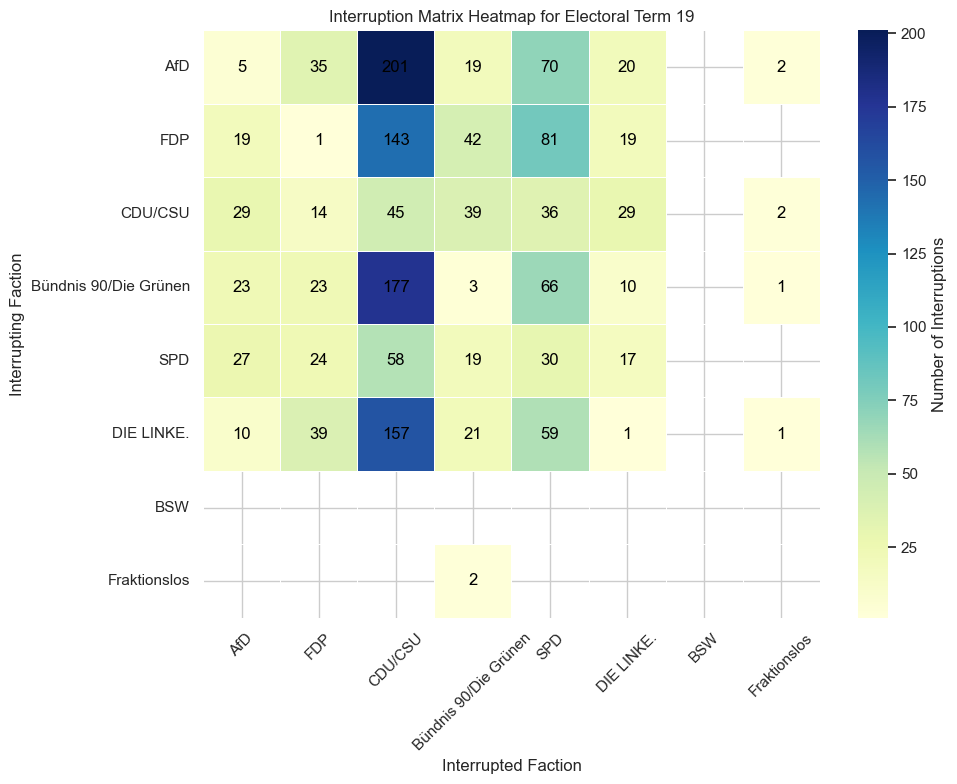

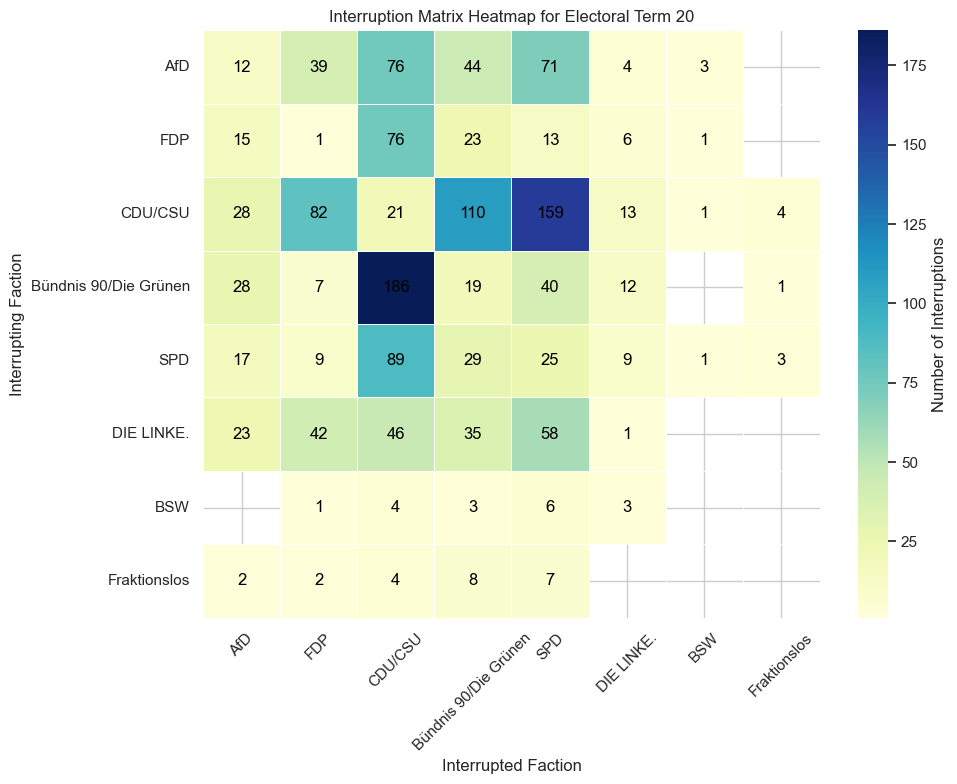

In [31]:
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'BSW', 'Fraktionslos']


for term in comments_df['electoral_term'].unique():
    # Filter data for the current electoral term
    term_data = comments_df[comments_df['electoral_term'] == term]
    
    # Create a cross-tabulation to count occurrences of each reaction relationship
    reaction_matrix = pd.crosstab(term_data['faction'], term_data['speech_politician_faction'])
    
    # Reindex to ensure the correct order of rows and columns
    reaction_matrix = reaction_matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
    
    # Create a mask for cells with zero values
    mask = reaction_matrix == 0
    
    # Plot heatmap for the current electoral term with custom settings
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        reaction_matrix, 
        annot=True, 
        cmap=sns.color_palette("YlGnBu", as_cmap=True),  # Use a color palette with white as the lowest value
        fmt="d", 
        linewidths=0.5, 
        cbar_kws={'label': 'Number of Interruptions'}, 
        mask=mask,  # Apply the mask to hide zeros
        annot_kws={"color": "black"}  # Set annotation color for non-zero values
    )
    plt.title(f'Interruption Matrix Heatmap for Electoral Term {term}')
    plt.xlabel('Interrupted Faction')
    plt.ylabel('Interrupting Faction')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

### 4.2 Total Interruptions over time

This section investigates which factions interrupt other factions by electoral term, creating a matrix to capture inter-faction interactions. For each electoral term, a cross-tabulation of interruptions is performed, where rows represent the "interrupting faction" and columns represent the "interrupted faction." The resulting matrix is reindexed to ensure a consistent faction order and visualized using a heatmap to illustrate the frequency and distribution of interruptions among factions for each term.


#### 4.2.1 Interruptions over time - politicians interrupting

In [ ]:
# Define color map for factions
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'pink',
    'AfD': 'blue',
    'BSW': 'purple'
}

# Group by 'month_year' and 'faction' to count the number of "Question or Comment" entries per faction per month
monthly_counts = comments_df.groupby(['month_year', 'faction']).size().reset_index(name='count')

# Pivot the data to have factions as columns, filling any missing values with 0
monthly_counts_pivot = monthly_counts.pivot(index='month_year', columns='faction', values='count').fillna(0)

# Add a "Total" column to represent the sum across all factions for each month
monthly_counts_pivot['Total'] = monthly_counts_pivot.sum(axis=1)

# Step 5: Outlier Detection and Removal (IQR Method) for each faction
def remove_outliers(df):
    """Applies IQR-based outlier removal on each column in the dataframe."""
    for column in df.columns[:-1]:  # Exclude 'Total' column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        df.loc[outliers, column] = np.nan  # Replace outliers with NaN
    return df

monthly_counts_no_outliers = remove_outliers(monthly_counts_pivot)

# Step 6: Apply a 12-month rolling average after removing outliers
monthly_counts_smoothed = monthly_counts_no_outliers.rolling(window=12, min_periods=1).mean()

# Step 7: Plot each faction in one chart with rolling average
plt.figure(figsize=(14, 8))
for faction in monthly_counts_smoothed.columns[:-1]:  # Exclude the 'Total' column
    color = color_map.get(faction, 'gray')
    plt.plot(
        monthly_counts_smoothed.index.to_timestamp(), 
        monthly_counts_smoothed[faction], 
        label=faction, 
        color=color
    )

# Customize plot appearance for faction-specific chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Number of Questions or Comments made (12-Month Rolling Avg)')
plt.title('Monthly Questions or Comments made per Faction Over Time (Smoothed, Outliers Removed)')
plt.legend(title='Faction', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Plot the 'Total' line in a separate chart with rolling average
plt.figure(figsize=(14, 6))
plt.plot(
    monthly_counts_smoothed.index.to_timestamp(), 
    monthly_counts_smoothed['Total'], 
    label='Total', 
    color='gray'
)

# Customize plot appearance for the total line chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Total Questions or Comments (12-Month Rolling Avg)')
plt.title('Monthly Total Questions or Comments Over Time (Smoothed, Outliers Removed)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Wee can see that opposition always makes more comments. We will inspect that further classifying the parties by governing parties and opposition

In [33]:
# show month with the highest amounnt of reactions
monthly_counts_pivot['Total'].idxmax()


Period('2013-06', 'M')

#### 4.2.2. Interruptions over time - speeches interrupted

In [101]:
# Group by 'month_year' and 'speech_politician_faction' to count questions/comments
monthly_counts_speech = comments_df.groupby(['month_year', 'speech_politician_faction']).size().reset_index(name='count')

# Pivot the data to have factions as columns, filling any missing values with 0
monthly_counts_speech_pivot = monthly_counts_speech.pivot(index='month_year', columns='speech_politician_faction', values='count').fillna(0)

# Add a "Total" column to represent the sum across all factions for each month
monthly_counts_speech_pivot['Total'] = monthly_counts_speech_pivot.sum(axis=1)

# Apply IQR-based outlier removal for each faction column
def remove_outliers(df):
    for column in df.columns[:-1]:  # Exclude 'Total' column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        df.loc[outliers, column] = np.nan  # Replace outliers with NaN
    return df

# Remove outliers from the data
monthly_counts_speech_no_outliers = remove_outliers(monthly_counts_speech_pivot)

# Apply a 12-month rolling average to the outlier-free data
monthly_counts_speech_smoothed = monthly_counts_speech_no_outliers.rolling(window=12, min_periods=1).mean()

# Plot each faction with a 12-month rolling average
plt.figure(figsize=(14, 8))
for faction in monthly_counts_speech_smoothed.columns[:-1]:  # Exclude 'Total' column
    color = color_map.get(faction, 'gray')
    plt.plot(
        monthly_counts_speech_smoothed.index.to_timestamp(), 
        monthly_counts_speech_smoothed[faction], 
        label=faction, 
        color=color
    )

# Customize plot appearance for faction-specific chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Number of Questions or Comments received (12-Month Rolling Avg)')
plt.title('Monthly Questions or Comments received per Faction Over Time (Smoothed, Outliers Removed)')
plt.legend(title='Faction', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We inspect that parties with more speaking time are also interrupted more often (which makes) sense. However, we need to normalize, calculationng some sort of frequency to account for that

#### 4.2.3 Interruptions vs. interrupting

In [103]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

# Define the faction order for sorting
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'BSW','Fraktionslos']

# Step 1: Filter the DataFrame for electoral term 20 and exclude entries with no faction
term_20_data_comments = comments_df[(comments_df['electoral_term'] == 20) & (comments_df['faction'].notna())]

# Step 2: Create a cross-tabulation to count interruptions (who interrupted whom)
reaction_matrix = pd.crosstab(term_20_data_comments['faction'], term_20_data_comments['speech_politician_faction'])

# Reindex to enforce consistent faction order
reaction_matrix = reaction_matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)

# Step 3: Calculate total interruptions given and received per party
interruptions_given = reaction_matrix.sum(axis=1)  # Rows: interruptions given by each faction
interruptions_received = reaction_matrix.sum(axis=0)  # Columns: interruptions received by each faction

# Calculate percentage difference
percentage_difference = (interruptions_given - interruptions_received) / (interruptions_given + interruptions_received) * 100

# Step 4: Create a DataFrame for plotting
interruptions_summary = pd.DataFrame({
    'Faction': faction_order,
    'Interruptions Given': interruptions_given.reindex(faction_order, fill_value=0),
    'Interruptions Received': interruptions_received.reindex(faction_order, fill_value=0),
    'Percentage Difference': percentage_difference.reindex(faction_order, fill_value=0)
}).fillna(0)

# Step 5: Plot a bar chart for interruptions given vs. received
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar width to plot given and received side-by-side
bar_width = 0.4
x_positions = range(len(interruptions_summary))  # Numeric x-axis positions

# Bar for interruptions given
bars1 = ax.bar(
    [x - bar_width / 2 for x in x_positions], 
    interruptions_summary['Interruptions Given'], 
    bar_width, 
    label='Interruptions Given', 
    color='skyblue'
)

# Bar for interruptions received
bars2 = ax.bar(
    [x + bar_width / 2 for x in x_positions], 
    interruptions_summary['Interruptions Received'], 
    bar_width, 
    label='Interruptions Received', 
    color='salmon'
)

# Add percentage difference as text above bars
for x, row in zip(x_positions, interruptions_summary.itertuples()):
    ax.text(
        x, 
        max(row[2], row[3]) + 5,  # Offset above the taller bar
        f'{row[4]:.1f}%',  # Percentage difference
        ha='center', 
        fontsize=12
    )

# Add explanation line below the chart
plt.figtext(
    0.52, 
    0.0, 
    'Percentage Difference = (Interruptions Given - Interruptions Received) / Total Interruptions × 100', 
    ha='center', 
    fontsize=12, 
    wrap=True
)



# Customize the chart
ax.set_title('Interruptions Given vs. Received per Faction (Electoral Term 20)', fontsize=14)
ax.set_xlabel('Faction', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x_positions)
ax.set_xticklabels(interruptions_summary['Faction'], rotation=45, fontsize=12)
ax.legend(title='Type', fontsize=12)
plt.tight_layout()

plt.savefig('interruptions_given_vs_received.png', format='png', dpi=300)

# Display the plot
plt.show()


### 4.3 Interruption Frequency

This section calculates the overall interruption frequency over time, accounting for the volume of reactions relative to total speaking time per day. The steps include:
1. Counting reactions per day and calculating total speaking time for each date.
2. Calculating interruption frequency by dividing reaction counts by speaking time, then removing outliers using the IQR method.
3. Applying a 90-day rolling average to smooth interruption frequencies.
4. Plotting a line chart to observe trends over time.

#### 4.3.1  Total Interruption Frequency

In [ ]:
# Factor used to receive higher values
NORMALIZATION_FACTOR = 10000

total_reactions_per_month = comments_df.groupby(['month_year'])['id'].size().reset_index(name='total_reactions')

# Step 2: Calculate the total speaking time per month
speeches_df = debate_df[debate_df['entry_classification'].isin(['Speech', 'Short Intervention'])]
total_speaking_time_per_month = speeches_df.groupby('month_year')['speech_length'].sum().reset_index(name='total_speaking_time')

# Step 3: Merge to align total reactions with total speaking time per month
month_interruption_data = total_reactions_per_month.merge(total_speaking_time_per_month, on='month_year')

# Step 4: Calculate the interruption frequency per month
month_interruption_data['interruption_frequency'] = (
    month_interruption_data['total_reactions'] / month_interruption_data['total_speaking_time'])* NORMALIZATION_FACTOR

# Step 5: Remove outliers using the IQR method
Q1 = month_interruption_data['interruption_frequency'].quantile(0.25)
Q3 = month_interruption_data['interruption_frequency'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (month_interruption_data['interruption_frequency'] < (Q1 - 1.5 * IQR)) | \
                    (month_interruption_data['interruption_frequency'] > (Q3 + 1.5 * IQR))
month_interruption_data_no_outliers = month_interruption_data[~outlier_condition]

# Step 6: Apply a 12-month rolling average to smooth the interruption frequency
month_interruption_data_no_outliers['smoothed_interruption_frequency'] = (
    month_interruption_data_no_outliers['interruption_frequency'].rolling(window=12, min_periods=1, center=True).mean()
)

month_interruption_data_no_outliers['month_year'] = month_interruption_data_no_outliers['month_year'].dt.to_timestamp()

# Step 7: Plot the smoothed interruption frequency over time by month
plt.figure(figsize=(14, 8))

# Plotting without markers for a cleaner look
plt.plot(
    month_interruption_data_no_outliers['month_year'],
    month_interruption_data_no_outliers['smoothed_interruption_frequency'],
    color='blue',
    linewidth=2,
    linestyle='-'
)

# Set plot title and labels
plt.title('Smoothed Interruption Frequency Over Time by Month', fontsize=16)
plt.xlabel('Date (Month-Year)', fontsize=14)
plt.ylabel('Smoothed Interruption Frequency', fontsize=14)

# Format the x-axis to show dates more cleanly
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Use a date formatter to show fewer dates and improve readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show labels once per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as Year only

# Display the plot
plt.tight_layout()

plt.savefig('smoothed_interruption_frequency_over_time.png', format='png', dpi=300)
plt.show()



#### 4.3.2 Interruption Frequency per Faction

In [ ]:
# Step 1: Calculate total speaking time per faction and date
# Group by 'electoral_term', 'date', and 'faction' to get the total speech length per faction on each date
speeches_df['month_year'] = speeches_df['date'].dt.to_period('M')
speech_length_df = speeches_df.groupby(['electoral_term', 'month_year', 'faction'])['speech_length'].sum().reset_index()
speech_length_df.rename(columns={'speech_length': 'speech_length_faction', 'faction': 'interrupted_faction'}, inplace=True)

comments_df['month_year'] = comments_df['date'].dt.to_period('M')
# Step 3: Merge total speaking time with `comments_df` so each comment aligns with the monthly speaking time
comments_with_speech_length = comments_df.merge(
    speech_length_df,
    left_on=['month_year', 'speech_politician_faction'],
    right_on=['month_year', 'interrupted_faction'],
    how='left'
)

# Drop unneeded columns for clarity
comments_with_speech_length.drop(columns=['speech_politician_faction', 'electoral_term_y'], inplace=True)
comments_with_speech_length.rename(columns={'electoral_term_x': 'electoral_term', 'faction': 'interrupting_faction'}, inplace=True)

# Step 4: Group by month and faction to calculate total reactions and speaking time
faction_reaction_analysis = comments_with_speech_length.groupby(
    ['month_year', 'interrupted_faction']
).agg(
    total_reactions=('id', 'size'),  # Count of reactions per faction per month
    total_speaking_time=('speech_length_faction', 'mean')  # Mean speaking time for each faction per month
).reset_index()

# Step 5: Calculate interruption frequency for each faction per month
faction_reaction_analysis['interruption_frequency'] = (
    faction_reaction_analysis['total_reactions'] / faction_reaction_analysis['total_speaking_time']
)* NORMALIZATION_FACTOR

# Replace NaN values with 0 if necessary
faction_reaction_analysis.fillna({'total_reactions': 0, 'total_speaking_time': 0}, inplace=True)

# Step 6: Remove outliers using IQR method for interruption frequency
Q1 = faction_reaction_analysis['interruption_frequency'].quantile(0.25)
Q3 = faction_reaction_analysis['interruption_frequency'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (faction_reaction_analysis['interruption_frequency'] < (Q1 - 1.5 * IQR)) | \
                    (faction_reaction_analysis['interruption_frequency'] > (Q3 + 1.5 * IQR))
faction_reaction_analysis_no_outliers = faction_reaction_analysis[~outlier_condition]

# Step 7: Apply a 12-month rolling average for smoothing
faction_reaction_analysis_no_outliers['smoothed_interruption_frequency'] = (
    faction_reaction_analysis_no_outliers.groupby('interrupted_faction')['interruption_frequency']
    .transform(lambda x: x.rolling(window=12, min_periods=1).mean())
)

faction_reaction_analysis_no_outliers['month_year'] = faction_reaction_analysis_no_outliers['month_year'].dt.to_timestamp()
# Step 8: Visualization
plt.figure(figsize=(14, 8))

# Plot each faction's smoothed interruption frequency over time
for faction in faction_reaction_analysis_no_outliers['interrupted_faction'].unique():
    faction_data = faction_reaction_analysis_no_outliers[
        faction_reaction_analysis_no_outliers['interrupted_faction'] == faction
    ]
    
    plt.plot(
        faction_data['month_year'],
        faction_data['smoothed_interruption_frequency'],
        label=faction,
        color=color_map.get(faction, 'gray'),
        linewidth=2,
        alpha=0.7
    )

# Customize plot appearance
plt.title('Smoothed Interruption Frequency by Interrupted Faction Over Time (Monthly, 12-Month Rolling Average)', fontsize=16)
plt.xlabel('Date (Month-Year)', fontsize=14)
plt.ylabel('Smoothed Interruption Frequency of Interrupted Faction', fontsize=14)
plt.legend(title='Faction')
plt.grid(True)

# Format x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


#### 4.3.3 Interruption Frequency per Faction and Interrupting Faction

This section computes the interruption frequency matrix, normalized by total speaking time per faction within each electoral term. Key steps are:
1. Grouping interruption counts by `electoral_term`, `interrupting_faction`, and `interrupted_faction`.
2. Summing total speaking time for each faction in each electoral term.
3. Calculating interruption frequency by dividing reactions by total speaking time and scaling results.
4. Creating a heatmap for each electoral term to show faction-wise interruption frequencies.


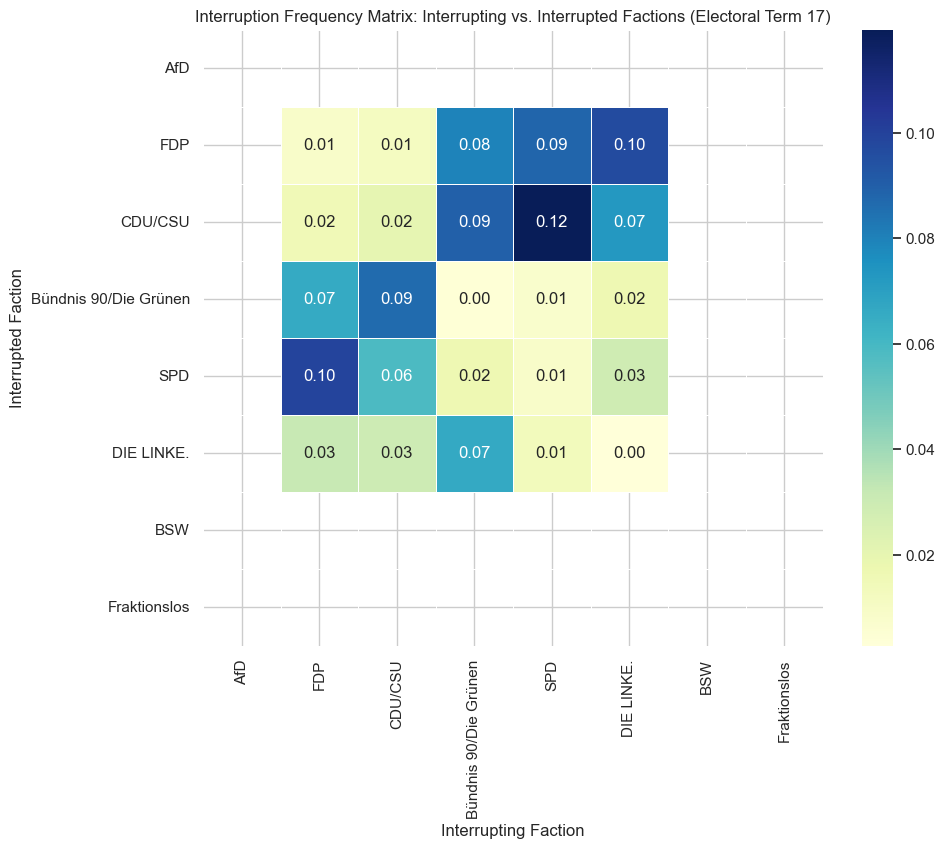

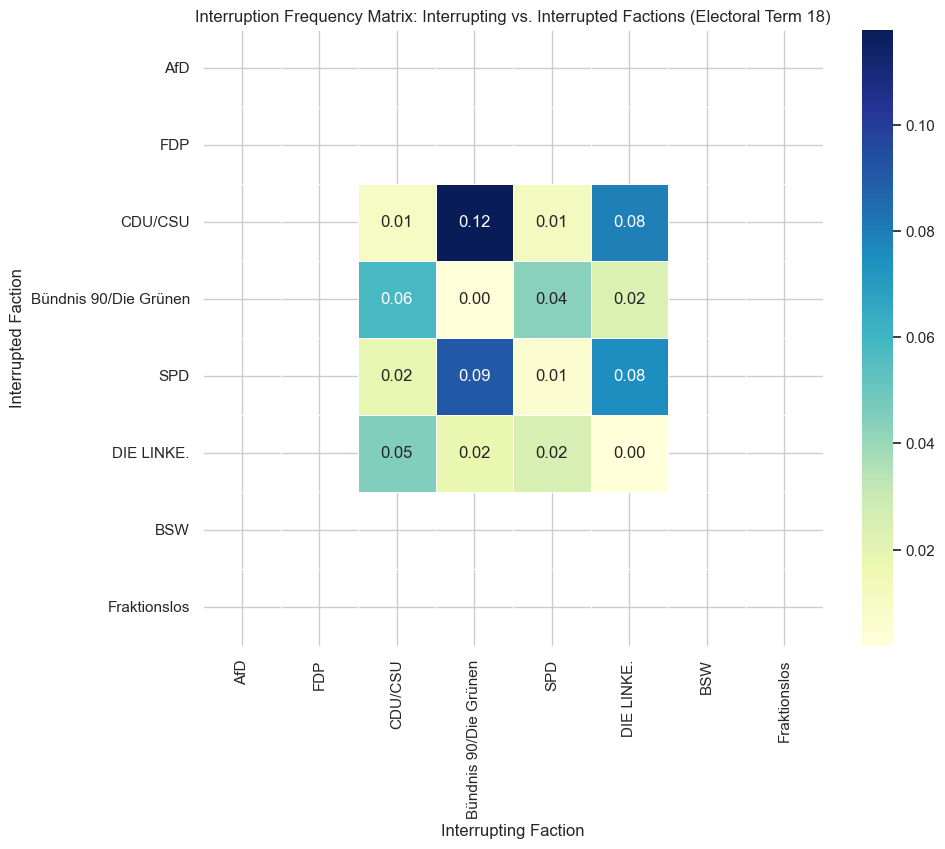

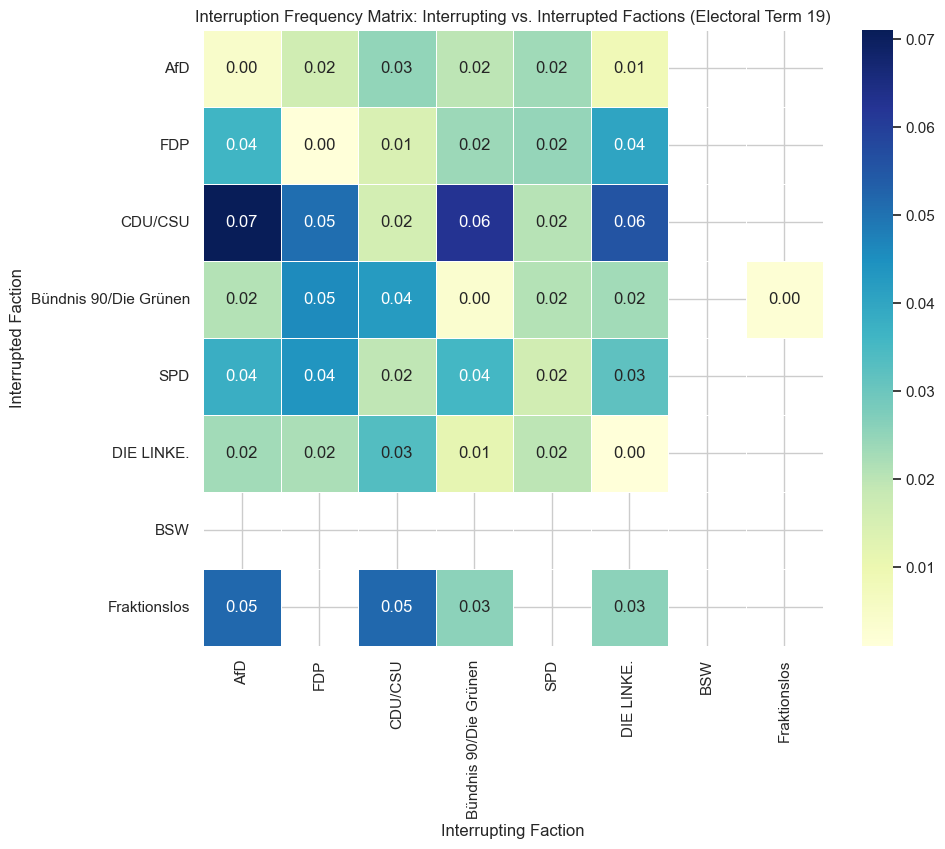

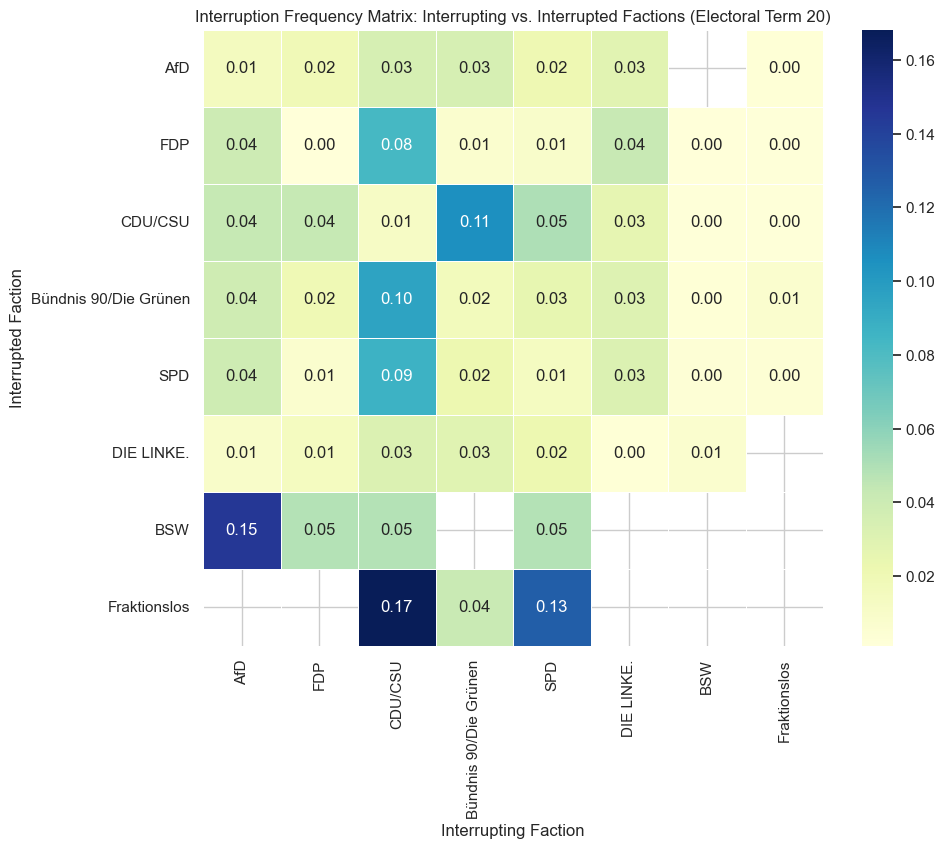

In [ ]:
# Step 1: Calculate the total number of reactions from each interrupting faction towards each interrupted faction, grouped by electoral term
interruption_counts = comments_with_speech_length.groupby(['electoral_term', 'interrupting_faction', 'interrupted_faction']).size().reset_index(name='total_reactions')

# Step 2: Calculate the total speaking time for each interrupted faction in each electoral term
total_speaking_time = speech_length_df.groupby(['electoral_term', 'interrupted_faction'])['speech_length_faction'].sum().reset_index()
total_speaking_time.rename(columns={'speech_length_faction': 'total_speaking_time'}, inplace=True)

# Step 3: Merge the total reactions with the total speaking time of each interrupted faction in each electoral term
interruption_matrix = interruption_counts.merge(total_speaking_time, on=['electoral_term', 'interrupted_faction'])

# Step 4: Calculate the interruption frequency
interruption_matrix['interruption_frequency'] = (interruption_matrix['total_reactions'] / interruption_matrix['total_speaking_time']) * NORMALIZATION_FACTOR

# Step 5: Pivot the data to create a matrix format per electoral term and plot each matrix
for term in interruption_matrix['electoral_term'].unique():
    term_data = interruption_matrix[interruption_matrix['electoral_term'] == term]
    interruption_matrix_pivot = term_data.pivot(index='interrupted_faction', columns='interrupting_faction', values='interruption_frequency')

    # Reindex to enforce faction order for both rows and columns
    interruption_matrix_pivot = interruption_matrix_pivot.reindex(index=faction_order, columns=faction_order)

    # Plot the matrix as a heatmap for the current electoral term
    plt.figure(figsize=(10, 8))
    sns.heatmap(interruption_matrix_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(f"Interruption Frequency Matrix: Interrupting vs. Interrupted Factions (Electoral Term {term})")
    plt.xlabel("Interrupting Faction")
    plt.ylabel("Interrupted Faction")
    plt.show()

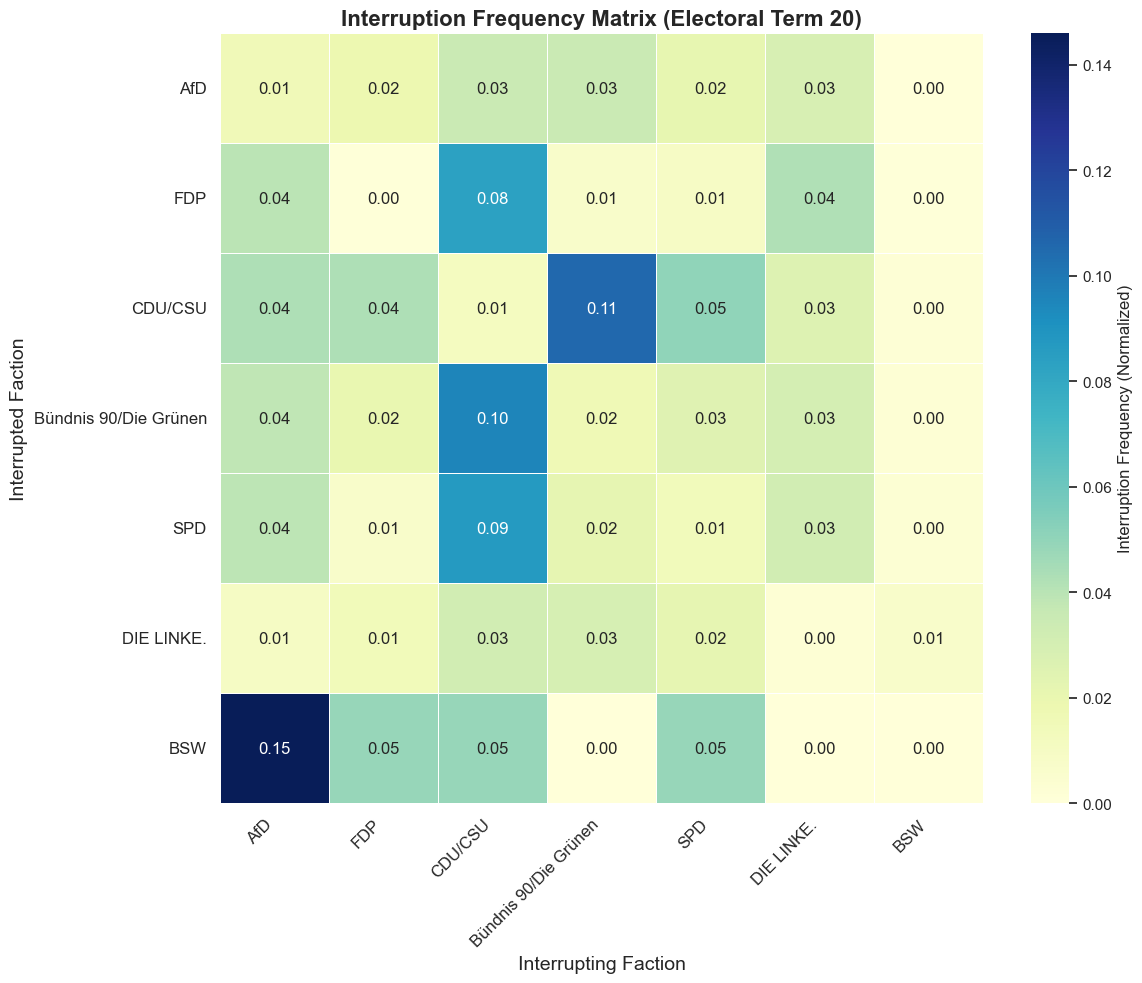

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for electoral term 20
term_20_data_interruption = interruption_matrix[(interruption_matrix['electoral_term'] == 20)&(interruption_matrix['interrupted_faction']!='Fraktionslos')&(interruption_matrix['interrupting_faction']!='Fraktionslos')]

# Create the pivot table for electoral term 20
interruption_matrix_pivot = term_20_data_interruption.pivot(
    index='interrupted_faction', 
    columns='interrupting_faction', 
    values='interruption_frequency'
)

interruption_matrix_pivot = interruption_matrix_pivot.fillna(0)

# Reindex to enforce faction order for both rows and columns
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'BSW']
interruption_matrix_pivot = interruption_matrix_pivot.reindex(
    index=faction_order, 
    columns=faction_order
)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")  # Apply a clean seaborn style

# Create the heatmap with better color contrast and formatting
sns.heatmap(
    interruption_matrix_pivot, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    linewidths=.5,
    cbar_kws={'label': 'Interruption Frequency (Normalized)'}
)

# Add titles and axis labels
plt.title("Interruption Frequency Matrix (Electoral Term 20)", fontsize=16, weight='bold')
plt.xlabel("Interrupting Faction", fontsize=14)
plt.ylabel("Interrupted Faction", fontsize=14)

# Adjust tick labels for readability
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

# Optimize layout for presentation
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('interruption_frequency_matrix.png', format='png', dpi=300)

# Show the plot
plt.show()


### 4.4 Interruptions over time electoral term 20 - governing factions

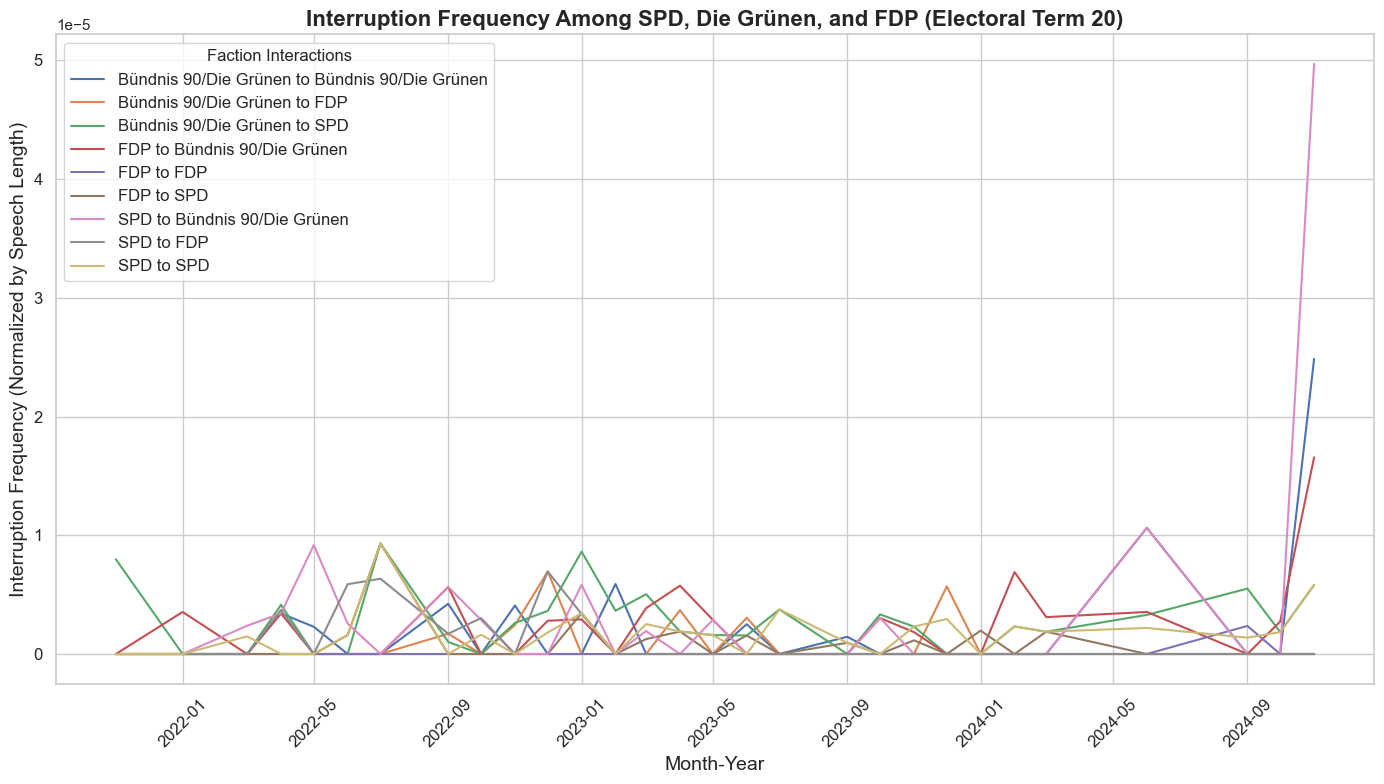

In [ ]:
# Filter data for term 20
term_20_data = comments_with_speech_length[comments_with_speech_length['electoral_term'] == 20]

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
term_20_data_filtered = term_20_data[
    (term_20_data['interrupting_faction'].isin(factions_of_interest)) &
    (term_20_data['interrupted_faction'].isin(factions_of_interest))
]


# Step 1: Calculate total interruptions by month and faction
interruption_counts = term_20_data_filtered.groupby(
    ['month_year', 'interrupting_faction', 'interrupted_faction']
).size().reset_index(name='total_reactions')

# Step 2: Calculate total speaking time by month and faction
speech_length_by_month = (
    speech_length_df[speech_length_df['electoral_term'] == 20]
    .groupby(['month_year', 'interrupted_faction'])['speech_length_faction']
    .sum()
    .reset_index()
    .rename(columns={'speech_length_faction': 'total_speaking_time'})
)

# Step 3: Merge interruption counts with total speaking time
interruption_with_speech_length = interruption_counts.merge(
    speech_length_by_month,
    on=['month_year', 'interrupted_faction'],
    how='left'
)

# Step 4: Calculate interruption frequency
interruption_with_speech_length['interruption_frequency'] = (
    interruption_with_speech_length['total_reactions'] / interruption_with_speech_length['total_speaking_time']
)

interruption_with_speech_length['month_year'] = interruption_with_speech_length['month_year'].dt.to_timestamp()
# Pivot data for plotting
pivoted_data = interruption_with_speech_length.pivot_table(
    index='month_year',
    columns=['interrupting_faction', 'interrupted_faction'],
    values='interruption_frequency',
    fill_value=0
)

# Flatten the multi-index columns for easy plotting
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'month_year'
    sns.lineplot(data=pivoted_data, x='month_year', y=column, label=column)

# Customize the chart
plt.title('Interruption Frequency Among SPD, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Interruption Frequency (Normalized by Speech Length)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Interactions', fontsize=12, loc='upper left')
plt.tight_layout()

# save plot

# Show the chart
plt.show()

In [ ]:
# Ensure the 'date' column is in datetime format
comments_df['date'] = pd.to_datetime(comments_df['date'])
year_24_data = comments_df[comments_df['date'].dt.year == 2024]
year_24_data['week_year'] = year_24_data['date'].dt.to_period('W').dt.to_timestamp()  # Convert to timestamp for plotting

# Rename columns
year_24_data.rename(columns={'speech_politician_faction': 'interrupting_faction', 'faction': 'interrupted_faction'}, inplace=True)

# Define factions of interest and filter data
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']
year_24_data_filtered = year_24_data[
    (year_24_data['interrupting_faction'].isin(factions_of_interest)) &
    (year_24_data['interrupted_faction'].isin(factions_of_interest)) &
    (year_24_data['interrupting_faction'] != year_24_data['interrupted_faction'])
]

# Calculate total interactions by week and faction pairs
interaction_counts = year_24_data_filtered.groupby(
    ['week_year', 'interrupting_faction', 'interrupted_faction']
).size().reset_index(name='total_interactions')

# Pivot data for easy plotting
pivoted_data = interaction_counts.pivot_table(
    index='week_year',
    columns=['interrupting_faction', 'interrupted_faction'],
    values='total_interactions',
    fill_value=0
)

# Flatten the multi-index columns
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'week_year'
    sns.lineplot(
        data=pivoted_data,
        x='week_year',
        y=column,
        label=column,
        marker='o',
        alpha=0.8
    )

# Customize the chart
plt.title('Weekly Total Interactions Among SPD, Die Grünen, and FDP (Electoral Term 2024)', fontsize=16, weight='bold')
plt.xlabel('Week of the Year', fontsize=14)
plt.ylabel('Total Interactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Interactions', fontsize=12, loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show the plot
plt.savefig('Total_Interactions_Among_Governing_Parties_Electoral_Term_2024.png', format='png', dpi=300)
plt.show()


In [ ]:
interaction_counts

week_year   interrupting_faction    interrupted_faction  \
0  2024-01-15                    SPD                    FDP   
1  2024-02-19  Bündnis 90/Die Grünen                    FDP   
2  2024-02-19                    SPD  Bündnis 90/Die Grünen   
3  2024-03-11                    SPD  Bündnis 90/Die Grünen   
4  2024-03-11                    SPD                    FDP   
5  2024-03-18  Bündnis 90/Die Grünen                    FDP   
6  2024-06-10  Bündnis 90/Die Grünen                    FDP   
7  2024-06-10  Bündnis 90/Die Grünen                    SPD   
8  2024-06-10                    SPD  Bündnis 90/Die Grünen   
9  2024-06-24  Bündnis 90/Die Grünen                    SPD   
10 2024-06-24                    SPD  Bündnis 90/Die Grünen   
11 2024-09-23                    SPD  Bündnis 90/Die Grünen   
12 2024-10-14  Bündnis 90/Die Grünen                    FDP   
13 2024-10-14                    SPD  Bündnis 90/Die Grünen   
14 2024-11-04                    SPD  Bündnis 90/Die Grünen   
15 2024-11-11  Bündnis 90/Die Grünen                    FDP   
16 2024-11-11  Bündnis 90/Die Grünen                    SPD   

    total_interactions  
0                    1  
1                    2  
2                    1  
3                    1  
4                    1  
5                    1  
6                    2  
7                    5  
8                    2  
9                    1  
10                   1  
11                   4  
12                   1  
13                   1  
14                   1  
15                   2  
16                   6

### 4.5 Interruptions - Governing vs. opposition

This section analyzes interruptions between governing and opposition factions by electoral term. Key steps:
1. Assigning each faction as either Governing or Opposition based on electoral term.
2. Calculating reactions and total speaking time for Governing vs. Opposition within each term.
3. Calculating interruption frequency and visualizing these frequencies with heatmaps for each term.


#### 4.5.1 Interruptions - Governing vs. opposition by elecotral term

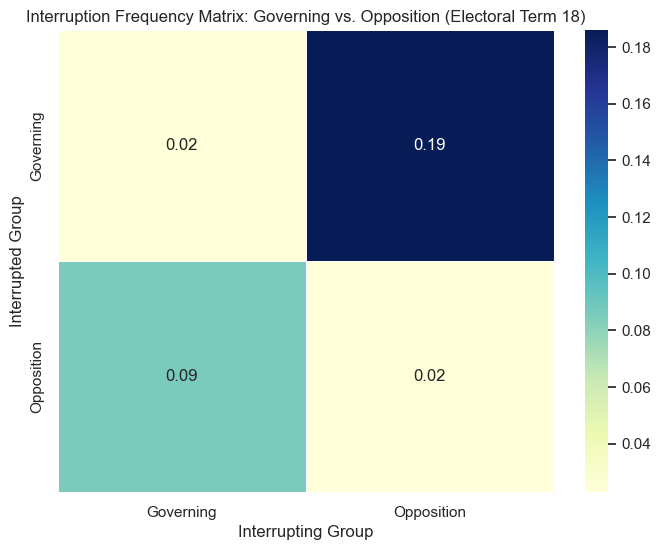

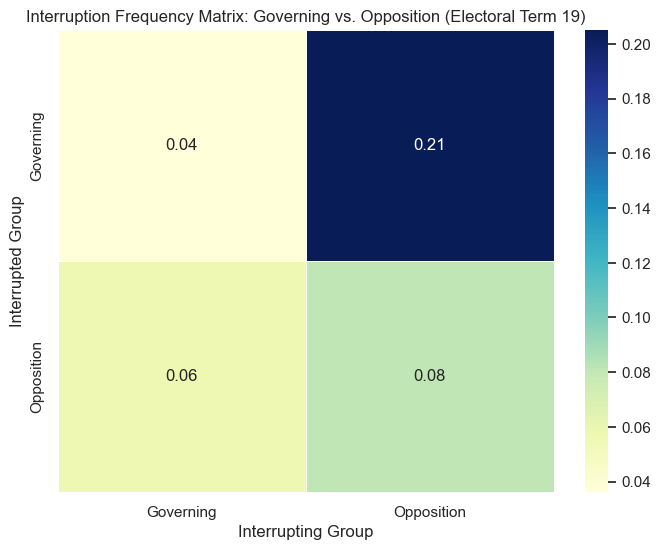

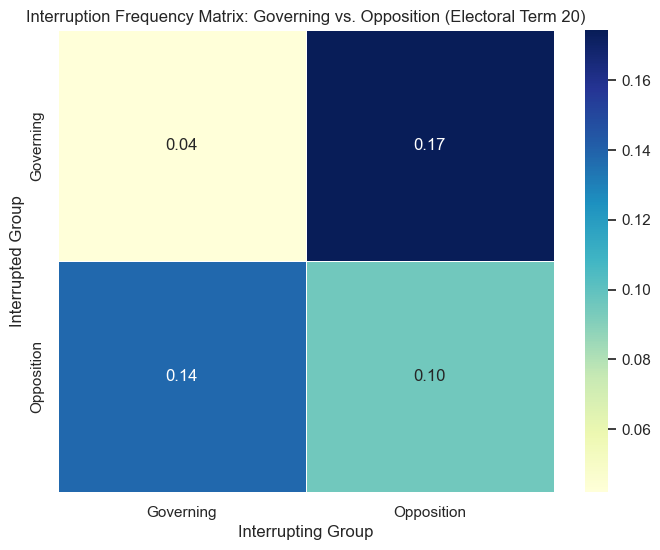

In [ ]:
# Define governing parties for each electoral term
regierung_17 = ['CDU/CSU', 'FDP']
regierung_18 = ['CDU/CSU', 'SPD']
regierung_19 = ['CDU/CSU', 'SPD']
regierung_20 = ['SPD', 'FDP', 'Bündnis 90/Die Grünen']

# Map each electoral term to its governing parties
regierung_mapping = {
    17: regierung_17,
    18: regierung_18,
    19: regierung_19,
    20: regierung_20
}


# Function to label factions as Governing or Opposition based on electoral term
def label_governing_opposition(row, faction_column, term_column, regierung_mapping):
    term = row[term_column]
    if term in regierung_mapping:
        if row[faction_column] in regierung_mapping[term]:
            return 'Governing'
        else:
            return 'Opposition'
    return np.nan  # For rows without a matching electoral term

# Apply the label function to both interrupting and interrupted factions
comments_with_speech_length['interrupting_group'] = comments_with_speech_length.apply(
    lambda row: label_governing_opposition(row, 'interrupting_faction', 'electoral_term', regierung_mapping), axis=1
)
comments_with_speech_length['interrupted_group'] = comments_with_speech_length.apply(
    lambda row: label_governing_opposition(row, 'interrupted_faction', 'electoral_term', regierung_mapping), axis=1
)

# Filter out rows with missing group labels
comments_with_speech_length = comments_with_speech_length.dropna(subset=['interrupting_group', 'interrupted_group'])

# Step 1: Calculate the total number of reactions between Governing and Opposition groups for each electoral term
interruption_counts_group = comments_with_speech_length.groupby(['electoral_term', 'interrupting_group', 'interrupted_group']).size().reset_index(name='total_reactions')

# Step 2: Calculate the total speaking time for each group in each electoral term
# Label factions in `speech_length_df` as Governing or Opposition based on `interrupted_faction`
speech_length_df['group'] = speech_length_df.apply(
    lambda row: label_governing_opposition(row, 'interrupted_faction', 'electoral_term', regierung_mapping), axis=1
)
# Filter out rows with missing group labels
speech_length_df = speech_length_df.dropna(subset=['group'])

# Calculate the total speaking time by group and electoral term
total_speaking_time_group = speech_length_df.groupby(['electoral_term', 'group'])['speech_length_faction'].sum().reset_index()
total_speaking_time_group.rename(columns={'group': 'interrupted_group', 'speech_length_faction': 'total_speaking_time'}, inplace=True)

# Step 3: Merge interruption counts with total speaking time to calculate interruption frequency
interruption_matrix_group = interruption_counts_group.merge(total_speaking_time_group, on=['electoral_term', 'interrupted_group'])

# Step 4: Calculate the interruption frequency
interruption_matrix_group['interruption_frequency'] = (interruption_matrix_group['total_reactions'] / interruption_matrix_group['total_speaking_time']) * NORMALIZATION_FACTOR

# Step 5: Pivot and plot the matrix for each electoral term
for term in interruption_matrix_group['electoral_term'].unique():
    term_data = interruption_matrix_group[interruption_matrix_group['electoral_term'] == term]
    interruption_matrix_pivot = term_data.pivot(index='interrupted_group', columns='interrupting_group', values='interruption_frequency')

    # Plot the matrix as a heatmap for the current electoral term
    plt.figure(figsize=(8, 6))
    sns.heatmap(interruption_matrix_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(f"Interruption Frequency Matrix: Governing vs. Opposition (Electoral Term {term})")
    plt.xlabel("Interrupting Group")
    plt.ylabel("Interrupted Group")
    plt.show()

#### 4.5.2 Interruptions - Governing vs. opposition - time development

This section extends the Governing vs. Opposition analysis by tracking interruption frequency over time, grouped by date. The approach involves:
1. Calculating daily reactions and speaking time for Governing and Opposition groups.
2. Smoothing with a 90-day rolling average, then downsampling to a monthly frequency.
3. Visualizing trends in interruption frequency by date to highlight temporal shifts between Governing and Opposition.


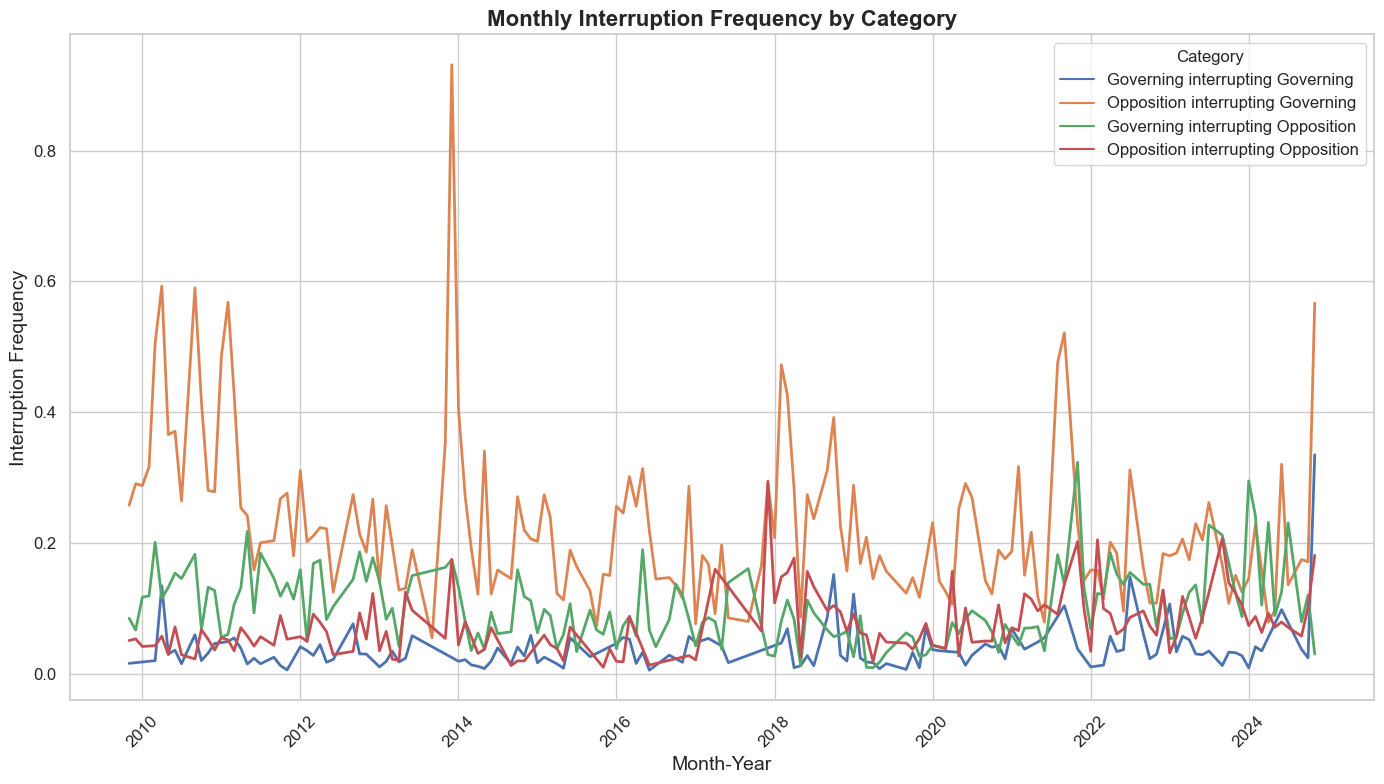

In [ ]:
# Step 1: Add a `month_year` column for monthly aggregation
comments_with_speech_length['month_year'] = comments_with_speech_length['date'].dt.to_period('M')

# Step 2: Group by `month_year`, `interrupting_group`, and `interrupted_group` to calculate the monthly counts
monthly_interruption_counts = comments_with_speech_length.groupby(
    ['month_year', 'interrupting_group', 'interrupted_group']
).size().reset_index(name='total_reactions')

# Step 3: Aggregate total speaking time for each group by `month_year`
monthly_speaking_time = speech_length_df.groupby(
    ['month_year', 'group']
)['speech_length_faction'].sum().reset_index()
monthly_speaking_time.rename(columns={'group': 'interrupted_group', 'speech_length_faction': 'total_speaking_time'}, inplace=True)

# Step 4: Merge interruption counts with speaking time
monthly_interruption_data = monthly_interruption_counts.merge(
    monthly_speaking_time,
    on=['month_year', 'interrupted_group']
)

# Step 5: Calculate interruption frequency for each category
monthly_interruption_data['interruption_frequency'] = (
    monthly_interruption_data['total_reactions'] / monthly_interruption_data['total_speaking_time']
) * NORMALIZATION_FACTOR

# Step 6: Filter the data for clear categories
categories = ['Governing', 'Opposition']
monthly_interruption_data = monthly_interruption_data[
    monthly_interruption_data['interrupting_group'].isin(categories) &
    monthly_interruption_data['interrupted_group'].isin(categories)
]

# Step 7: Create separate dataframes for each of the four categories
monthly_interruption_data['category'] = monthly_interruption_data['interrupting_group'] + ' interrupting ' + monthly_interruption_data['interrupted_group']

monthly_interruption_data['month_year'] = monthly_interruption_data['month_year'].dt.to_timestamp()

# Step 8: Plot the time development for each category
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_interruption_data,
    x='month_year',
    y='interruption_frequency',
    hue='category',
    linewidth=2
)

# Customize the plot
plt.title('Monthly Interruption Frequency by Category', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Interruption Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## 5. Contributions Extended

### 5.1 Data Cleaning

In [ ]:
contributions_extended = contributions_extended_raw.copy()

# change all -1 to nan
contributions_extended = contributions_extended.replace(-1, np.nan)
# show nan of contributions_extended_raw
contributions_extended.isna().sum()

id                     0
type                   0
first_name             0
last_name              0
faction_id         46094
speech_id              0
text_position          0
politician_id    1960618
content                0
dtype: int64

We try to fill the faction ID. Since we only keep the latest faction of the politician, it might not be 100% accurate if the politician changed the faction. However, since it is only for a small number of entries, we think that the mistakes are minimal

In [ ]:
politicians = politicians_raw.copy()
# prop duplicates in ui, keeping the last
politicians = politicians.drop_duplicates(subset=['ui'], keep='last')


# if faction_id is nan, try to fill with faction_id of politician_df
contributions_extended['faction_id'] = contributions_extended['faction_id'].fillna(contributions_extended['politician_id'].map(politicians.set_index('ui')['faction_id']))
contributions_extended.isna().sum()

id                     0
type                   0
first_name             0
last_name              0
faction_id         38980
speech_id              0
text_position          0
politician_id    1960618
content                0
dtype: int64

In [ ]:
factions_raw.head(20)

id           abbreviation  \
0    0                    AfD   
1    2                     BP   
2    4  Bündnis 90/Die Grünen   
3    7             DIE LINKE.   
4    9                 DP/DPB   
5   12                    DRP   
6    6                     DA   
7    8                     DP   
8   11                    DPB   
9    9                 DP/DPB   
10  10                 DP/FVP   
11  12                    DRP   
12  13                 DRP/NR   
13  28                      Z   
14   1                    BHE   
15   4  Bündnis 90/Die Grünen   
16   4  Bündnis 90/Die Grünen   
17  17                    FVP   
18  16                     FU   
19  19                 GB/BHE   

                                         faction_name  
0                Fraktion Alternative für Deutschland  
1                               Fraktion Bayernpartei  
2                      Fraktion BÜNDNIS 90/DIE GRÜNEN  
3                                 Fraktion DIE LINKE.  
4                              Fraktion DP/DPB (Gast)  
5                                 Fraktion DRP (Gast)  
6          Fraktion Demokratische Arbeitsgemeinschaft  
7                            Fraktion Deutsche Partei  
8                     Fraktion Deutsche Partei Bayern  
9     Fraktion Deutsche Partei/Deutsche Partei Bayern  
10         Fraktion Deutsche Partei/Freie Volkspartei  
11                     Fraktion Deutsche Reichspartei  
12    Fraktion Deutsche Reichspartei/Nationale Rechte  
13                  Fraktion Deutsche Zentrums-Partei  
14  Fraktion Deutscher Gemeinschaftsblock der Heim...  
15                                Fraktion Die Grünen  
16                     Fraktion Die Grünen/Bündnis 90  
17                         Fraktion Freie Volkspartei  
18                     Fraktion Föderalistische Union  
19  Fraktion Gesamtdeutscher Block / Block der Hei...

In [ ]:
# Ensure both faction_id in contributions_extended and id in factions_raw are of the same type
contributions_extended['faction_id'] = pd.to_numeric(contributions_extended['faction_id'], errors='coerce')
factions_raw['id'] = pd.to_numeric(factions_raw['id'], errors='coerce')

# Create a mapping dictionary
faction_name_mapping = dict(zip(factions_raw['id'], factions_raw['abbreviation']))

# Map faction_id to faction names
contributions_extended['factions'] = contributions_extended['faction_id'].map(faction_name_mapping)

# Fill unmatched faction IDs with 'Unknown' or any appropriate placeholder
contributions_extended['factions'] = contributions_extended['factions'].fillna('Unknown')

# Verify the result
contributions_extended.sample(20)

id             type     first_name        last_name  faction_id  \
232    359856          Beifall                                        15.0   
1115  2237095  Personen-Einruf       marianne         schieder        25.0   
475   1090308  Personen-Einruf         dieter           thomae        15.0   
446    384268          Beifall                                        25.0   
290    686527          Beifall                                         4.0   
415   1152700          Beifall                                        15.0   
1483  1465382          Beifall                                         5.0   
291   1368188          Beifall                                        15.0   
61    1854925  Personen-Einruf     - johannes            selle         5.0   
759   1006907          Beifall                                        15.0   
624   2177402  Personen-Einruf  - Alexander S              Neu         7.0   
1004  1334077  Personen-Einruf           axel             berg        25.0   
155     49758            Zuruf                                         NaN   
178     14854  Personen-Einruf                       horlacher         5.0   
269   2050323          Beifall                                         5.0   
1090  2842704  Personen-Einruf       wolfgang  strengmann-kuhn         4.0   
226   1611051          Beifall                                        25.0   
148    317766          Beifall                                         5.0   
442    551140  Personen-Einruf                          Zander        25.0   
149   1839695          Beifall                                         4.0   

      speech_id  text_position  politician_id  \
232      266617              2            NaN   
1115    1023593              9     11003838.0   
475      581256              6     11002320.0   
446      304789              0            NaN   
290      447605              3            NaN   
415      633108              8            NaN   
1483     646237              0            NaN   
291      605445              2            NaN   
61       793783              5     11002798.0   
759      547036              4            NaN   
624      802919              0     11004361.0   
1004     596977              0     11003036.0   
155        6253              4            NaN   
178       10308              1     11000957.0   
269      826955              2            NaN   
1090    1103563              2     11003888.0   
226      702266              3            NaN   
148      254446              0            NaN   
442      413701              9     11002581.0   
149      734865              4            NaN   

                                                content               factions  
232                                                                        FDP  
1115                                         Jessas na!                    SPD  
475                               Das ändert sich aber!                    FDP  
446                                                                        SPD  
290                                                      Bündnis 90/Die Grünen  
415                                                                        FDP  
1483                                                                   CDU/CSU  
291                                                                        FDP  
61                                   Die sind schon da!                CDU/CSU  
759                                                                        FDP  
624   Es waren noch mehr! Weiterer Zuruf von der LIN...             DIE LINKE.  
1004                              Und zwar langfristig!                    SPD  
155                                               Mitte                Unknown  
178   „Bundeskanzler der Konzerne" ist eine Unversch...                CDU/CSU  
269                                                                    CDU/CSU  
1090                                        So

In [ ]:
# if first_name, last_name, faction_id and politician_id is empty, put "all" in factions
contributions_extended.loc[(contributions_extended['first_name'].isna()) & (contributions_extended['last_name'].isna()) & 
                           (contributions_extended['faction_id'].isna()) & (contributions_extended['politician_id'].isna()), 'factions'] = 'all'

contributions_extended

id             type first_name last_name  faction_id  speech_id  \
0          0           Lachen                              NaN       4545   
1          1  Personen-Einruf               hütter        15.0       4545   
0          2            Zuruf                             22.0        494   
1          3            Zuruf                              NaN        496   
2          4  Personen-Einruf              blücher        15.0        497   
..       ...              ...        ...       ...         ...        ...   
693  2885735           Lachen      silke   launert         5.0    1094075   
694  2885736          Beifall                             25.0    1094075   
695  2885737          Beifall                             15.0    1094075   
696  2885738          Beifall                              4.0    1094075   
697  2885739  Personen-Einruf   dorothee       bär         5.0    1094075   

     text_position  politician_id  \
0                7            NaN   
1                2     11000979.0   
0                3            NaN   
1                0            NaN   
2                0     11000202.0   
..             ...            ...   
693             24     11004336.0   
694             25            NaN   
695             25            NaN   
696             25            NaN   
697             25     11003586.0   

                                               content               factions  
0                                                links                Unknown  
1                                                Nein!                    FDP  
0                                                § 51!                    KPD  
1                                                links                Unknown  
2                                              Jawohl!                    FDP  
..                                                 ...                    ...  
693                                                                   CDU/CSU  
694                                                                       SPD  
695                                                                       FDP  
696                                                     Bündnis 90/Die Grünen  
697  Basta! Basta! Basta! Das hat jetzt alle da dra...                CDU/CSU  

[2885740 rows x 10 columns]

In [ ]:
# show unique reaction type and their percentage
reaction_type_count = contributions_extended['type'].value_counts(normalize=True) * 100
reaction_type_count

Beifall            58.842169
Personen-Einruf    28.227041
Zuruf               8.564250
Zustimmung          1.734598
Lachen              1.139326
Heiterkeit          0.768746
Widerspruch         0.711152
Unruhe              0.012718
Name: type, dtype: float64

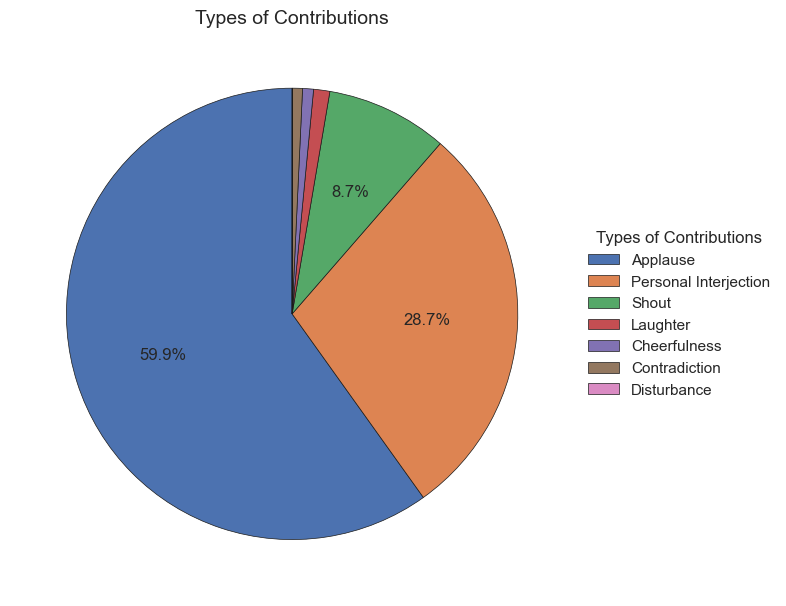

In [ ]:
# Apply a seaborn style
sns.set_theme(style="whitegrid")

# Create a dictionary to map original labels to English labels
label_mapping = {
    'Beifall': 'Applause',
    'Personen-Einruf': 'Personal Interjection',
    'Zuruf': 'Shout',
    'Lachen': 'Laughter',
    'Heiterkeit': 'Cheerfulness',
    'Widerspruch': 'Contradiction',
    'Unruhe': 'Disturbance'
}

# Rename the types
contributions_extended['type'] = contributions_extended['type'].map(label_mapping)

# Data for the pie chart
data = contributions_extended['type'].value_counts()
labels = data.index
sizes = data.values

# Define a function to control which slices display percentages
def autopct_func(pct, all_labels):
    """Show percentages only for selected labels."""
    # Calculate the index based on the cumulative percentages
    total = sum(sizes)
    absolute = int(round(pct * total / 100.0))
    corresponding_label = all_labels[list(sizes).index(absolute)]
    if corresponding_label in ['Applause', 'Personal Interjection', 'Shout']:
        return f'{pct:.1f}%'
    else:
        return ''

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Remove default labels
    autopct=lambda pct: autopct_func(pct, labels),
    startangle=90,
    wedgeprops=dict(edgecolor='k', linewidth=0.5)
)

# Add a legend on the side with colors matching the pie chart
ax.legend(
    wedges,
    labels,
    title="Types of Contributions",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Position the legend outside the plot
    frameon=False
)

# Adjust font size for percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)

# Adjust layout
plt.title('Types of Contributions', fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('types_of_contributions.png', format='png', dpi=300)

plt.show()


### 5.2 Dataset preparation

In [ ]:
# merge contributions_df on content_subset_with_classification based on speech_id
contributions_extended = contributions_extended.rename(columns={'politician_id': 'reacting_politician_id'}) 
content_subset_with_classification_contribution_extended = content_subset_with_classification.merge(
    contributions_extended[['speech_id', 'type', 'factions', 'reacting_politician_id']],
    left_on='id',
    right_on='speech_id',
    how='left'
)

# rename type in reaction type and factions in reacting faction
content_subset_with_classification_contribution_extended = content_subset_with_classification_contribution_extended.rename(columns={'type': 'reaction_type', 'factions': 'reacting_faction'})
content_subset_with_classification_contribution_extended

id  electoral_term  session first_name  \
0         729470              17        1      heinz   
1         729470              17        1      heinz   
2         729471              17        1     volker   
3         729471              17        1     volker   
4         729471              17        1     volker   
...          ...             ...      ...        ...   
1237195  1094075              20      201       dirk   
1237196  1094075              20      201       dirk   
1237197  1094075              20      201       dirk   
1237198  1094075              20      201       dirk   
1237199  1094075              20      201       dirk   

                                              document_url    last_name  \
0        https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
1        https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
2        https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
3        https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
4        https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
...                                                    ...          ...   
1237195  https://dip21.bundestag.de/dip21/btp/20/20201.pdf   heidenblut   
1237196  https://dip21.bundestag.de/dip21/btp/20/20201.pdf   heidenblut   
1237197  https://dip21.bundestag.de/dip21/btp/20/20201.pdf   heidenblut   
1237198  https://dip21.bundestag.de/dip21/btp/20/20201.pdf   heidenblut   
1237199  https://dip21.bundestag.de/dip21/btp/20/20201.pdf   heidenblut   

         faction_id           position_short    position_long  politician_id  \
0                 5  Presidium of Parliament  alterspräsident       11001849   
1                 5  Presidium of Parliament  alterspräsident       11001849   
2                 5     Member of Parliament                        11001074   
3                 5     Member of Parliament                        11001074   
4                 5     Member of Parliament                        11001074   
...             ...                      ...              ...            ...   
1237195          25     Member of Parliament                        11004295   
1237196          25     Member of Parliament                        11004295   
1237197          25     Member of Parliament                        11004295   
1237198          25     Member of Parliament                        11004295   
1237199          25     Member of Parliament                        11004295   

         ... City Classification content_category entry_classification  \
0        ...          Large City   Organizational             Guidance   
1        ...          Large City   Organizational             Guidance   
2        ...                       Organizational                Other   
3        ...                       Organizational                Other   
4        ...                       Organizational                Other   
...      ...                 ...              ...                  ...   
1237195  ...          Large City           Debate               Speech   
1237196  ...          Large City           Debate               Speech   
1237197  ...          Large City           Debate               Speech   
1237198  ...          Large City           Debate               Speech   
1237199  ...          Large City           Debate               Speech   

        speech_politician speech_politician_faction  month_year  speech_id  \
0                     NaN                       NaN     2009-10   729470.0   
1                     NaN                       NaN     2009-10   729470.0   
2                     NaN                       NaN     2009-10   729471.0   
3                     NaN                       NaN     2009-10   729471.0   
4                     NaN                       NaN     2009-10   729471.0   
...                   ...                       ...         ...        ...   
1237195        11004295.0                   

In [ ]:
#filter out all position_short presidium of parliament
content_subset_with_classification_contribution_extended = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['position_short'] != 'Presidium of Parliament']

In [ ]:
content_subset_with_classification_contribution_extended.columns

Index(['id', 'electoral_term', 'session', 'first_name', 'document_url',
       'last_name', 'faction_id', 'position_short', 'position_long',
       'politician_id', 'top_item', 'top_title', 'speech_content', 'date',
       'faction', 'year', 'speech_length', 'age', 'gender', 'tenure', 'topic',
       'main_category', 'sub_category', 'Stadt', 'Former Country',
       'City Classification', 'content_category', 'entry_classification',
       'speech_politician', 'speech_politician_faction', 'month_year',
       'speech_id', 'reaction_type', 'reacting_faction',
       'reacting_politician_id'],
      dtype='object')

In [ ]:
# 
bsw_politician_ids = [
    11004837, 11004183, 11004911, 11004060, 
    11004823, 11003858, 11005007, 11005127, 
    11003746, 11003753
]

# Convert 'speech_id' to numeric and check for speeches with speech_id greater than 1107218 and politician_id in the BSW list
content_subset_with_classification_contribution_extended['reacting_politician_id'] = pd.to_numeric(content_subset_with_classification_contribution_extended['reacting_politician_id'], errors='coerce').astype('Int64')

# Impute BSW as the faction for these speeches
content_subset_with_classification_contribution_extended.loc[
    (content_subset_with_classification_contribution_extended['date'] >= '2024-02-02') & 
    (content_subset_with_classification_contribution_extended['reacting_politician_id'].isin(bsw_politician_ids)), 
    'reacting_faction'
] = 'BSW'


# Verify the changes
content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['reacting_faction']=='BSW']


id  electoral_term  session first_name  \
1145133  1112217              20      153      sahra   
1146515  1112499              20      154     gregor   
1146896  1112564              20      154   roderich   
1148474  1112862              20      154    susanne   
1148476  1112864              20      154    susanne   
...          ...             ...      ...        ...   
1228497  1081041              20      194  alexander   
1228501  1081043              20      194  alexander   
1230477  1086324              20      195      klaus   
1232063  1113265              20      196    kathrin   
1232084  1113275              20      196    stephan   

                                              document_url    last_name  \
1145133  https://dip21.bundestag.de/dip21/btp/20/20153.pdf  wagenknecht   
1146515  https://dip21.bundestag.de/dip21/btp/20/20154.pdf         gysi   
1146896  https://dip21.bundestag.de/dip21/btp/20/20154.pdf  kiesewetter   
1148474  https://dip21.bundestag.de/dip21/btp/20/20154.pdf      ferschl   
1148476  https://dip21.bundestag.de/dip21/btp/20/20154.pdf      ferschl   
...                                                    ...          ...   
1228497  https://dip21.bundestag.de/dip21/btp/20/20194.pdf       ulrich   
1228501  https://dip21.bundestag.de/dip21/btp/20/20194.pdf       ulrich   
1230477  https://dip21.bundestag.de/dip21/btp/20/20195.pdf        ernst   
1232063  https://dip21.bundestag.de/dip21/btp/20/20196.pdf       vogler   
1232084  https://dip21.bundestag.de/dip21/btp/20/20196.pdf    pilsinger   

         faction_id        position_short position_long  politician_id  ...  \
1145133           3  Member of Parliament                     11004183  ...   
1146515           7  Member of Parliament                     11000756  ...   
1146896           5  Member of Parliament                     11004068  ...   
1148474           7  Member of Parliament                     11004715  ...   
1148476           7  Member of Parliament                     11004715  ...   
...             ...                   ...           ...            ...  ...   
1228497           3  Member of Parliament                     11003858  ...   
1228501           3  Member of Parliament                     11003858  ...   
1230477           3  Member of Parliament                     11003753  ...   
1232063           7  Member of Parliament                     11004181  ...   
1232084           5  Member of Parliament                     11004853  ...   

        City Classification content_category entry_classification  \
1145133          Large City           Debate               Speech   
1146515          Large City           Debate               Speech   
1146896          Small City           Debate               Speech   
1148474                               Debate  Question or Comment   
1148476                               Debate  Question or Comment   
...                     ...              ...                  ...   
1228497                               Debate               Speech   
1228501                               Debate               Speech   
1230477          Large City   Organizational               Speech   
1232063          Large City            Other  Question or Comment   
1232084          Large City            Other               Speech   

        speech_politician speech_politician_faction  month_year  speech_id  \
1145133        11004183.0                       BSW     2024-02  1112217.0   
1146515        11000756.0                DIE LINKE.     2024-02  1112499.0   
1146896        11004068.0                   CDU/CSU     2024-02  1112564.0   
1148474        11005049.0                       SPD     2024-02  1112862.0   
1148476        11005049.0                       SPD     2024-02  1112864.0   
...                   ...                       ...         ...        ...   
1228497        11003858.0                       BSW     2024-10  1081041.0   
1228501        11003858.0             

### 5.3 Reaction Matrices

In [ ]:
term_20_data = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['electoral_term'] == 20]

#Get the unique reaction types in the data
reaction_types = term_20_data['reaction_type'].unique()

# Dictionary to hold the count matrix for each reaction type
reaction_matrices_2 = {}

# Loop over each reaction type to create separate matrices
for reaction in reaction_types:
    # Filter for the specific reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction]

    # Create a pivot table counting how often each faction (in rows) reacted toward each other faction (in columns)
    reaction_matrix = reaction_data.pivot_table(
        index='faction',  # Assuming 'faction_id' identifies the faction doing the reaction
        columns='reacting_faction',  # The faction being reacted to
        values='reaction_type',  # The reaction type we're counting
        aggfunc='size',  # Count occurrences
        fill_value=0  # Fill NaN with 0 for counts
    )

    # Store the matrix in the dictionary with the reaction type as the key
    reaction_matrices_2[reaction] = reaction_matrix

# Display matrices for each reaction type
for reaction, matrix in reaction_matrices_2.items():
    print(f"Reaction Type: {reaction}")
    display(matrix)  # Using display to show each matrix clearly


Reaction Type: nan


Empty DataFrame
Columns: []
Index: []

Reaction Type: Applause


reacting_faction         AfD  BSW  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  \
faction                                                                         
                         749    2                   2970     1818         534   
AfD                    11203    0                     24       11           4   
BSW                       43   10                     16       17          90   
Bündnis 90/Die Grünen     75    1                  18133     1114         989   
CDU/CSU                 2105    2                   2383    22805         610   
DIE LINKE.               229   23                   1100      337        6517   
FDP                      224    1                   9878     2047         479   
Fraktionslos             120    0                    160       33          80   
SPD                      168    6                  20475     1558        1577   

reacting_faction       DP    FDP  Fraktionslos  Gast    SPD  Unknown  
faction                                                               
                        0   2393            39     0   3142        4  
AfD                     0     11           789     0     20        0  
BSW                     0      2            26     0     10        2  
Bündnis 90/Die Grünen   1  11771            53     0  15305       12  
CDU/CSU                 0   2697           269     0   2378        5  
DIE LINKE.              0    312           309     0   1159        9  
FDP                     0  12954            31     1   9763        2  
Fraktionslos            0    110            56     0    163        2  
SPD                     0  15216           116     0  23959        6

Reaction Type: Personal Interjection


reacting_faction        AfD  BSW  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  \
faction                                                                        
                        978    0                    802     1598         110   
AfD                     996    0                   3593     1225         441   
BSW                      68    2                    124       91           0   
Bündnis 90/Die Grünen  4752    5                    729     7785         283   
CDU/CSU                3050    3                   7289     3477         688   
DIE LINKE.             1129    0                    539     1224         341   
FDP                    2686    0                    451     5541         479   
Fraktionslos             23    0                    105       56          12   
SPD                    6767    1                    683    10548         474   

reacting_faction        FDP  Fraktionslos   SPD  Unknown  
faction                                                   
                        296             0   586        1  
AfD                    1153             8  3299        2  
BSW                      51             1    99        2  
Bündnis 90/Die Grünen   283             8   383        4  
CDU/CSU                3507             1  5671        1  
DIE LINKE.              779             6   504       36  
FDP                     511             2   426        3  
Fraktionslos             27             7    68        1  
SPD                     513             6   905        4

Reaction Type: Shout


reacting_faction        AfD  BSW  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  \
faction                                                                        
                        314    0                    184      280          34   
AfD                     164    0                   1122      264         167   
BSW                      13    0                     38       32           0   
Bündnis 90/Die Grünen  1487    3                    105     1310         118   
CDU/CSU                 889    1                   2096      446         260   
DIE LINKE.              338    0                    159      216          65   
FDP                     849    3                     89     1000         172   
Fraktionslos              7    0                     42       10           5   
SPD                    2130    2                     89     1834         179   

reacting_faction       DP  FDP  Fraktionslos   SPD  Unknown  
faction                                                      
                        0   59             0   186        7  
AfD                     1  303             7  1324       60  
BSW                     0   18             0    33        2  
Bündnis 90/Die Grünen   0   48             5    99       24  
CDU/CSU                 1  697             1  2090       47  
DIE LINKE.              1  157             0   164       16  
FDP                     0   56             4   112       17  
Fraktionslos            0    6             1    51        6  
SPD                     0   50             5   217       24

Reaction Type: Laughter


reacting_faction       AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  DP  \
faction                                                                      
                        37                     29       46           3   0   
AfD                      7                    300       89          28   0   
BSW                      1                      1        3           0   0   
Bündnis 90/Die Grünen  263                      2      234           2   0   
CDU/CSU                 94                    239       10          11   0   
DIE LINKE.              50                      6       42           2   1   
FDP                    125                      4      163          11   0   
Fraktionslos             0                     14        9           0   0   
SPD                    377                      5      351           9   0   

reacting_faction       FDP  Fraktionslos  SPD  
faction                                        
                         8             0   31  
AfD                    104             0  318  
BSW                      1             0    3  
Bündnis 90/Die Grünen    4             0    3  
CDU/CSU                124             1  292  
DIE LINKE.              21             0    6  
FDP                      2             0    7  
Fraktionslos             7             0   14  
SPD                      7             0    6

Reaction Type: Contradiction


reacting_faction       AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  FDP  \
faction                                                                       
                         7                     10       24           2    2   
AfD                      0                    144       30          13   42   
BSW                      0                      2        3           0    0   
Bündnis 90/Die Grünen   44                      0       88           6    0   
CDU/CSU                 22                    205        2          23   63   
DIE LINKE.               6                     13       20           0   15   
FDP                     29                      0       47           6    0   
Fraktionslos             0                      7        0           1    0   
SPD                     70                      2      116           9    3   

reacting_faction       Fraktionslos  SPD  Unknown  
faction                                            
                                  0   15        0  
AfD                               0  152        1  
BSW                               0    3        0  
Bündnis 90/Die Grünen             0    0        0  
CDU/CSU                           0  257        0  
DIE LINKE.                        0   21        0  
FDP                               2    6        0  
Fraktionslos                      0    8        0  
SPD                               0    2        0

Reaction Type: Cheerfulness


reacting_faction       AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  FDP  \
faction                                                                       
                         7                     18       22           0   14   
AfD                    111                     14        9           2    6   
BSW                      1                      0        2           0    0   
Bündnis 90/Die Grünen    8                    130       33           4   51   
CDU/CSU                 42                     58      280           6   62   
DIE LINKE.              17                     29       53          31   22   
FDP                      7                     87       46           7  106   
Fraktionslos             1                      1        3           1    1   
SPD                     19                    131       67           5  102   

reacting_faction       SPD  
faction                     
                        19  
AfD                      9  
BSW                      0  
Bündnis 90/Die Grünen   84  
CDU/CSU                 73  
DIE LINKE.              27  
FDP                     87  
Fraktionslos             1  
SPD                    218

No data available for reaction type: nan


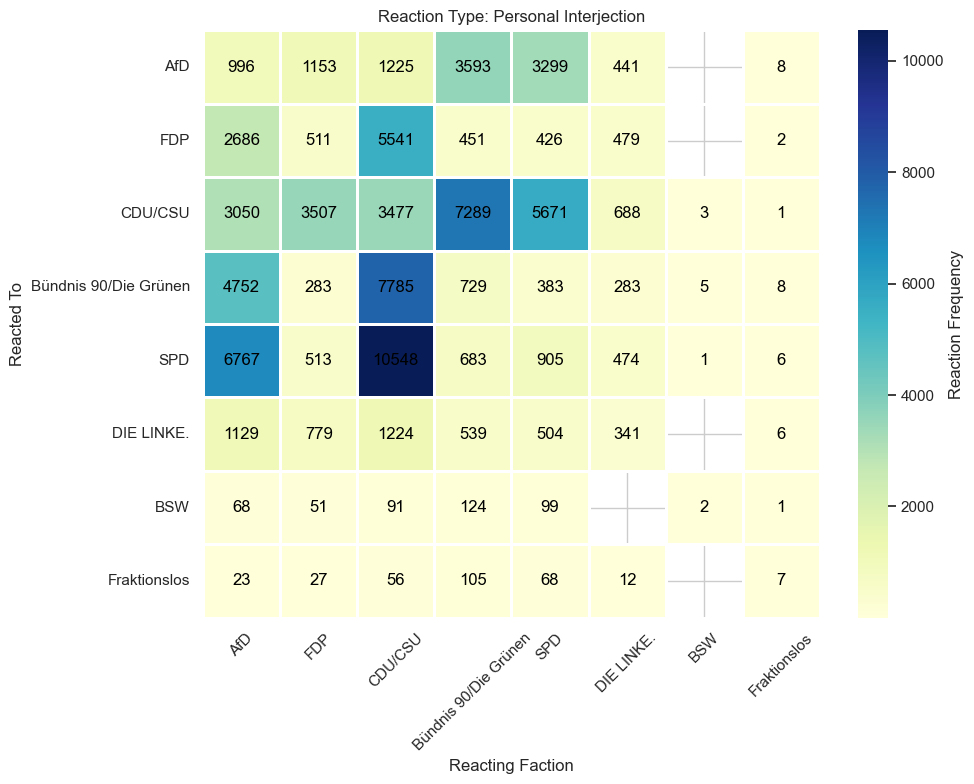

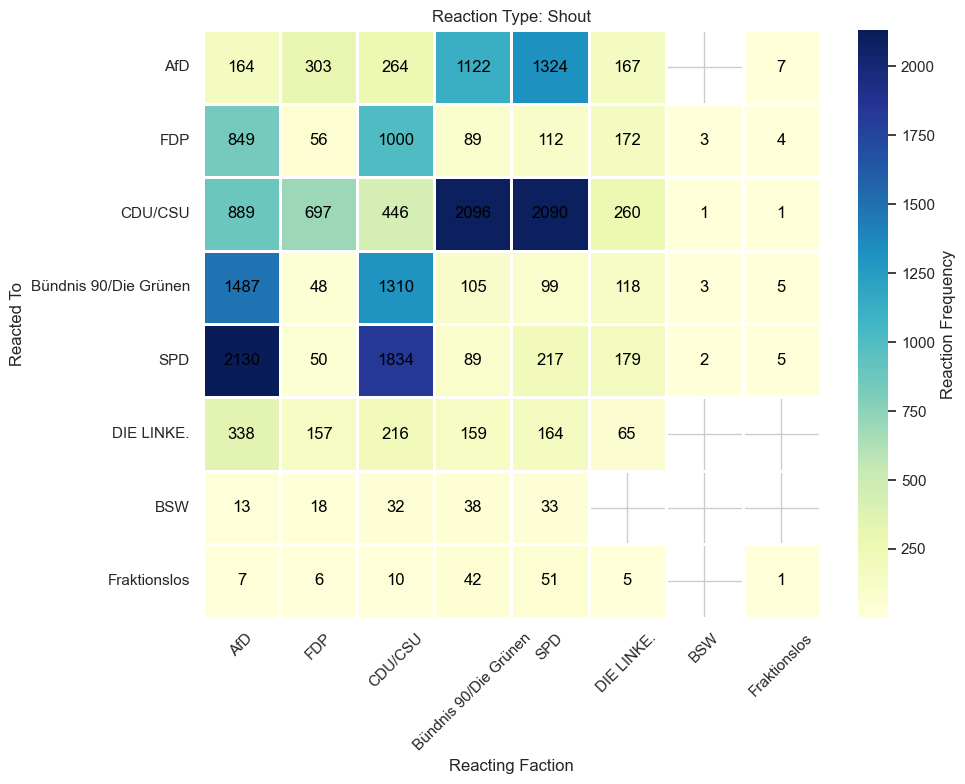

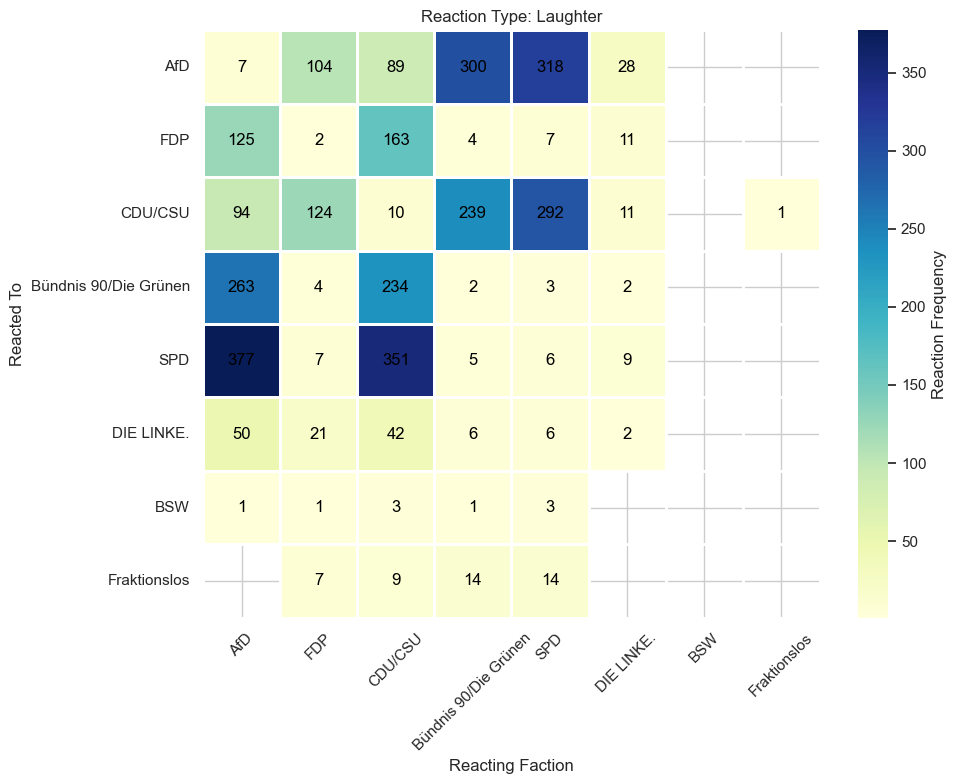

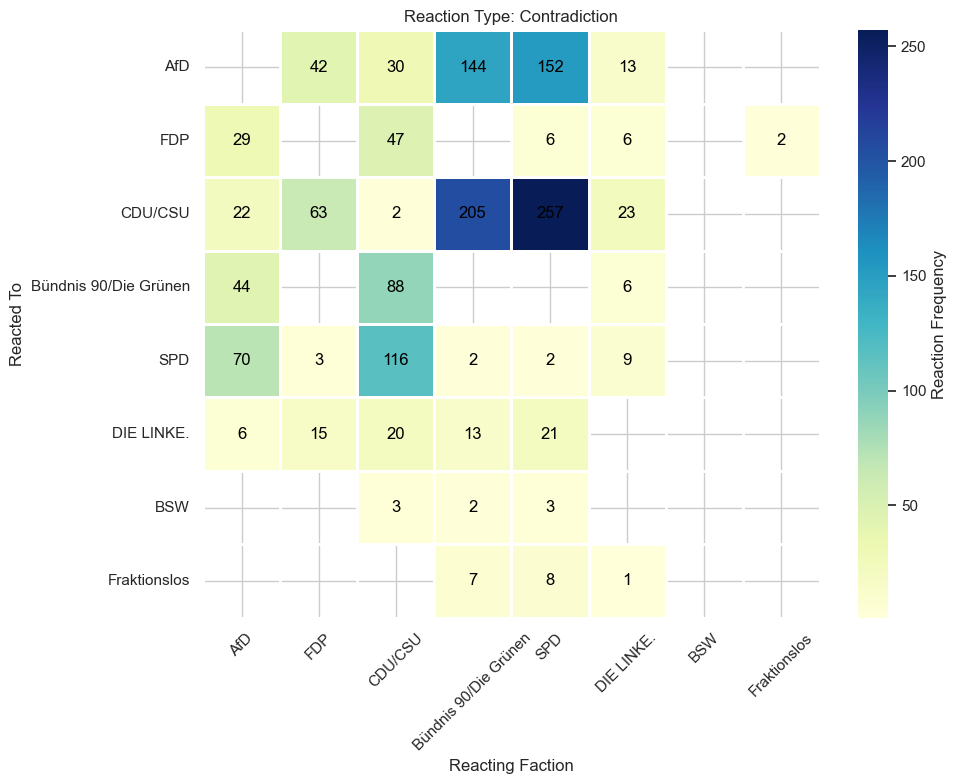

In [ ]:
# Set up the plotting style for clarity
sns.set(style="whitegrid")

# Define the faction order
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'BSW','Fraktionslos']

# Loop through each reaction matrix and plot it as a heatmap
for reaction, matrix in reaction_matrices_2.items():
    # Check if the matrix is non-empty before plotting
    if not matrix.empty:
        # Reindex to ensure the correct order of rows and columns
        matrix = matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
        
        # Create a mask for cells with zero values
        mask = matrix == 0

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            matrix, 
            annot=True, 
            cmap="YlGnBu", 
            fmt="d", 
            linewidths=1,       # Adjusts the thickness of the box around cells
            linecolor='white',  # Sets box color around each cell
            cbar_kws={'label': 'Reaction Frequency'}, 
            mask=mask,  # Apply the mask to hide zeros
            annot_kws={"color": "black"}  # Set annotation color for non-zero values
        )
        plt.title(f"Reaction Type: {reaction}")
        plt.xlabel("Reacting Faction")
        plt.ylabel("Reacted To")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(f'reaction_type_{reaction}_20_matrix.png', format='png', dpi=300)
        plt.show()
    else:
        print(f"No data available for reaction type: {reaction}")


#### 7.3.1 Closer Analysis - Reactions given vs. reactins received per party

Data loaded: 232861 rows
Reaction types found: [nan 'Applause' 'Personal Interjection' 'Shout' 'Laughter' 'Contradiction'
 'Cheerfulness']
Processing reaction type: nan
No data available for reaction type: nan. Skipping...
Processing reaction type: Applause


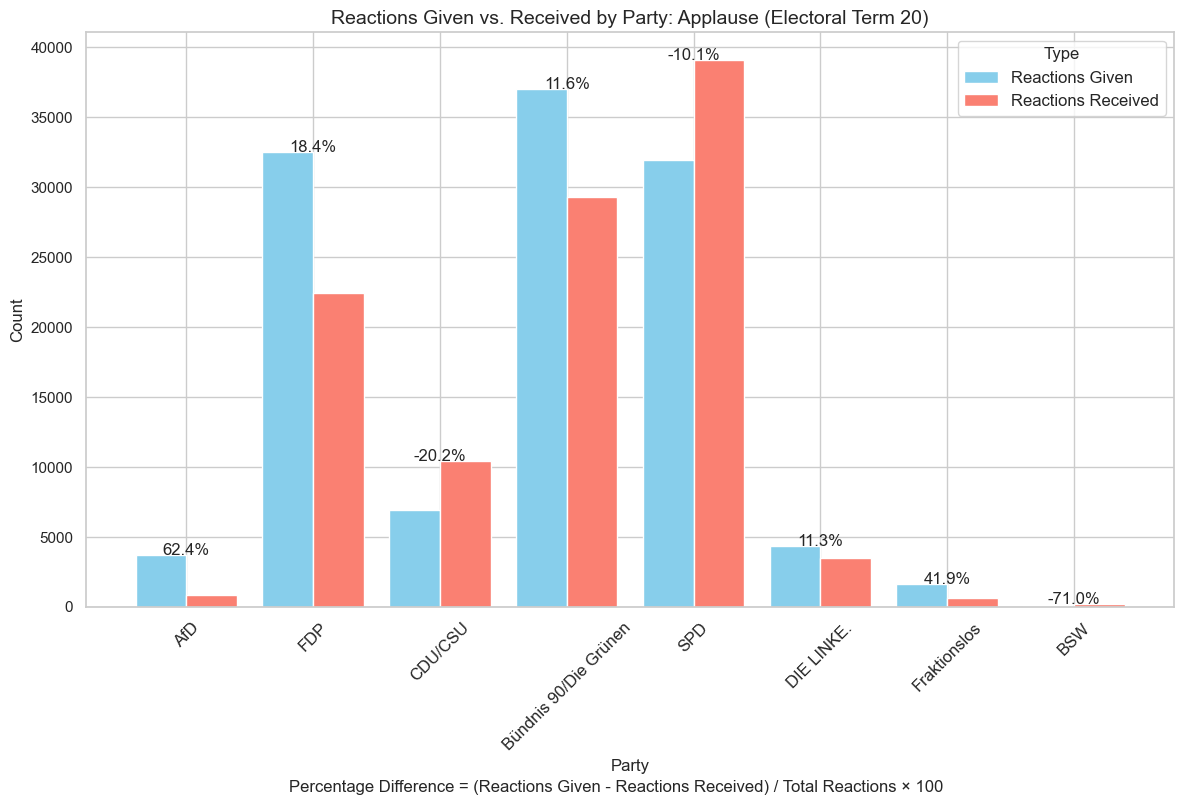

Processing reaction type: Personal Interjection


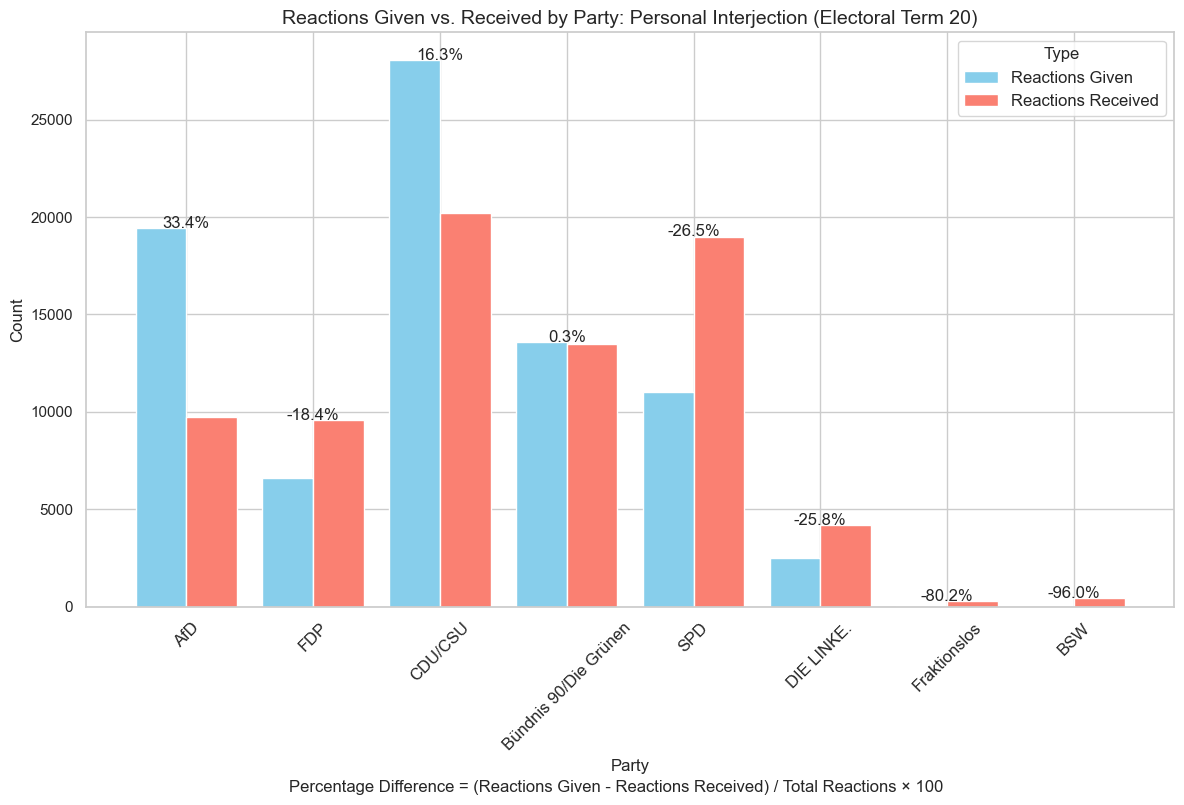

Processing reaction type: Shout


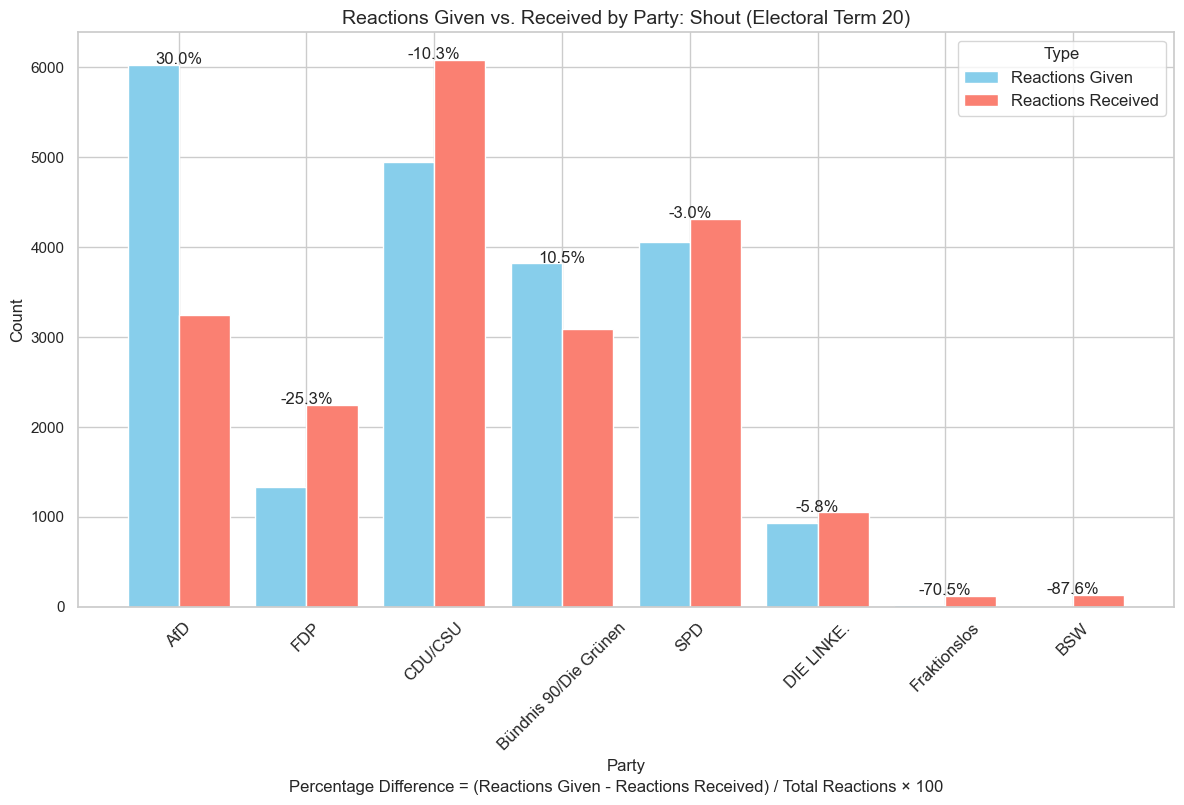

Processing reaction type: Laughter


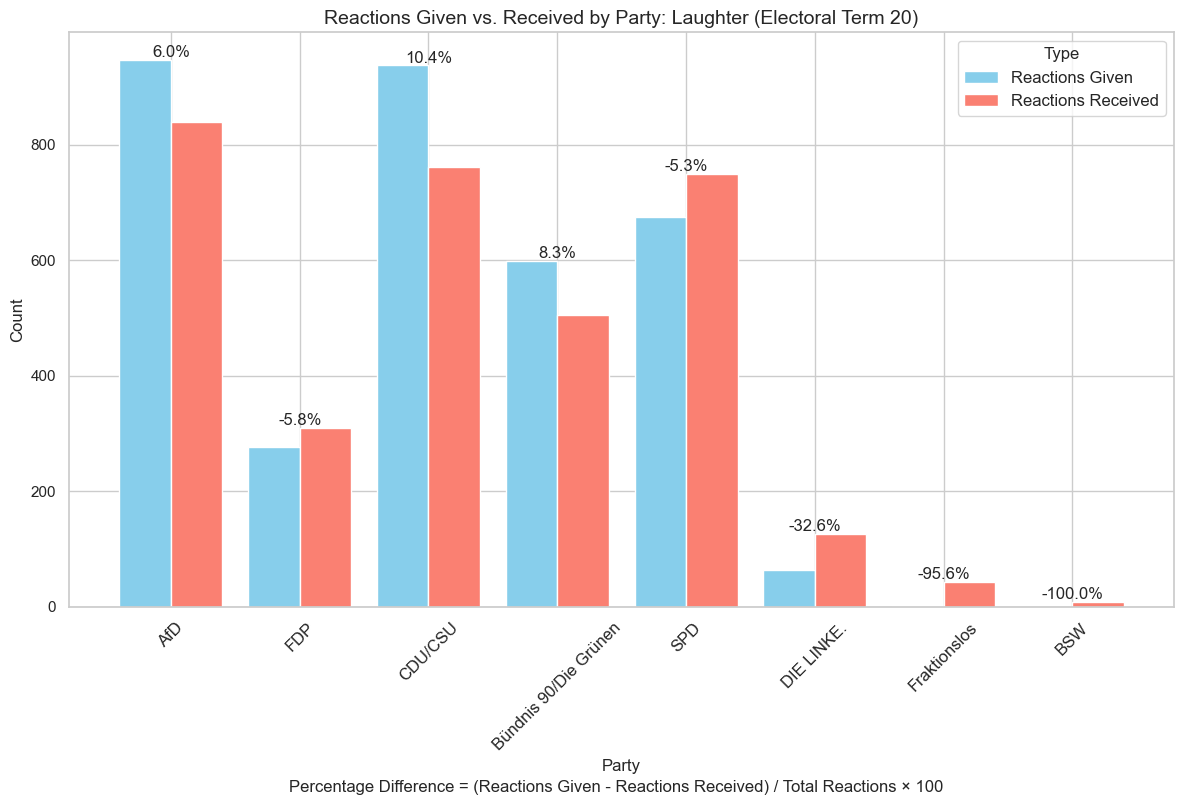

Processing reaction type: Contradiction


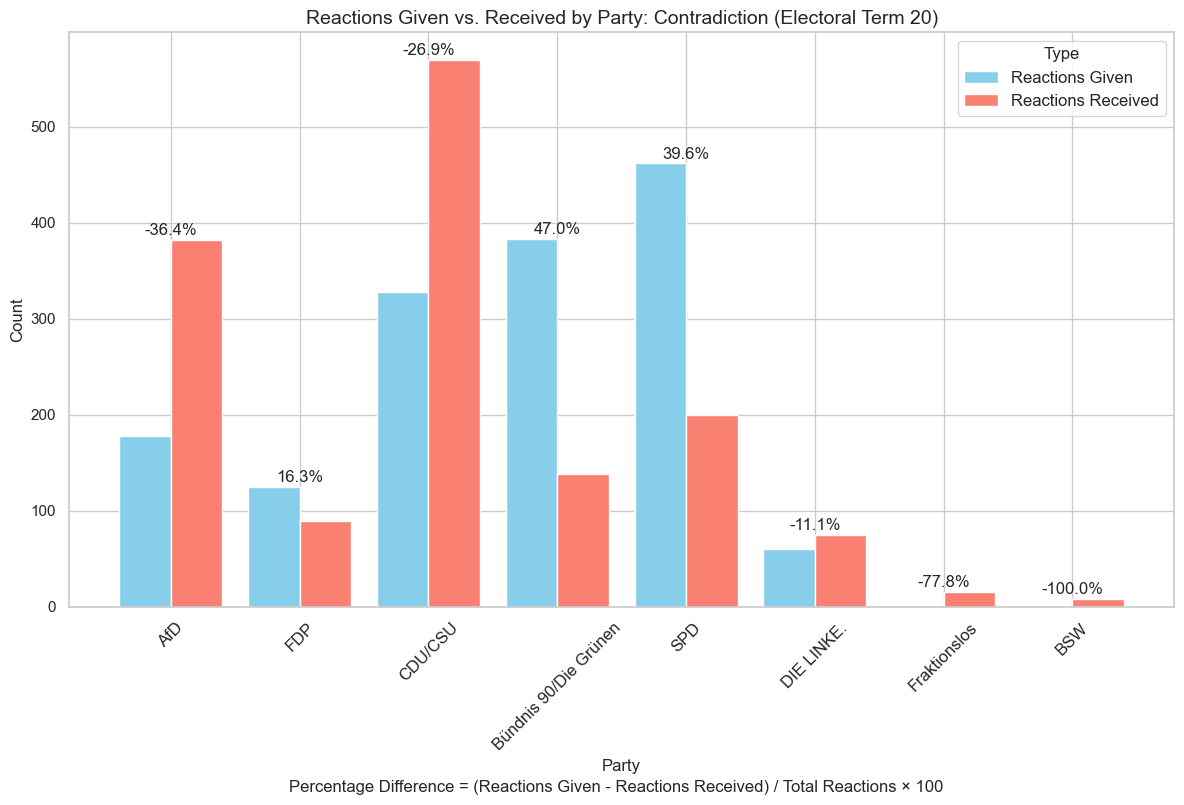

Processing reaction type: Cheerfulness


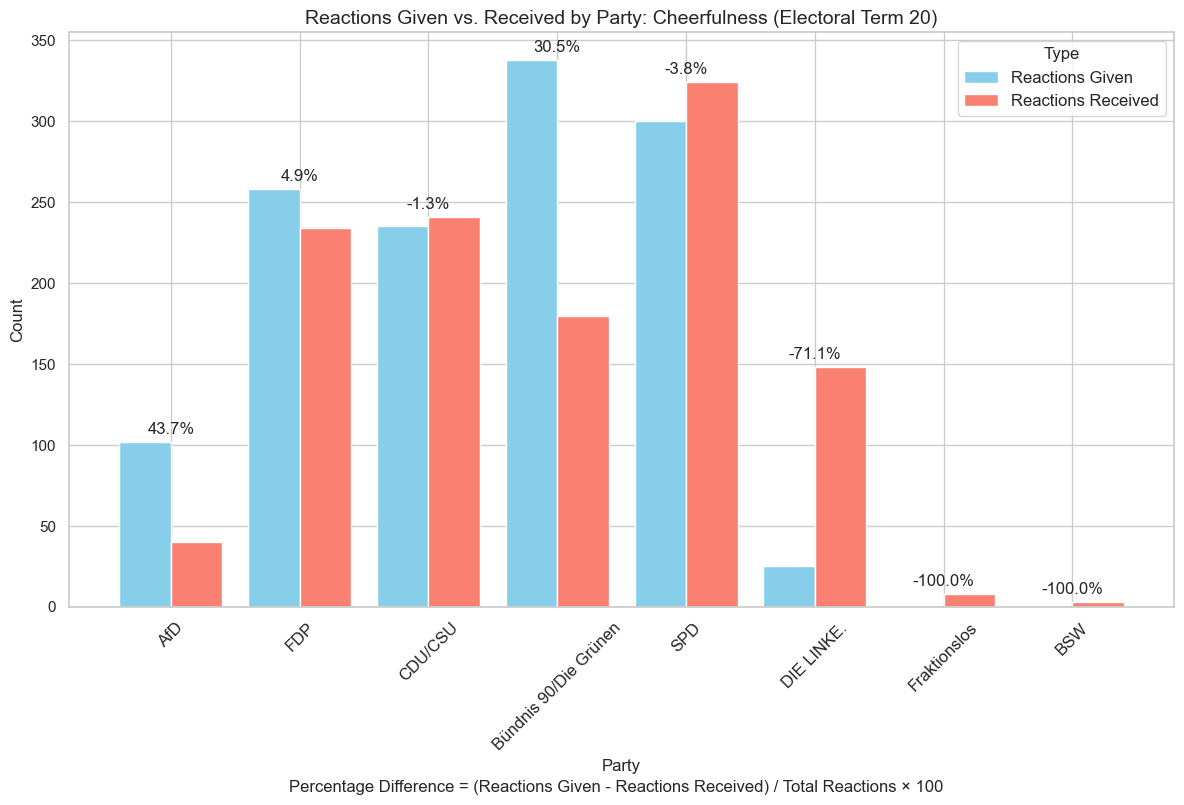

In [ ]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

# Define the faction order for sorting
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos', 'BSW']

# Filter for electoral term 20
term_20_data = content_subset_with_classification_contribution_extended[
    content_subset_with_classification_contribution_extended['electoral_term'] == 20
]

# Exclude reactions within the same faction
term_20_data = term_20_data[term_20_data['reacting_faction'] != term_20_data['faction']]

# Check if there is any data after filtering
if term_20_data.empty:
    print("No data available for electoral term 20 after filtering.")
else:
    print(f"Data loaded: {term_20_data.shape[0]} rows")

# Get the unique reaction types
reaction_types = term_20_data['reaction_type'].unique()

if len(reaction_types) == 0:
    print("No reaction types found in the dataset.")
else:
    print(f"Reaction types found: {reaction_types}")

# Loop through each reaction type
for reaction in reaction_types:
    print(f"Processing reaction type: {reaction}")
    
    # Filter data for the specific reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction]
    
    # Check if reaction_data is empty
    if reaction_data.empty:
        print(f"No data available for reaction type: {reaction}. Skipping...")
        continue
    
    # Calculate reactions given (grouped by reacting faction)
    reactions_given = reaction_data.groupby('reacting_faction').size()
    
    # Calculate reactions received (grouped by faction being reacted to)
    reactions_received = reaction_data.groupby('faction').size()
    
    # Combine data into a DataFrame
    reaction_summary = pd.DataFrame({
        'Reactions Given': reactions_given,
        'Reactions Received': reactions_received
    }).fillna(0)
    
    # Reindex to enforce consistent faction order and fill missing values
    reaction_summary = reaction_summary.reindex(faction_order, fill_value=0)
    
    # Calculate percentage difference
    reaction_summary['Percentage Difference'] = (
        (reaction_summary['Reactions Given'] - reaction_summary['Reactions Received']) / 
        (reaction_summary['Reactions Given'] + reaction_summary['Reactions Received']) * 100
    ).fillna(0)
    
    # Check if reaction_summary has data
    if reaction_summary.empty:
        print(f"No data to plot for reaction type: {reaction}. Skipping...")
        continue
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a bar width to plot given and received side-by-side
    bar_width = 0.4
    x_positions = range(len(reaction_summary))  # Numeric x-axis positions

    # Bar for reactions given
    bars1 = ax.bar(
        [x - bar_width / 2 for x in x_positions], 
        reaction_summary['Reactions Given'], 
        bar_width, 
        label='Reactions Given', 
        color='skyblue'
    )

    # Bar for reactions received
    bars2 = ax.bar(
        [x + bar_width / 2 for x in x_positions], 
        reaction_summary['Reactions Received'], 
        bar_width, 
        label='Reactions Received', 
        color='salmon'
    )

    # Add percentage difference as text above bars
    for x, row in zip(x_positions, reaction_summary.itertuples()):
        ax.text(
            x, 
            max(row[1], row[2]) + 5,  # Offset above the taller bar
            f'{row[3]:.1f}%',  # Percentage difference
            ha='center', 
            fontsize=12
        )
    
    # Customize the chart
    ax.set_title(f'Reactions Given vs. Received by Faction: {reaction} (Electoral Term 20)', fontsize=14)
    ax.set_xlabel('Faction', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(reaction_summary.index, rotation=45, fontsize=12)
    ax.legend(title='Type', fontsize=12)

    # Add explanation line below the chart
    plt.figtext(
        0.52, 
        0, 
        'Percentage Difference = (Reactions Given - Reactions Received) / Total Reactions × 100', 
        ha='center', 
        fontsize=12, 
        wrap=True
    )

    plt.tight_layout()

    # Show the chart
    plt.show()


In [ ]:
# Define the color map
color_map = {
    'AfD': 'blue',
    'FDP': 'yellow',
    'CDU/CSU': 'black',
    'Bündnis 90/Die Grünen': 'green',
    'SPD': 'red',
    'DIE LINKE.': 'pink',
    'BSW':'purple'

}

term_20_speaking_time = content_df_raw[(content_df_raw['electoral_term'] == 20) & (content_df_raw['position_short'] != 'Presidium of Parliament')]
term_20_speaking_time['faction'] = term_20_speaking_time['faction'].apply(lambda x: x if x in color_map else 'Other')
term_20_speaking_time = term_20_speaking_time[term_20_speaking_time['faction'] != 'Other']

term_20_speaking_time = term_20_speaking_time.groupby('faction')['speech_length'].sum().reset_index()
term_20_speaking_time = term_20_speaking_time.rename(columns={'speech_length': 'total_speaking_time'})
term_20_speaking_time['total_speaking_time_percentage'] = term_20_speaking_time['total_speaking_time'] / term_20_speaking_time['total_speaking_time'].sum() * 100
term_20_speaking_time

faction  total_speaking_time  total_speaking_time_percentage
0                    AfD              8973629                       11.567855
1                    BSW               261785                        0.337466
2  Bündnis 90/Die Grünen             13119371                       16.912108
3                CDU/CSU             19185416                       24.731812
4             DIE LINKE.              4722958                        6.088339
5                    FDP             11054851                       14.250746
6                    SPD             20255828                       26.111674

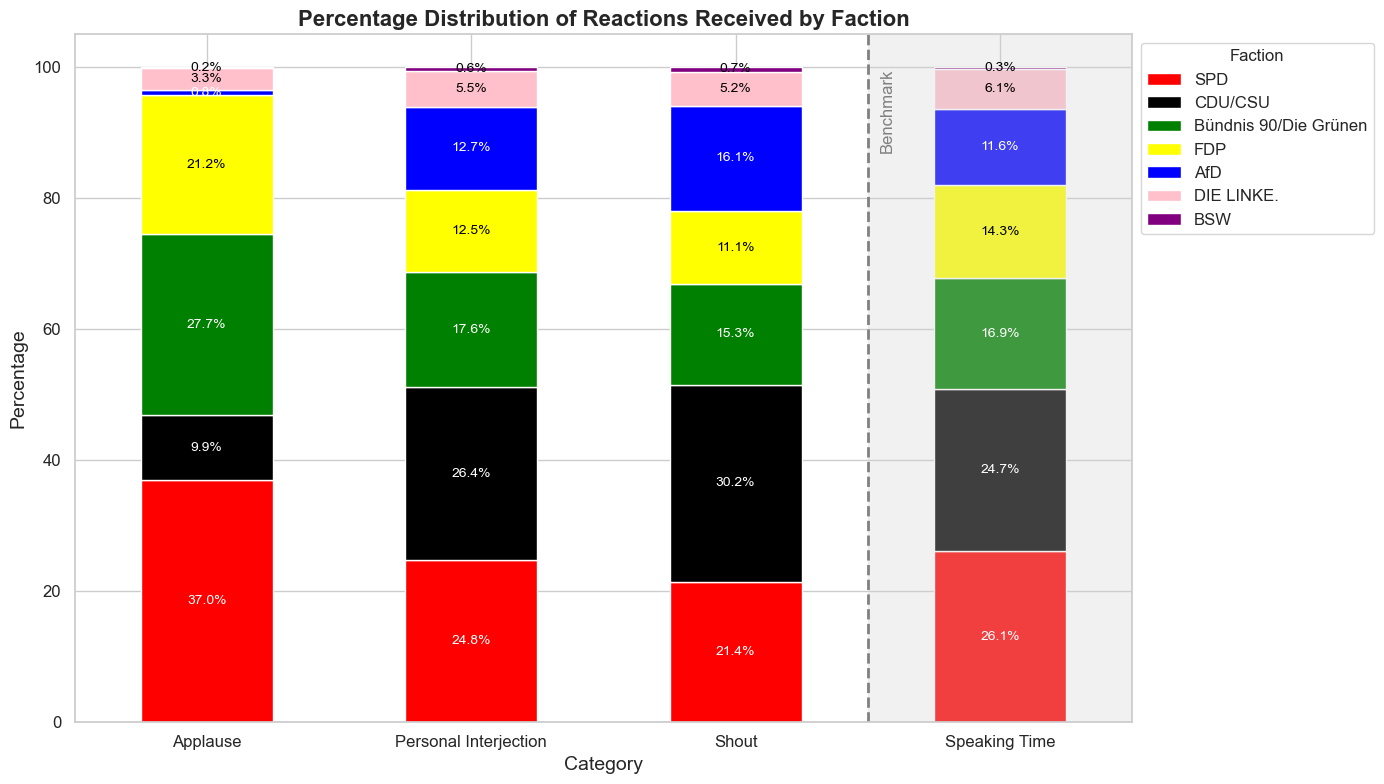

In [105]:

# Filter for the desired reaction types
desired_reactions = ['Applause', 'Shout', 'Personal Interjection']
reaction_data_filtered = term_20_data[term_20_data['reaction_type'].isin(desired_reactions)]
reaction_data_filtered = reaction_data_filtered[(reaction_data_filtered['faction']!="")&(reaction_data_filtered['faction']!="Fraktionslos")]

# Group by reaction type and faction receiving the reaction
reaction_distribution = reaction_data_filtered.groupby(['reaction_type', 'faction']).size().reset_index(name='count')


# Pivot the data for plotting percentages
reaction_distribution_pivot = reaction_distribution.pivot(index='reaction_type', columns='faction', values='count').fillna(0)

# Reindex to enforce consistent faction order
faction_order = ['SPD','CDU/CSU', 'Bündnis 90/Die Grünen','FDP', 'AfD','DIE LINKE.', 'BSW']
reaction_distribution_pivot = reaction_distribution_pivot.reindex(columns=faction_order,fill_value=0)

# Normalize to percentages
reaction_distribution_percent = reaction_distribution_pivot.div(reaction_distribution_pivot.sum(axis=1), axis=0) * 100

# Convert speaking time percentages for plotting and add as a new row in the DataFrame
speaking_time_percentages = term_20_speaking_time.set_index('faction')['total_speaking_time_percentage']
speaking_time_percentages.name = 'Speaking Time'

# Append this row to the reaction_distribution_percent dataframe
reaction_distribution_percent_with_speaking = reaction_distribution_percent.append(speaking_time_percentages)

# Adjust order and fill missing values for uniformity in factions
reaction_distribution_percent_with_speaking = reaction_distribution_percent_with_speaking.reindex(columns=faction_order, fill_value=0)

# Plot the updated DataFrame
ax = reaction_distribution_percent_with_speaking.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=[color_map[col] for col in reaction_distribution_percent_with_speaking.columns]
)

# Add a vertical line before the speaking time bar
num_categories = len(reaction_distribution_percent_with_speaking.index)
speaking_time_position = num_categories - 1  # last bar
plt.axvline(x=speaking_time_position - 0.5, color='gray', linestyle='--', linewidth=2)

# Label the vertical line as 'Benchmark'
plt.text(speaking_time_position - 0.5 + 0.1, plt.ylim()[1] * 0.95, 'Benchmark', rotation=90, verticalalignment='top', horizontalalignment='right', color='gray', fontsize=12)
# Change background color for the speaking time benchmark area
ax.axvspan(speaking_time_position - 0.5, speaking_time_position + 0.5, color='lightgray', alpha=0.3)

# Add labels as before
for i, (category, row) in enumerate(reaction_distribution_percent_with_speaking.iterrows()):
    cumulative = 0
    for faction in faction_order:
        percentage = row[faction]
        if percentage > 0:
            # Adjust text color based on background color
            text_color = 'black' if color_map[faction] in ['yellow', 'white', 'pink', 'purple'] else 'white'
            ax.text(
                i, cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center', va='center', fontsize=10, color=text_color
            )
            cumulative += percentage

# Customizations and saving as before
plt.title('Percentage Distribution of Reactions Received by Faction', fontsize=16, weight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save the plot
plt.savefig('reaction_and_speaking_time_distribution_percentage_stacked_bar_with_labels_centered.png', format='png', dpi=300)

# Show the chart
plt.show()

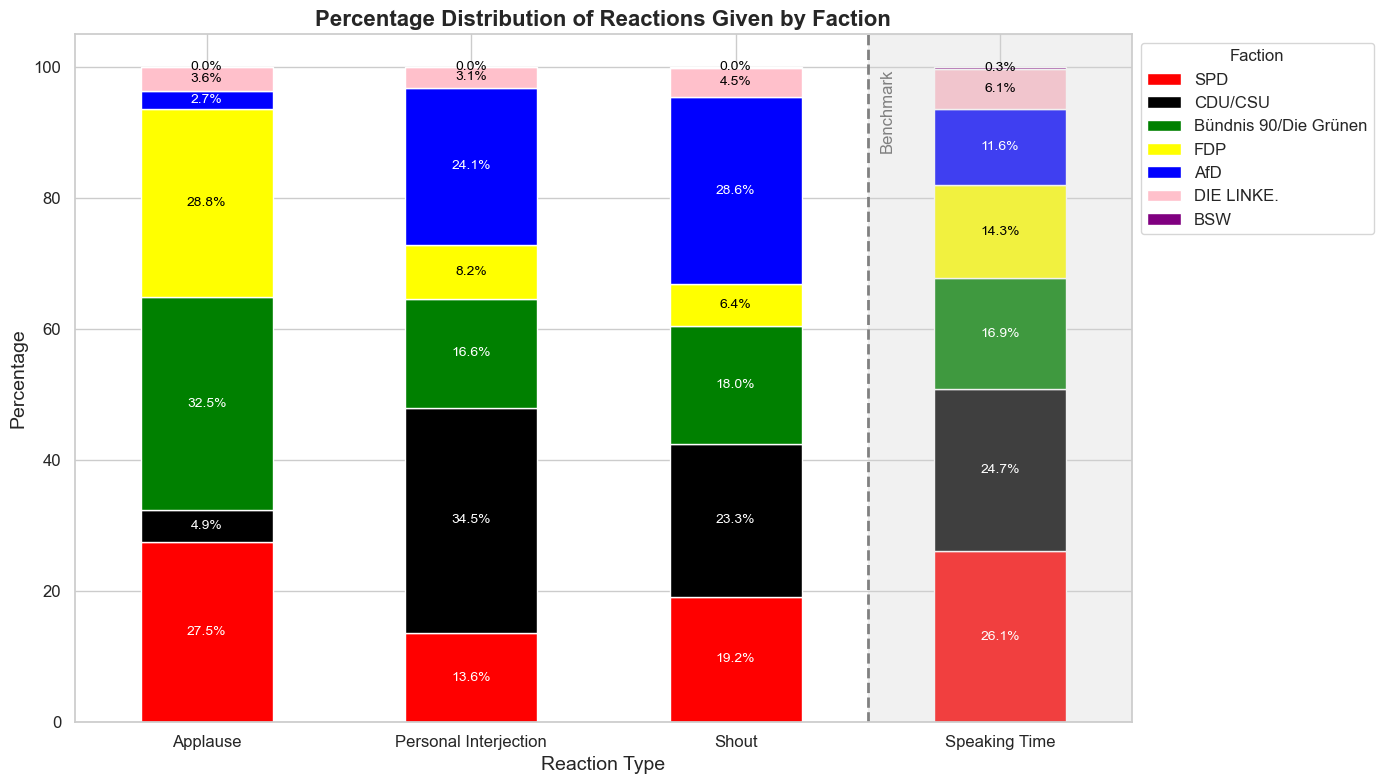

In [106]:
# Normalize speaking time data and prepare it for inclusion
speaking_time_percentages = term_20_speaking_time.set_index('faction')['total_speaking_time_percentage']
speaking_time_percentages.name = 'Speaking Time'

# Convert speaking time to a DataFrame with the same structure as reaction_distribution_given_percent
speaking_time_df = pd.DataFrame(speaking_time_percentages).transpose()

# Make sure all necessary factions are included, even if their speaking time is 0
speaking_time_df = speaking_time_df.reindex(columns=faction_order, fill_value=0)


# Group by reaction type and faction giving the reaction
reaction_distribution_given = reaction_data_filtered.groupby(['reaction_type', 'reacting_faction']).size().reset_index(name='count')

# Pivot the data for plotting percentages
reaction_distribution_given_pivot = reaction_distribution_given.pivot(index='reaction_type', columns='reacting_faction', values='count').fillna(0)

# Reindex to enforce consistent faction order
reaction_distribution_given_pivot = reaction_distribution_given_pivot.reindex(columns=faction_order, fill_value=0)

# Normalize to percentages
reaction_distribution_given_percent = reaction_distribution_given_pivot.div(reaction_distribution_given_pivot.sum(axis=1), axis=0) * 100

# Append the speaking time data to the reaction_distribution_given_percent dataframe
reaction_distribution_given_percent.loc['Speaking Time'] = speaking_time_df.loc['Speaking Time']

ax = reaction_distribution_given_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=[color_map[col] if col in color_map else 'gray' for col in reaction_distribution_given_percent.columns]  # Include color for 'Speaking Time'
)

# Add a vertical line before the speaking time bar, assuming speaking time is the last bar
num_categories = len(reaction_distribution_given_percent.index)
speaking_time_position = num_categories - 1  # Assuming speaking time is the last category
plt.axvline(x=speaking_time_position - 0.5, color='gray', linestyle='--', linewidth=2)


# Label the vertical line as 'Benchmark'
plt.text(speaking_time_position - 0.5 + 0.1, plt.ylim()[1] * 0.95, 'Benchmark', rotation=90, verticalalignment='top', horizontalalignment='right', color='gray', fontsize=12)
ax.axvspan(speaking_time_position - 0.5, speaking_time_position + 0.5, color='lightgray', alpha=0.3)

# Add labels to the plot
for i, (category, row) in enumerate(reaction_distribution_given_percent.iterrows()):
    cumulative = 0
    for faction in reaction_distribution_given_percent.columns:
        percentage = row[faction]
        if percentage > 0:
            ax.text(
                i, cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center', va='center', fontsize=10, color='black' if faction in ['FDP', 'BSW', 'DIE LINKE.', 'Speaking Time'] else 'white'
            )
            cumulative += percentage

# Customize the chart
plt.title('Percentage Distribution of Reactions Given by Faction', fontsize=16, weight='bold')
plt.xlabel('Reaction Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('reaction_given_and_speaking_time_distribution_percentage_stacked_bar_with_labels_centered.png', format='png', dpi=300)

# Show the chart
plt.show()

#### 7.3.2 By reactions by governing/opposition

In [ ]:
# Define governing parties for each electoral term
regierung_mapping = {
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Function to label factions as Governing or Opposition
def label_governing_opposition(row, faction_column, term_column, regierung_mapping):
    term = row[term_column]
    if term in regierung_mapping:
        if row[faction_column] in regierung_mapping[term]:
            return 'Governing'
        else:
            return 'Opposition'
    return np.nan

# Apply labels to the factions in the dataset
content_subset_with_classification_contribution_extended['reacting_group'] = content_subset_with_classification_contribution_extended.apply(
    lambda row: label_governing_opposition(row, 'reacting_faction', 'electoral_term', regierung_mapping), axis=1
)
content_subset_with_classification_contribution_extended['reacted_to_group'] = content_subset_with_classification_contribution_extended.apply(
    lambda row: label_governing_opposition(row, 'faction', 'electoral_term', regierung_mapping), axis=1
)

# Filter the dataset for non-missing groups
content_subset_with_classification_contribution_extended = content_subset_with_classification_contribution_extended.dropna(
    subset=['reacting_group', 'reacted_to_group']
)

# Generate reaction matrices grouped by Governing vs. Opposition
reaction_matrices_gov_opp = {}

# Loop over each reaction type
for reaction in reaction_types:
    # Filter for the specific reaction type
    reaction_data = content_subset_with_classification_contribution_extended[
        content_subset_with_classification_contribution_extended['reaction_type'] == reaction
    ]

    # Create a pivot table counting reactions between Governing and Opposition
    reaction_matrix = reaction_data.pivot_table(
        index='reacted_to_group',  # Group being reacted to
        columns='reacting_group',  # Group reacting
        values='reaction_type',
        aggfunc='size',
        fill_value=0
    )

    # Store the matrix in the dictionary with the reaction type as the key
    reaction_matrices_gov_opp[reaction] = reaction_matrix

# Display the Governing vs. Opposition matrices
for reaction, matrix in reaction_matrices_gov_opp.items():
    print(f"Reaction Type: {reaction}")
    display(matrix)  # Display the matrix



Reaction Type: nan


Empty DataFrame
Columns: []
Index: []

Reaction Type: Applause


reacting_group    Governing  Opposition
reacted_to_group                       
Governing            262853       79396
Opposition            73676      164660

Reaction Type: Personal Interjection


reacting_group    Governing  Opposition
reacted_to_group                       
Governing             26732       94648
Opposition            57664       57357

Reaction Type: Shout


reacting_group    Governing  Opposition
reacted_to_group                       
Governing              3745       17280
Opposition            13190       10259

Reaction Type: Laughter


reacting_group    Governing  Opposition
reacted_to_group                       
Governing               478        3531
Opposition             2875        2625

Reaction Type: Contradiction


reacting_group    Governing  Opposition
reacted_to_group                       
Governing               401        1419
Opposition             1649        1106

Reaction Type: Cheerfulness


reacting_group    Governing  Opposition
reacted_to_group                       
Governing              2465        1176
Opposition             1131        1570

No data available for reaction type: nan


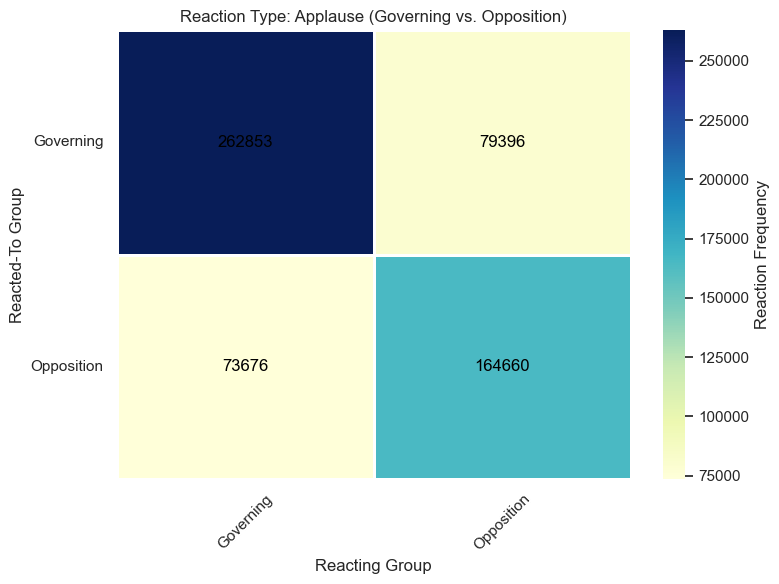

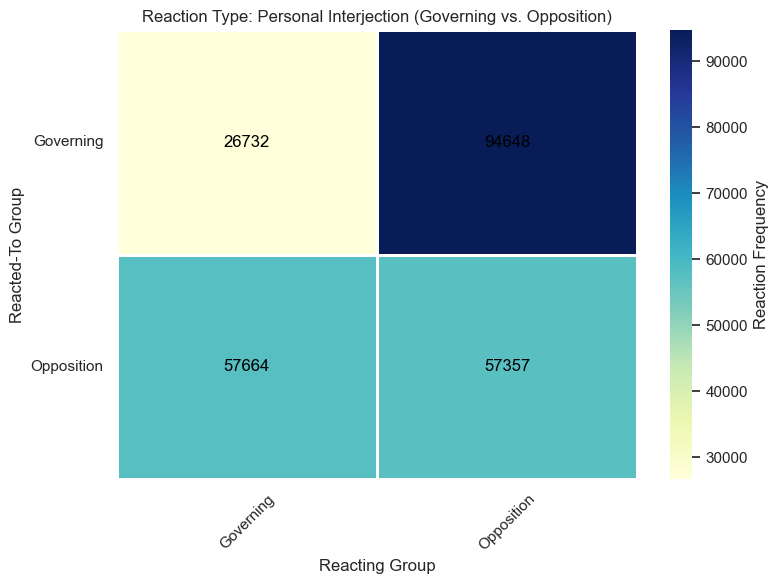

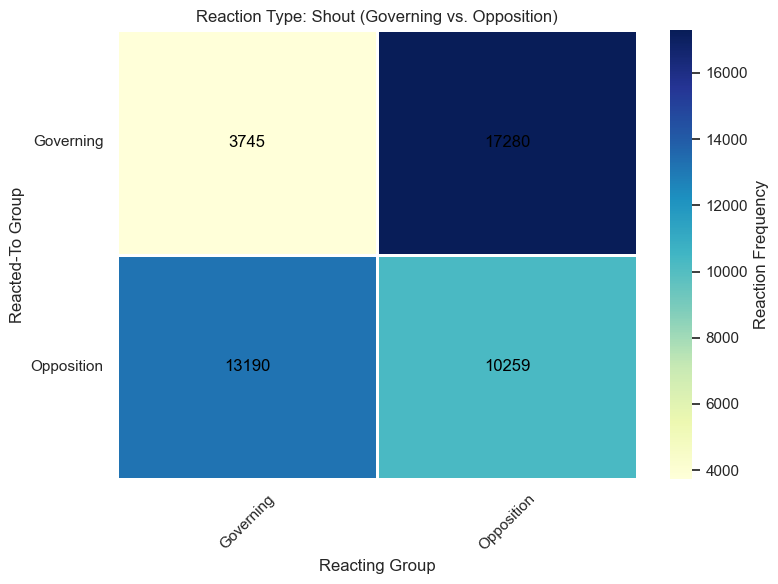

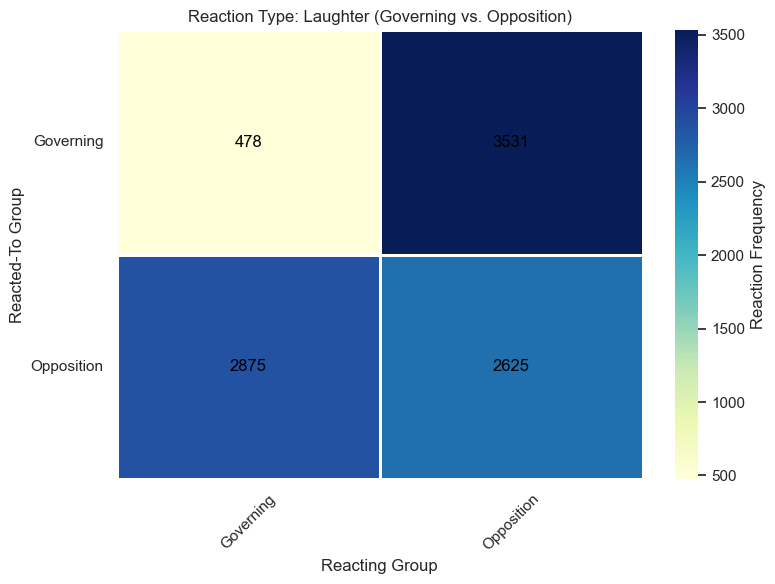

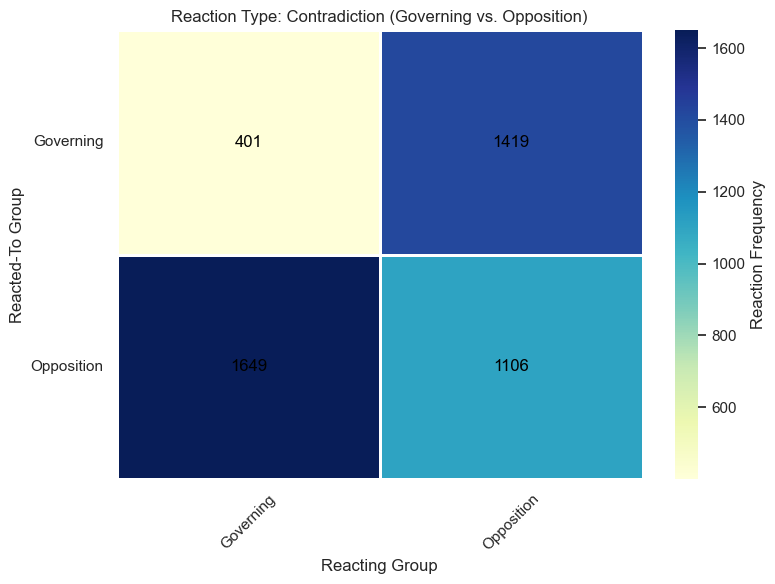

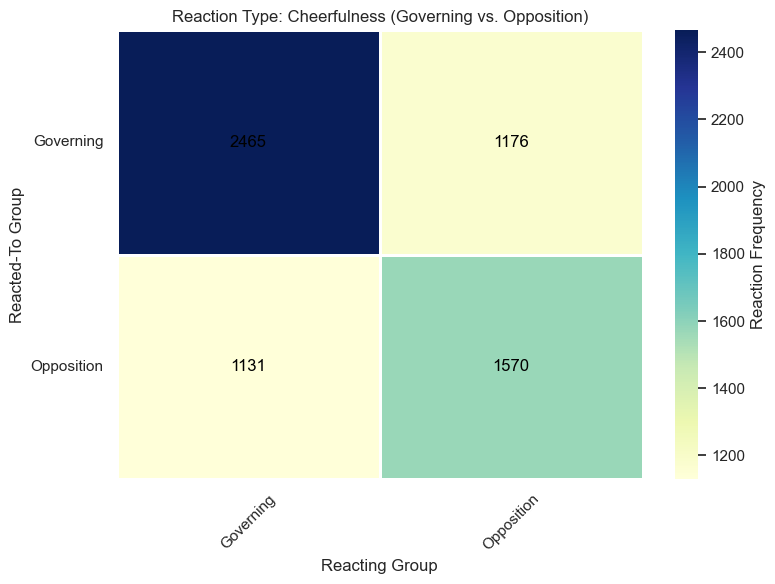

In [ ]:
# Set up the plotting style for clarity
sns.set(style="whitegrid")

# Loop through each reaction matrix and plot it as a heatmap
for reaction, matrix in reaction_matrices_gov_opp.items():
    # Check if the matrix is non-empty before plotting
    if not matrix.empty:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            matrix, 
            annot=True, 
            cmap="YlGnBu", 
            fmt="d", 
            linewidths=1,       # Adjusts the thickness of the box around cells
            linecolor='white',  # Sets box color around each cell
            cbar_kws={'label': 'Reaction Frequency'}, 
            annot_kws={"color": "black"}  # Set annotation color for non-zero values
        )
        plt.title(f"Reaction Type: {reaction} (Governing vs. Opposition)")
        plt.xlabel("Reacting Group")
        plt.ylabel("Reacted-To Group")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for reaction type: {reaction}")


### 5.4 Development of Reaction Types

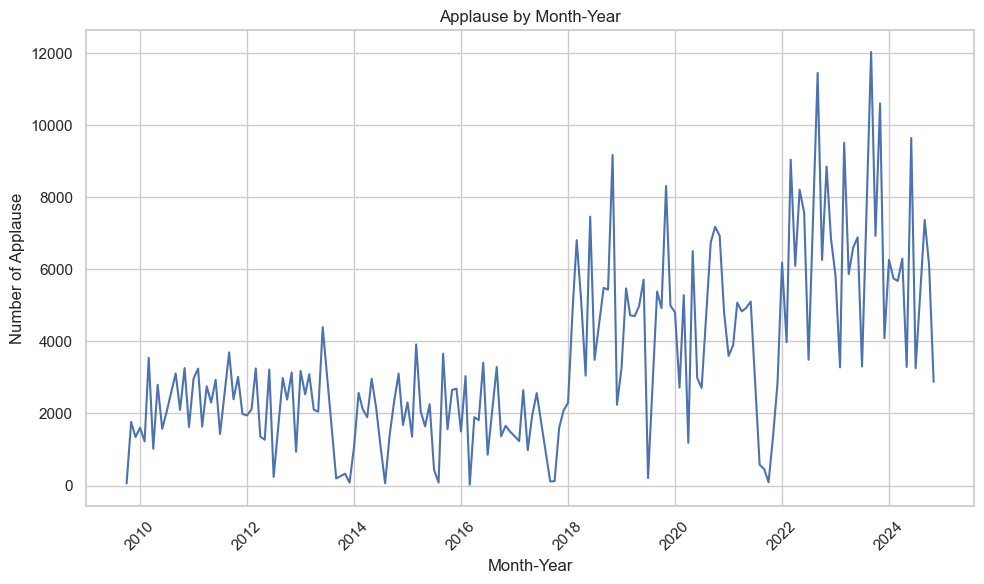

In [ ]:
# Ensure 'month_year' is in period format
content_subset_with_classification_contribution_extended['month_year'] = content_subset_with_classification_contribution_extended['date'].dt.to_period('M')

# Filter for 'Applause' reactions and group by 'month_year', counting only the 'reaction_type' occurrences
applause_by_month = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['reaction_type'] == 'Applause'].groupby('month_year')['reaction_type'].count().reset_index()

# Convert 'month_year' to timestamp for plotting
applause_by_month['month_year'] = applause_by_month['month_year'].dt.to_timestamp()

# Plotting the 'Applause' counts over time
plt.figure(figsize=(10, 6))
plt.plot(applause_by_month['month_year'], applause_by_month['reaction_type'], label='Applause Count')
plt.title('Applause by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Applause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


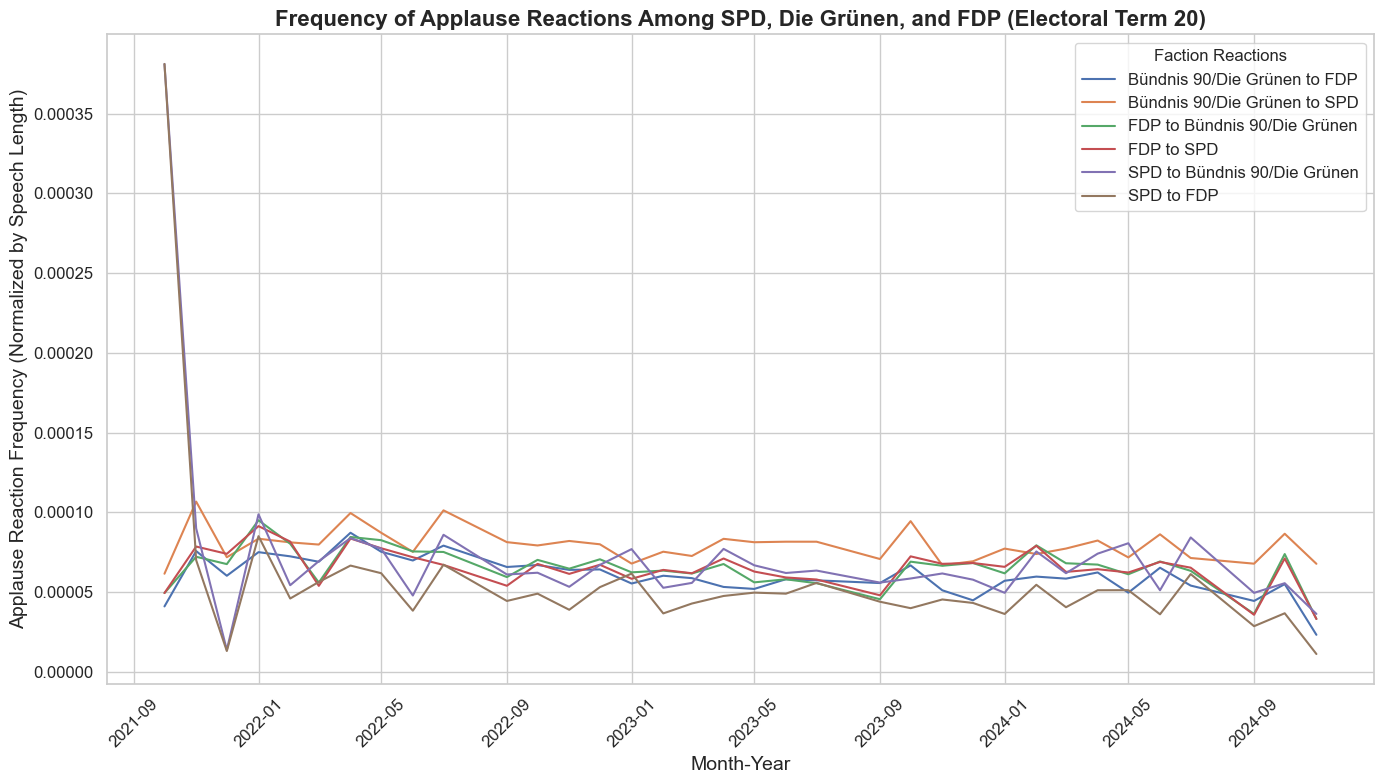

In [ ]:
term_20_reaction_data = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['electoral_term'] == 20]

# Filter data for term 20 and reaction type "Applause"
applause_data = term_20_data[term_20_data['reaction_type'] == 'Applause']

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
applause_data_filtered = applause_data[
    (applause_data['faction'].isin(factions_of_interest)) &
    (applause_data['reacting_faction'].isin(factions_of_interest))
]

# Calculate total speech length per month-year and faction
speech_length_by_month = (
    term_20_data.groupby(['month_year', 'faction'])['speech_length']
    .sum()
    .reset_index()
    .rename(columns={'speech_length': 'total_speech_length'})
)


# Group data by month, faction (reacting), and reacting faction
applause_counts = applause_data_filtered.groupby(
    ['month_year', 'faction', 'reacting_faction']
).size().reset_index(name='reaction_count')

applause_counts['month_year'] = applause_counts['month_year'].dt.to_timestamp()
speech_length_by_month['month_year'] = speech_length_by_month['month_year'].dt.to_timestamp()


# Merge applause counts with total speech length to normalize
applause_with_speech_length = applause_counts.merge(
    speech_length_by_month, 
    on=['month_year', 'faction'], 
    how='left'
)

# Calculate the reaction frequency
applause_with_speech_length['reaction_frequency'] = (
    applause_with_speech_length['reaction_count'] / applause_with_speech_length['total_speech_length']
)


# Pivot data for plotting
pivoted_data = applause_with_speech_length.pivot_table(
    index='month_year',
    columns=['faction', 'reacting_faction'],
    values='reaction_frequency',
    fill_value=0
)

# Prepare data for line plots (flatten the multi-index columns)
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'month_year'
    sns.lineplot(data=pivoted_data, x='month_year', y=column, label=column)

# Customize the chart
plt.title('Frequency of Applause Reactions Among SPD, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Applause Reaction Frequency (Normalized by Speech Length)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Reactions', fontsize=12)
plt.tight_layout()

# save the plot as a PNG file
plt.savefig('frequency_of_applause_reactions_line_chart.png', format='png', dpi=300)

# Show the chart
plt.show()



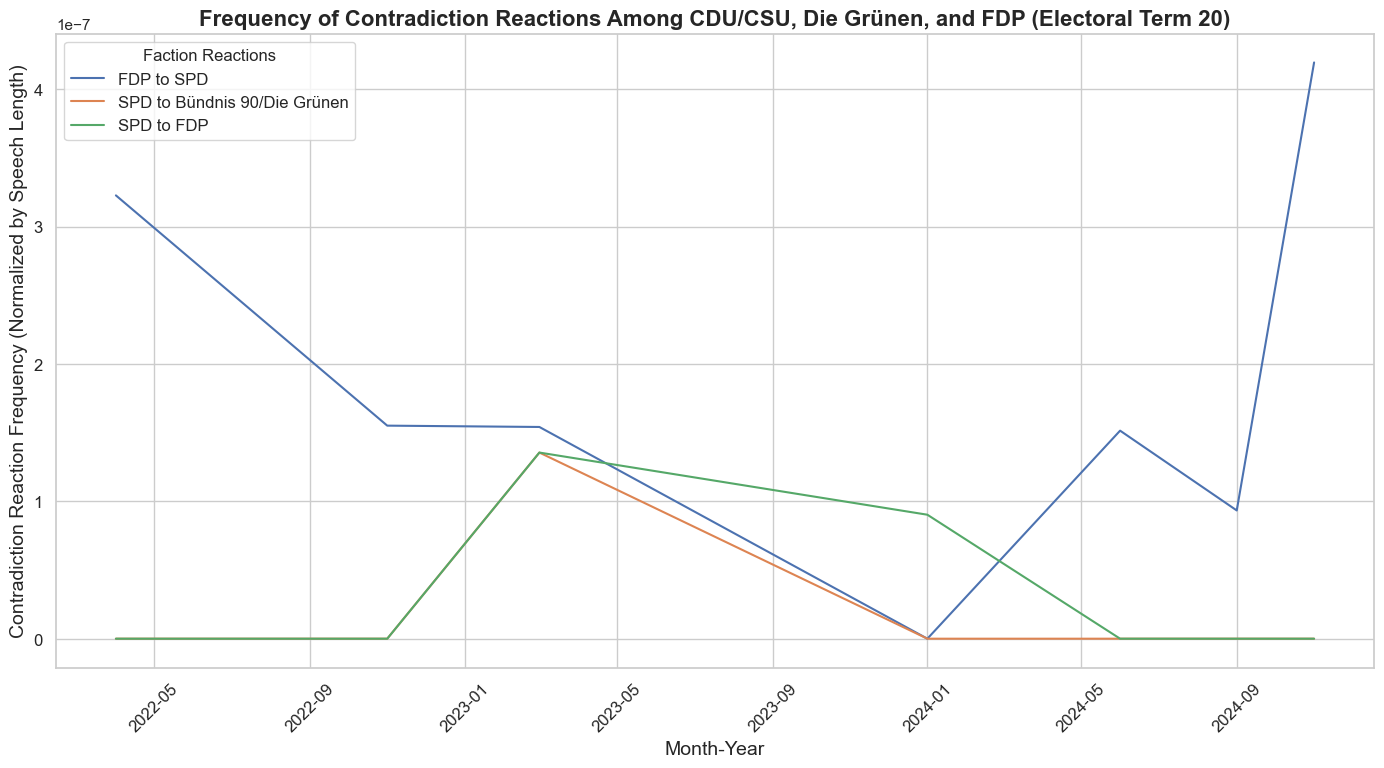

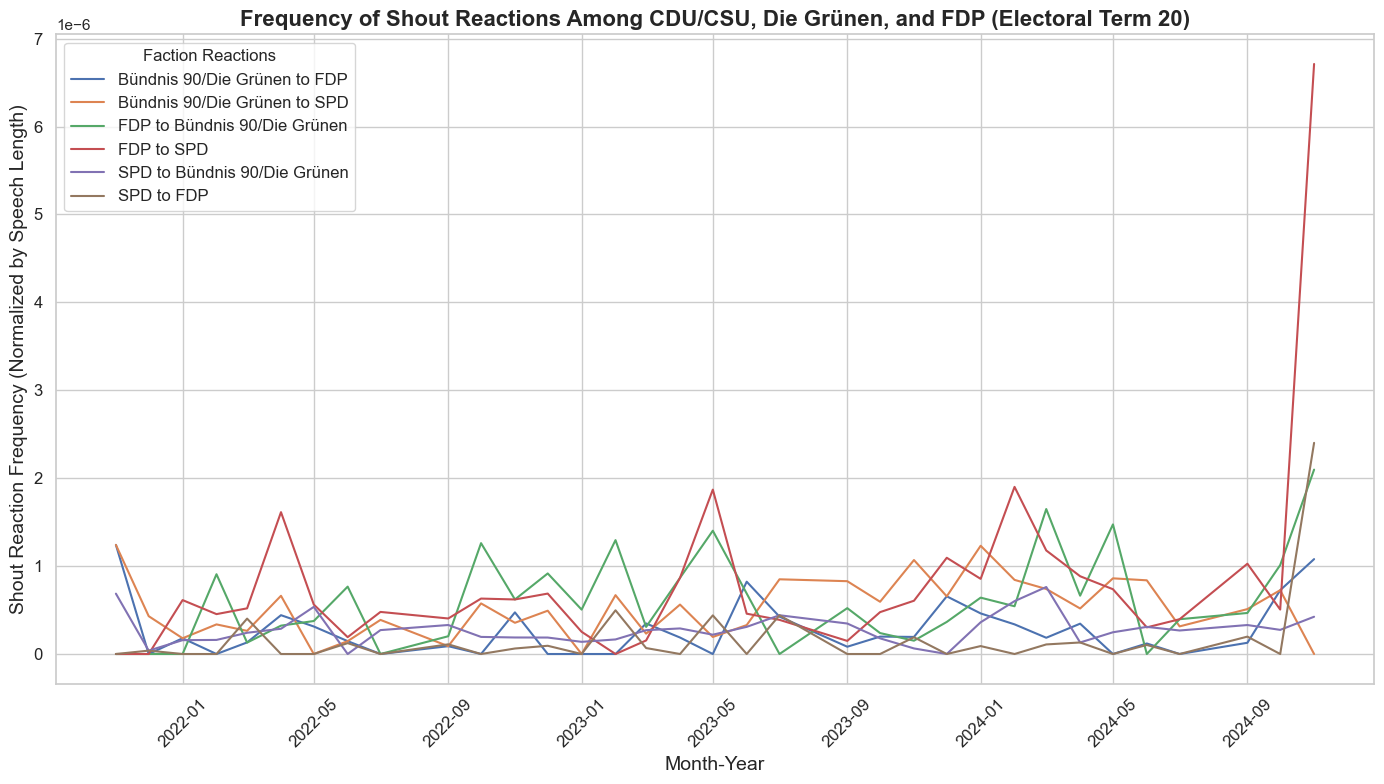

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


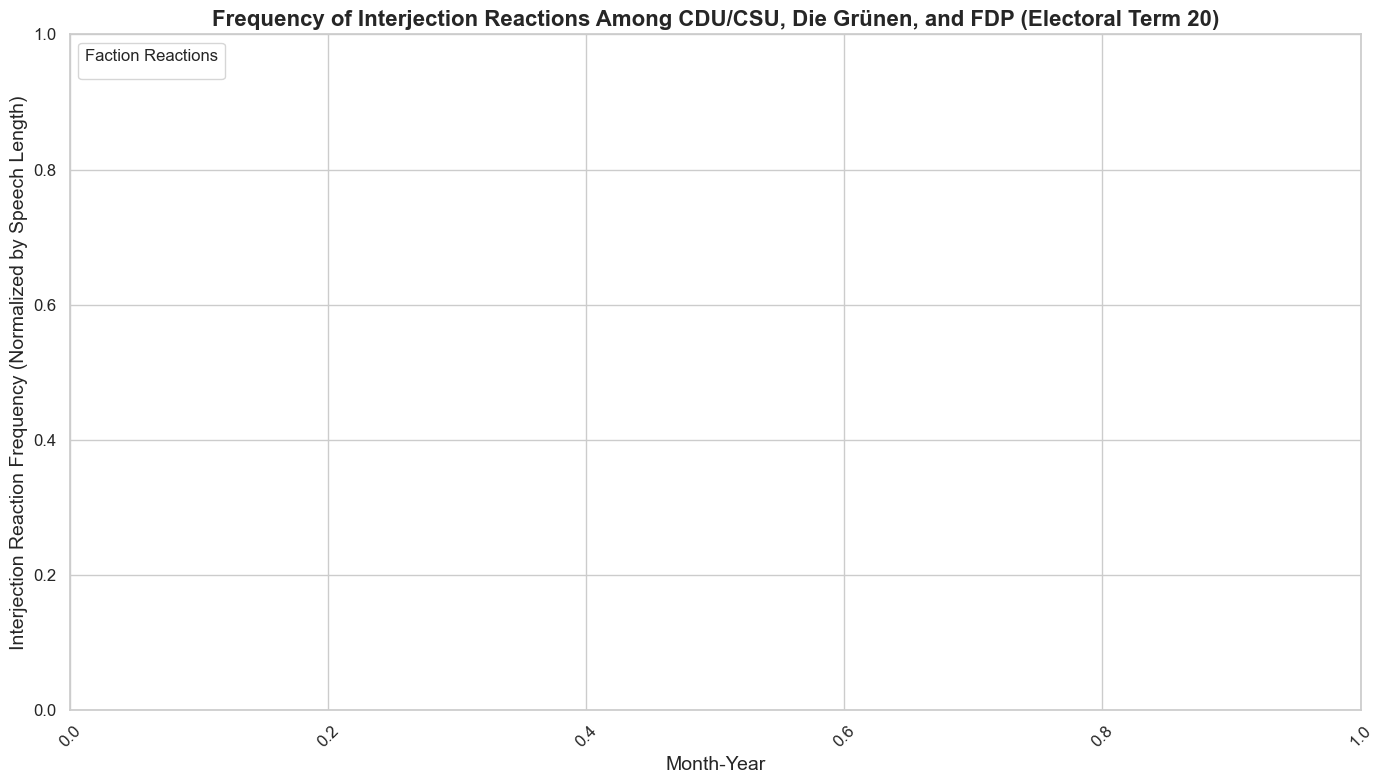

In [ ]:
# List of reaction types to analyze
reaction_types_to_analyze = ['Contradiction', 'Shout', 'Interjection']

# Initialize an empty dictionary to store data for each reaction type
reaction_data_dict = {}

# Loop through each reaction type
for reaction_type in reaction_types_to_analyze:
    # Filter data for the current reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction_type]
    
    # Filter data for factions of interest
    reaction_data_filtered = reaction_data[
        (reaction_data['faction'].isin(factions_of_interest)) &
        (reaction_data['reacting_faction'].isin(factions_of_interest))
    ]
    

    # Group data by month, faction (reacting), and reacting faction
    reaction_counts = reaction_data_filtered.groupby(
        ['month_year', 'faction', 'reacting_faction']
    ).size().reset_index(name='reaction_count')
    
    reaction_counts['month_year'] = reaction_counts['month_year'].dt.to_timestamp()
    reaction_data_filtered['month_year'] = reaction_data_filtered['month_year'].dt.to_timestamp()
    # Merge reaction counts with total speech length to normalize
    reaction_with_speech_length = reaction_counts.merge(
        speech_length_by_month,
        on=['month_year', 'faction'],
        how='left'
    )
    
    # Calculate the reaction frequency
    reaction_with_speech_length['reaction_frequency'] = (
        reaction_with_speech_length['reaction_count'] / reaction_with_speech_length['total_speech_length']
    )
    
    # Pivot data for plotting
    pivoted_data = reaction_with_speech_length.pivot_table(
        index='month_year',
        columns=['faction', 'reacting_faction'],
        values='reaction_frequency',
        fill_value=0
    )
    
    # Flatten the multi-index columns for easy plotting
    pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
    pivoted_data.reset_index(inplace=True)
    
    # Store the pivoted data for this reaction type
    reaction_data_dict[reaction_type] = pivoted_data

# Plotting each reaction type
for reaction_type, pivoted_data in reaction_data_dict.items():
    plt.figure(figsize=(14, 8))
    
    # Plot each column in the pivoted data
    for column in pivoted_data.columns[1:]:  # Skip 'month_year'
        sns.lineplot(data=pivoted_data, x='month_year', y=column, label=column)
    
    # Customize the chart
    plt.title(f'Frequency of {reaction_type} Reactions Among CDU/CSU, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
    plt.xlabel('Month-Year', fontsize=14)
    plt.ylabel(f'{reaction_type} Reaction Frequency (Normalized by Speech Length)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Faction Reactions', fontsize=12, loc='upper left')
    plt.tight_layout()
    
    # Show the chart
    plt.show()


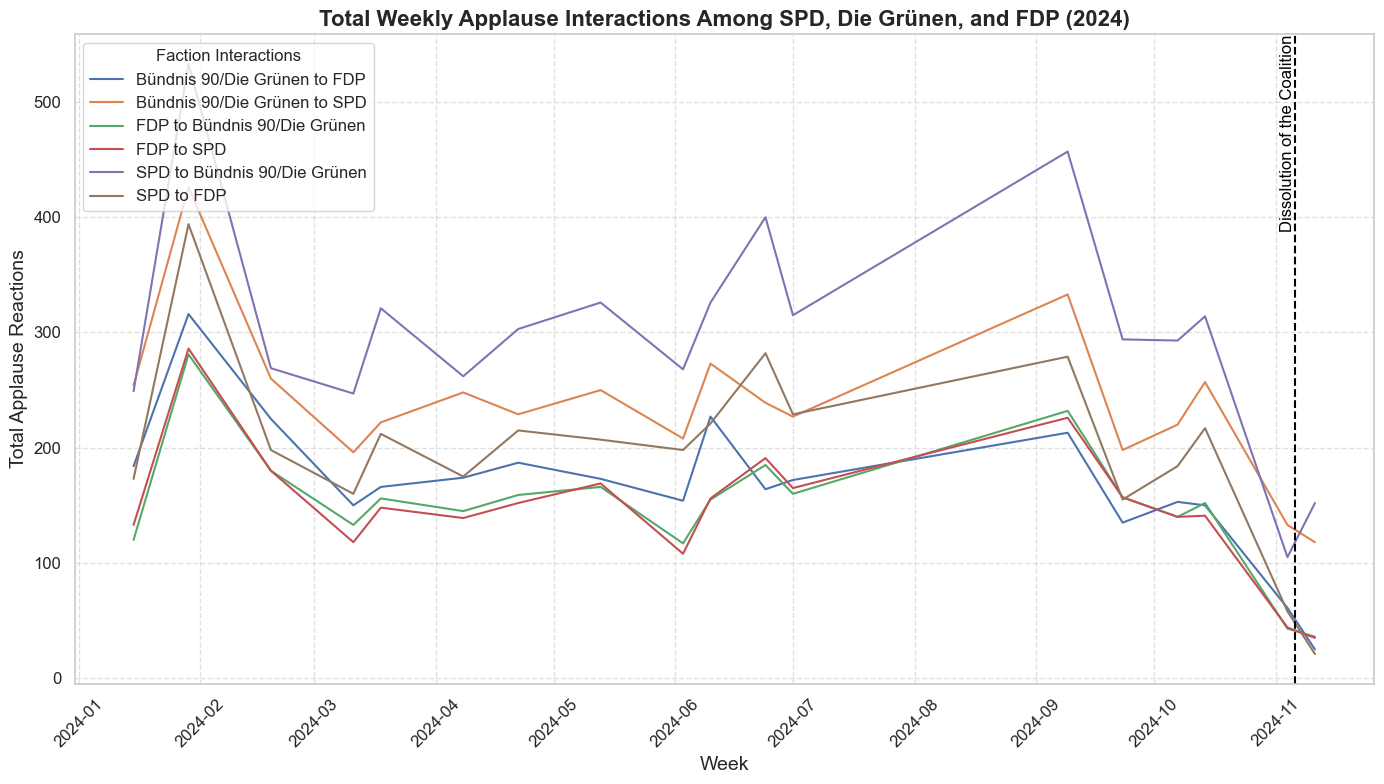

In [ ]:
# Filter data for term 20, reaction type "Applause", and year 2024
applause_data = term_20_data[
    (term_20_data['reaction_type'] == 'Applause') &
    (term_20_data['date'].dt.year == 2024)
]

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
applause_data_filtered = applause_data[
    (applause_data['faction'].isin(factions_of_interest)) &
    (applause_data['reacting_faction'].isin(factions_of_interest))
]

# Add a 'week' column for aggregation
applause_data_filtered['week'] = applause_data_filtered['date'].dt.to_period('W-SUN').dt.to_timestamp()

# Group data by week, faction, and reacting faction
applause_counts = applause_data_filtered.groupby(
    ['week', 'faction', 'reacting_faction']
).size().reset_index(name='total_applause')

# Pivot data for plotting
pivoted_data = applause_counts.pivot_table(
    index='week',
    columns=['faction', 'reacting_faction'],
    values='total_applause',
    fill_value=0
)

# Prepare data for line plots (flatten the multi-index columns)
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'week'
    sns.lineplot(data=pivoted_data, x='week', y=column, label=column)

# Draw a vertical line on November 6th
dissolution_date = pd.to_datetime("2024-11-06")
plt.axvline(x=dissolution_date, color='black', linestyle='--')


# Add text label at the top of the vertical line
plt.text(dissolution_date, plt.gca().get_ylim()[1], 'Dissolution of the Coalition', color='black', horizontalalignment='right', verticalalignment='top', rotation=90)

# Customize the chart
plt.title('Total Weekly Applause Interactions Among SPD, Die Grünen, and FDP (2024)', fontsize=16, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total Applause Reactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Interactions', fontsize=12, loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()

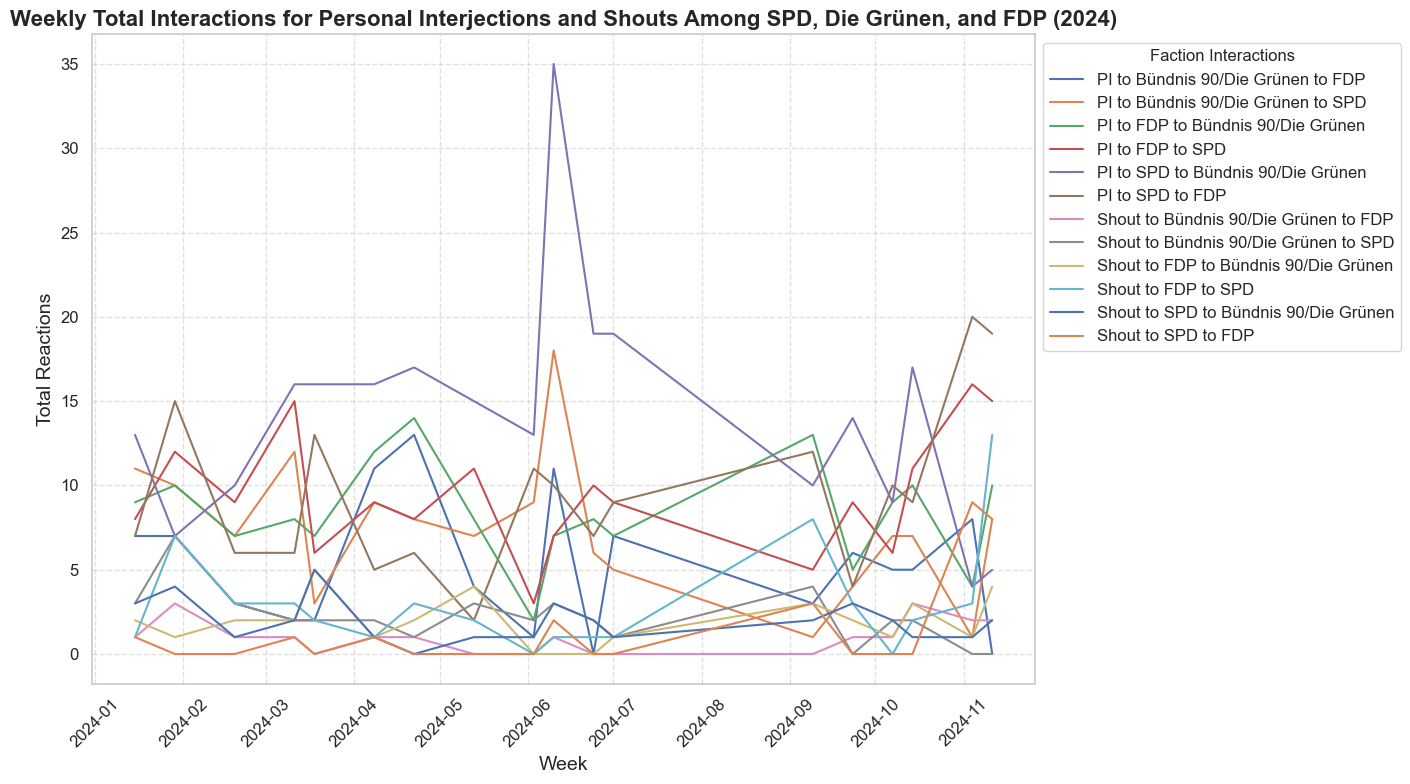

In [ ]:
# Filter data for term 20, for the reaction types "Personal Interjection" and "Shout", and year 2024
personal_interjection_and_shout_data = term_20_data[
    (term_20_data['reaction_type'].isin(['Personal Interjection', 'Shout'])) &
    (term_20_data['date'].dt.year == 2024)
]

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
filtered_data = personal_interjection_and_shout_data[
    (personal_interjection_and_shout_data['faction'].isin(factions_of_interest)) &
    (personal_interjection_and_shout_data['reacting_faction'].isin(factions_of_interest))
]

# Add a 'week' column for aggregation
filtered_data['week'] = filtered_data['date'].dt.to_period('W-SUN').dt.to_timestamp()

# Group data by week, faction, and reacting faction
reaction_counts = filtered_data.groupby(
    ['week', 'reaction_type', 'faction', 'reacting_faction']
).size().reset_index(name='total_reactions')

# Pivot data for plotting
pivoted_data = reaction_counts.pivot_table(
    index='week',
    columns=['reaction_type', 'faction', 'reacting_faction'],
    values='total_reactions',
    fill_value=0
)

# Prepare data for line plots (flatten the multi-index columns)
pivoted_data.columns = [' to '.join(col).replace('Personal Interjection', 'PI').replace('Shout', 'Shout') for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'week'
    sns.lineplot(data=pivoted_data, x='week', y=column, label=column)

# Customize the chart
plt.title('Weekly Total Interactions for Personal Interjections and Shouts Among SPD, Die Grünen, and FDP (2024)', fontsize=16, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total Reactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Interactions', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()


#### 7.4.2 Reaction Types received per party

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing reaction type: nan


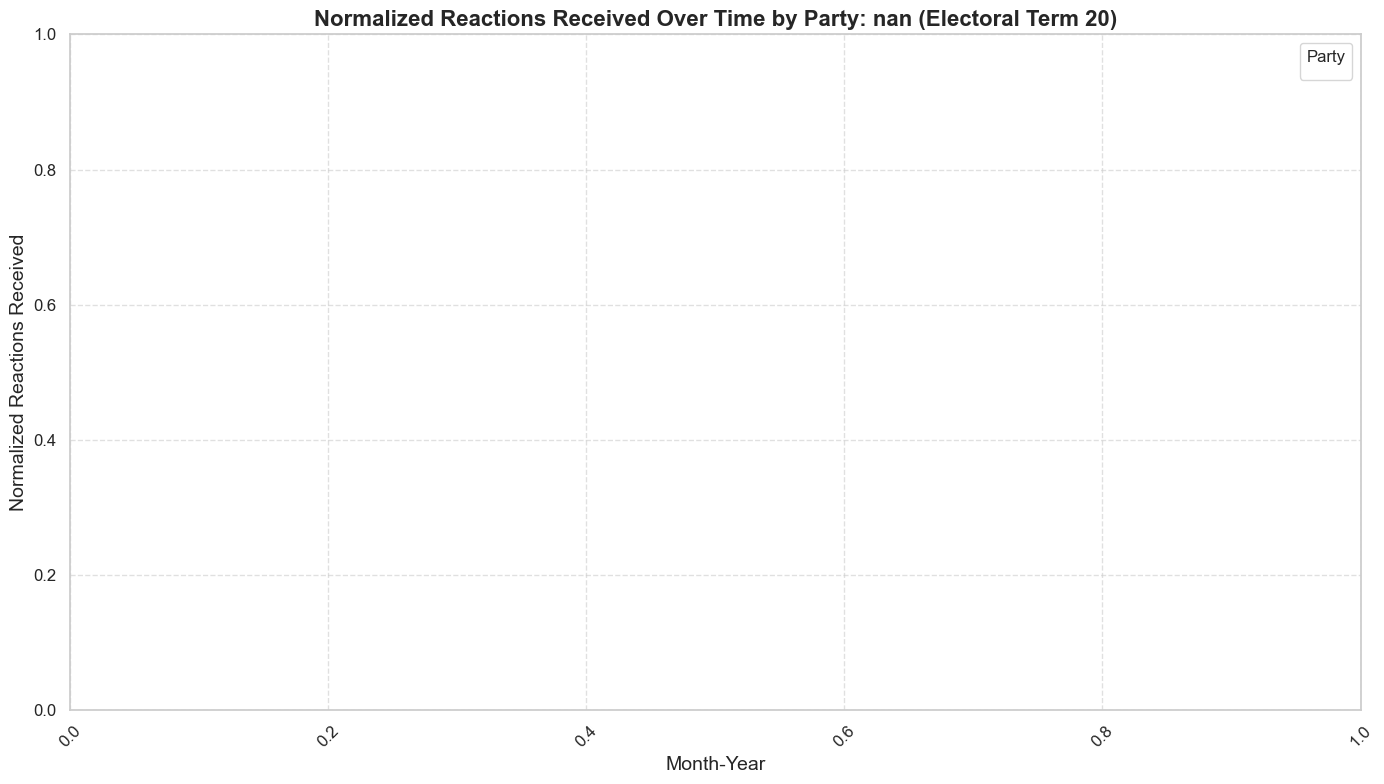

Processing reaction type: Applause


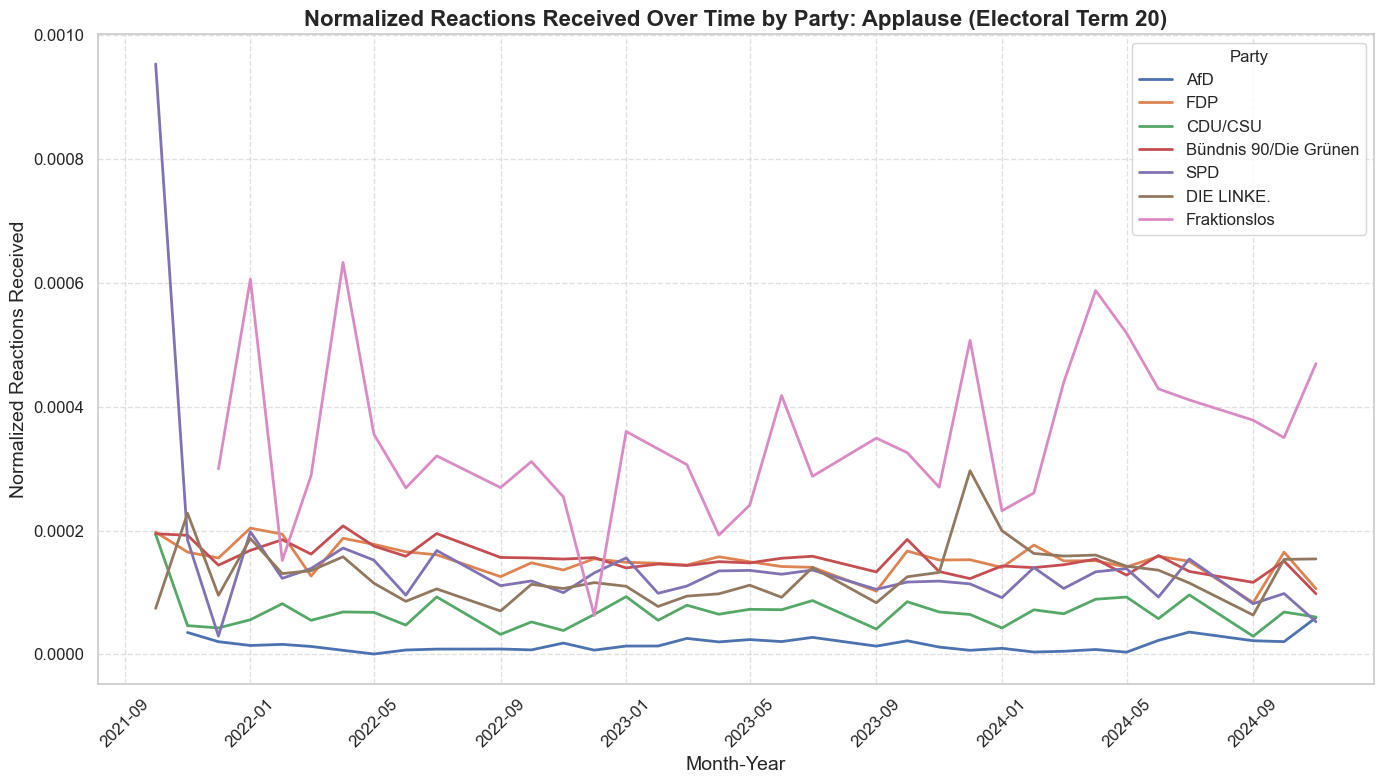

Processing reaction type: Personal Interjection


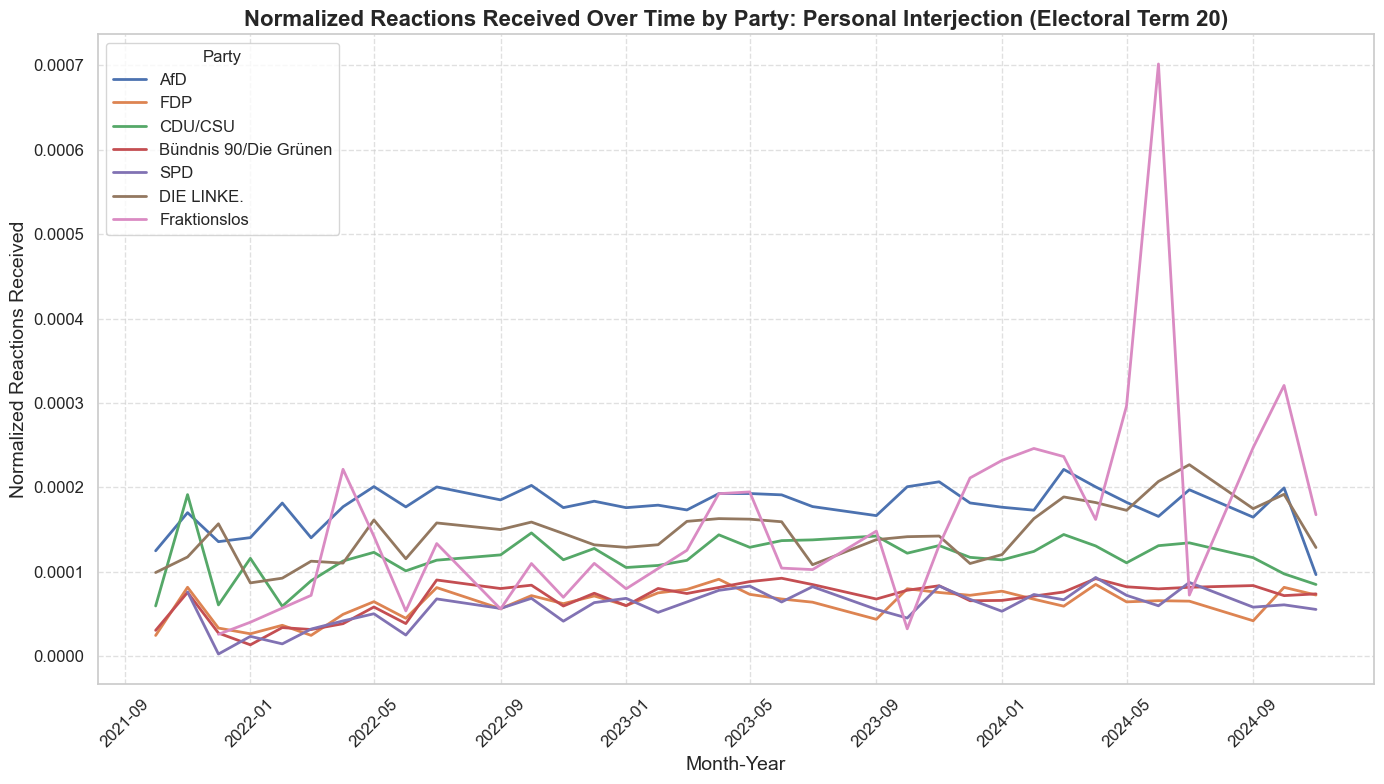

Processing reaction type: Shout


Processing reaction type: Laughter


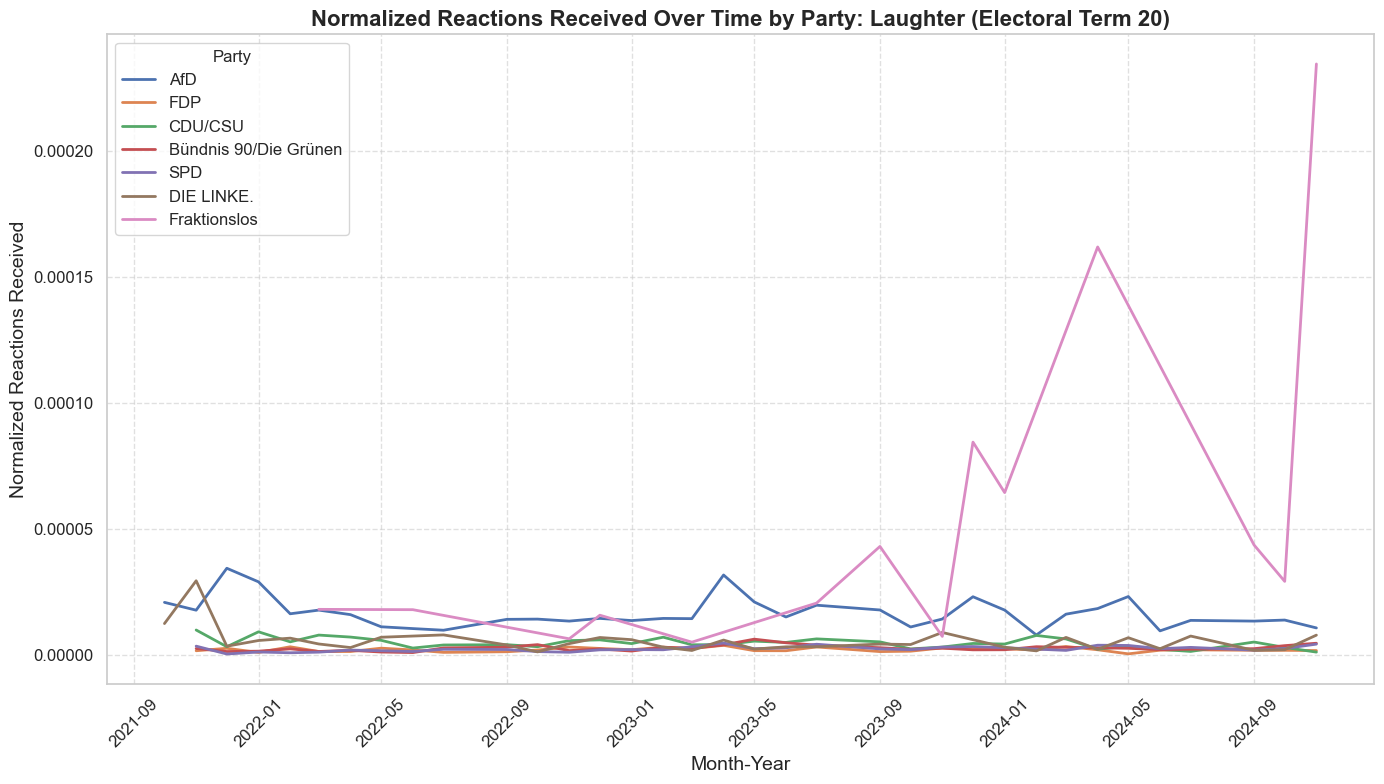

Processing reaction type: Contradiction


Processing reaction type: Cheerfulness


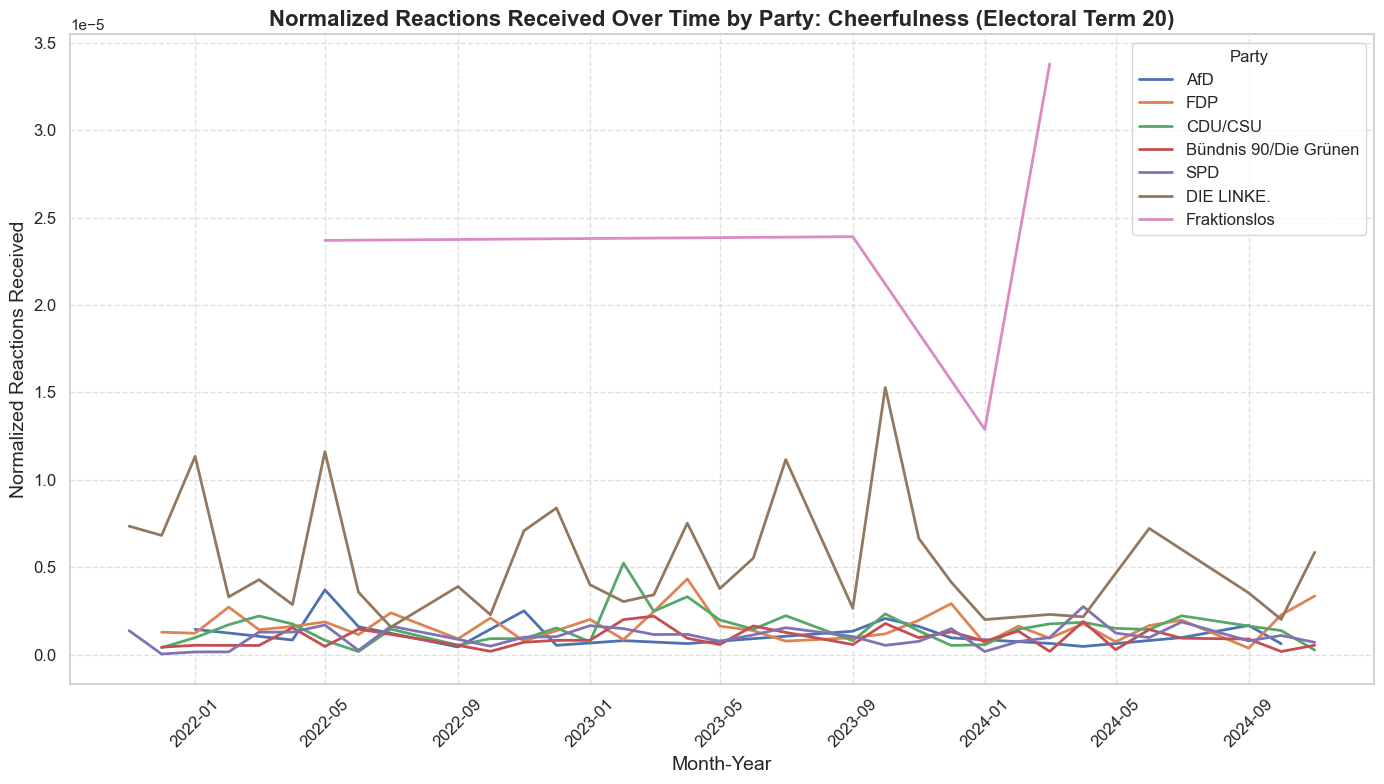

In [ ]:

# Apply seaborn style
sns.set_theme(style="whitegrid")

# Define the faction order for sorting
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Filter for electoral term 20
term_20_data = content_subset_with_classification_contribution_extended[
    content_subset_with_classification_contribution_extended['electoral_term'] == 20
]

# Exclude reactions within the same faction
term_20_data = term_20_data[term_20_data['reacting_faction'] != term_20_data['faction']]

# Group speech length data by month_year and faction for normalization
speech_length_by_month = term_20_data.groupby(['month_year', 'faction'])['speech_length'].sum().reset_index()

# Get unique reaction types
reaction_types = term_20_data['reaction_type'].unique()

# Loop through each reaction type to create normalized charts
for reaction in reaction_types:
    print(f"Processing reaction type: {reaction}")
    
    # Filter data for the specific reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction]
    
    # Group data by Month-Year and Faction to calculate reactions received
    reactions_over_time = reaction_data.groupby(['month_year', 'faction']).size().reset_index(name='Reactions Received')
    
    # Merge with speech length for normalization
    reactions_over_time = reactions_over_time.merge(
        speech_length_by_month, 
        on=['month_year', 'faction'], 
        how='left'
    )
    
    # Normalize reactions received by speech length
    reactions_over_time['Reactions Normalized'] = (
        reactions_over_time['Reactions Received'] / reactions_over_time['speech_length']
    ).fillna(0)  # Handle missing data by filling with 0
    
    reactions_over_time['month_year']=reactions_over_time['month_year'].dt.to_timestamp()
    # Pivot the data for plotting
    reactions_over_time_pivot = reactions_over_time.pivot(index='month_year', columns='faction', values='Reactions Normalized')
    reactions_over_time_pivot = reactions_over_time_pivot.reindex(columns=faction_order, fill_value=0)  # Enforce faction order
    reactions_over_time_pivot.index = pd.to_datetime(reactions_over_time_pivot.index)  # Ensure datetime format for plotting
    
    # Plot the development of normalized reactions received over time for this reaction type
    plt.figure(figsize=(14, 8))

    # Plot each party's normalized reactions received as a line
    for faction in faction_order:
        if faction in reactions_over_time_pivot.columns:
            sns.lineplot(
                x=reactions_over_time_pivot.index,
                y=reactions_over_time_pivot[faction],
                label=faction,
                linewidth=2
            )
    
    # Customize the plot
    plt.title(f'Normalized Reactions Received Over Time by Faction: {reaction} (Electoral Term 20)', fontsize=16, weight='bold')
    plt.xlabel('Month-Year', fontsize=14)
    plt.ylabel('Normalized Reactions Received', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Faction', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(f'normalized_reactions_received_over_time_{reaction}.png', format='png', dpi=300)

    # Show the chart
    plt.show()
